In [1]:
%cd /Users/floriankokoszka/Desktop/notebooks
%pwd

%run mc_startup.ipynb
%run myfunctions.ipynb
%run myfunctions_plus.ipynb


/Users/floriankokoszka/Desktop/notebooks


In [2]:
%run myfunctions_iw.ipynb
%run myfunctions_turner_dd.ipynb

4.100526496717507e-05 1.3282365197026632e-05 -2.6321777331756852e-05
7.100526496717507e-05 4.68845208688368e-05 1.242631501406782e-05
6.165877303407161e-05 2.538890654344125e-05 -2.6425188443173553e-05
coucou


In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

/Users/floriankokoszka/Desktop/notebooks
/Users/floriankokoszka/Desktop/notebooks
/Users/floriankokoszka/Desktop/notebooks
/Users/floriankokoszka/Desktop/notebooks
z.shape  (2760, 3600)
lon.shape  (3600,)
lat.shape  (2760,)
zz.shape  (1440, 1680)
lon.shape  (1680,)
lat.shape  (1440,)
(1440, 1680) (1440, 1680) (1440, 1680)
(1680,) (1440,)
reduced 10 for plots
(144, 168) (144, 168) (144, 168)
G E  B   C    O


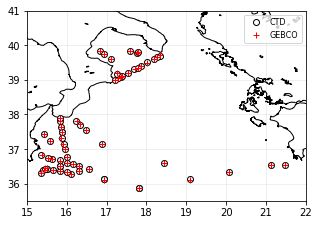

12 points | delta: 5.37 km
         | 2 x :  10.74 km
12
23 points | delta: 10.293 km
         | 2 x :  20.586 km
23


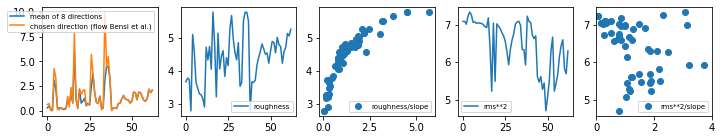

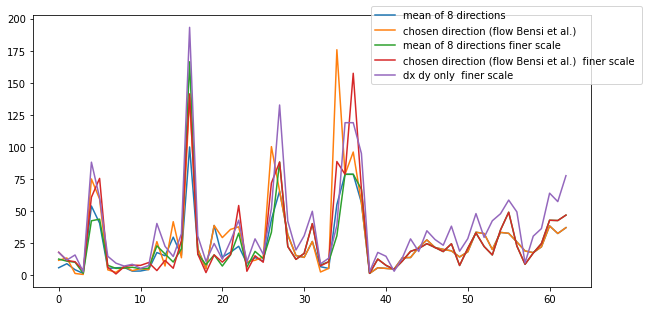

local slope and roughness 
 (takes time ...)
done: LOCAL_SLAPE, LOCAL_ROUGH (1440, 1680)


In [4]:
%run bathy_slope_roughness.ipynb

In [5]:
%run data_KM3_Pi23.ipynb

/Users/floriankokoszka/Desktop/notebooks


In [6]:
# 
#%whos
print('done')

done


### du/dz + Richardson

In [8]:
idz = 5
dz  = 2*idz

DUDZ = U*np.nan
DVDZ = U*np.nan

for i in range(0,U.shape[1]):
    toto = U[:,i]
    tata = V[:,i]
    
    for l in range(idz+1,len(toto)-idz):
        dtoto = toto[l+idz]-toto[l-idz]
        dtata = tata[l+idz]-tata[l-idz]
        DUDZ[l,i] = (dtoto)/(dz)
        DVDZ[l,i] = (dtata)/(dz)  

In [9]:
shUV = (DUDZ**2 + DVDZ**2)
shUV1 = np.sqrt(DUDZ**2 + DVDZ**2)

RI = N2 / shUV

### vertical bins of horizontal data

In [12]:
def bottom_influence(z, x, decay_factor):
    influence = x * np.exp(-decay_factor * z)
    return influence

def bottom_influence_2(z, x, decay_factor,target):
    influence = x * np.exp(-decay_factor * z) + target * np.exp(1-decay_factor * z)
    return influence

def constrained_exponential_transition(start_value, depth_profile, target_value, transition_length):
    depth_profile = np.asarray(depth_profile)   
    # Exponential decay factor
    decay_factor = np.exp(-depth_profile / transition_length)  
    # Transition between start and target
    profile = target_value + (start_value - target_value) * decay_factor
    return profile

In [13]:
DTTB = D * np.nan
BTTD = D * np.nan

SLOP = D * np.nan
SLOM = D * np.nan
SLAP = D * np.nan
SLAM = D * np.nan

ROGH = D * np.nan
RO10 = D * np.nan

RMSP = D * np.nan
RM10 = D * np.nan
    
INFR = D * np.nan
INFS = D * np.nan
INFP = D * np.nan

LATX = D * np.nan
LONX = D * np.nan
FCOR = D * np.nan
TCOR = D * np.nan

IIII = D * np.nan
    
for i in range(0,D.shape[1]):
    SLOP[:,i] = SLOPF_gebco[i]
    SLOM[:,i] = SLOPM_gebco[i]
    SLAP[:,i] = SLAPF_gebco[i]
    SLAM[:,i] = SLAPM_gebco[i]
    
    BTTD[:,i] = BTTD_gebco[i]
    DTTB[:,i] = - (D[:,i] + BTTD_gebco[i])
    
    ROGH[:,i] = ROGH_gebco[i]
    RO10[:,i] = ROGH10_gebco[i]
    
    RMSP[:,i] = RMS2_gebco[i]
    RM10[:,i] = RMS210_gebco[i]
    
    LATX[:,i] = lat_ctd[i]
    LONX[:,i] = lon_ctd[i]
    FCOR[:,i] = gsw.geostrophy.f(lat_ctd[i])
    TCOR[:,i] = (2*np.pi / gsw.geostrophy.f(lat_ctd[i]))/3600
    
    #INFR[:,i] = bottom_influence(DTTB[:,i], ROGH10_gebco[i], 0.0016)
    #INFS[:,i] = bottom_influence_2(DTTB[:,i], SLAPM_gebco[i], 0.0016,90)

    
   
    INFR[:,i] = constrained_exponential_transition(ROGH10_gebco[i], DTTB[:,i], 0, 640*2 )
    INFS[:,i] = constrained_exponential_transition(SLAPM_gebco[i], DTTB[:,i], 20, 640*2)
    smin = np.nanmin(INFS[:,i])
    INFS[:,i] = INFS[:,i] - (smin-SLAPM_gebco[i])
    rmax = np.nanmax(INFR[:,i])
    INFR[:,i] = INFR[:,i] + (ROGH10_gebco[i] - rmax )
    
    IIII[:,i] = i

In [14]:
3*np.nanmax(SLAPM_gebco)

17.11009607207818

4.7169538 4.716953561576331


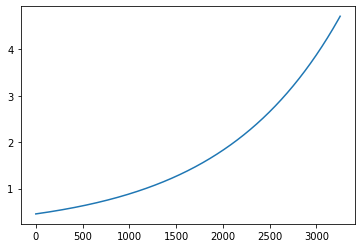

In [15]:
i = 12
plt.plot(INFR[:,i])
print(np.nanmax(INFR[:,i]),ROGH10_gebco[i])

5.056984508922113e-08


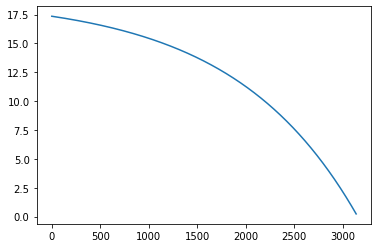

In [15]:
i = 2
plt.plot(INFS[:,i])
print(np.nanmin(INFS[:,i])-SLAPM_gebco[i])

### Turner

In [16]:
TU  = P*np.nan
TUX = P*np.nan
TU1 = P*np.nan
TU2 = P*np.nan
TU3 = P*np.nan
TU4 = P*np.nan
RR  = P*np.nan

TTUX = P*np.nan
TTU1 = P*np.nan
TTU3 = P*np.nan

# Zhang
KP_DC_m = P*np.nan
KS_DC_m = P*np.nan
KT_DC_m = P*np.nan

KP_SF_m = P*np.nan
KS_SF_m = P*np.nan
KT_SF_m = P*np.nan

# Large
KP2_DC_m = P*np.nan
KS2_DC_m = P*np.nan
KT2_DC_m = P*np.nan

KP2_SF_m = P*np.nan
KS2_SF_m = P*np.nan
KT2_SF_m = P*np.nan


res = 1
Nhi = 10
Nlo = 20
Nlo2 = 100
filo = 2
N_STD = 1

thresh_gradT = 3e-4

Nny = 2*res
fny = 1/(Nny)
locu = 1/Nlo
locu2 = 1/Nlo2
hicu = 1/Nhi

for i in range(0,P.shape[1]):
    i
#i = 58
#for l in range(0,1):
    
    lfin = np.where(np.isfinite(SA[:,i])==True)[0]
    if len(lfin) > 10:

        xi, as_lo, ct_lo, sig0_lo, Tu, Rsubrho, Tu_lo,  Rsubrho_lo = calculate_Tu_Rsubrho(
            SA[:,i],CT[:,i],SIG0[:,i],P[:,i],
             locu,locu2,hicu,filo)


        f1 = np.where( (Tu> 45) & (Tu< 90) )[0] # SF
        f3 = np.where( (Tu>-90) & (Tu<-45) )[0] # DIFFUSIVE CONVECTION

        f2 = np.where( (Tu>-45) & (Tu< 45) )[0] # STABLE
        f41 = np.where((Tu<=-90) )[0] # UNSTABLE
        f42 = np.where((Tu>= 90) )[0] # UNSTABLE

        Tu1 = Tu*np.nan   
        Tu1[f1] = 1
        TU1[f1,i] = 1
        TUX[f1,i] = 1


        Tu3 = Tu*np.nan
        Tu3[f3] = 1
        TU3[f3,i] = 1 
        TUX[f3,i] = 3



        Tu2 = Tu*np.nan
        Tu2[f2] = 1
        TU2[f2,i] = 1 
        TUX[f2,i] = 2

        Tu4 = Tu*np.nan
        Tu4[f41] = 1
        Tu4[f42] = 1
        TU4[f41,i] = 1 
        TUX[f42,i] = 4 
        TU4[f41,i] = 1 
        TUX[f42,i] = 4


        p1 = find_patches(Tu1)
        p3 = find_patches(Tu3)
        PATCH1, f1, Kp_sf, Ks_sf, Kt_sf, Kp2_sf, Ks2_sf, Kt2_sf  = sf_mixing(p1,Tu,Rsubrho,ct_lo,5,thresh_gradT)
        PATCH3, f3, Kp_dc, Ks_dc, Kt_dc, Kp2_dc, Ks2_dc, Kt2_dc  = dc_mixing(p3,Tu,Rsubrho,ct_lo,5,thresh_gradT)

        Tu1 = Tu*np.nan
        if len(f1)>0:
            Tu1[f1] = 1
            TTU1[f1,i] = 1
            TTUX[f1,i] = 1
            RR[f1,i] =     Rsubrho[f1]


        Tu3 = Tu*np.nan
        if len(f3)>0:
            Tu3[f3] = 1
            TTU3[f3,i] = 1 
            TTUX[f3,i] = 3
            RR[f3,i] =     Rsubrho[f3]




        zi = -gsw.conversions.z_from_p(xi,lat_ctd[i])
        zi_m = np.arange(0,np.floor(np.nanmax(zi))).astype(int)
        zi_m = zi.astype(int)

        fi = np.where(np.isfinite(Kp_sf)== True)[0]
        if len(fi)>0:

            #Ksf_m = interpholes(zi,Ksf,zi_m)
            KP_SF_m[zi_m,i] = Kp_sf

        fi = np.where(np.isfinite(Kp_dc)== True)[0]
        if len(fi)>0:  
            #Kdc_m = interpholes(zi,Kdc,zi_m)
            KP_DC_m[zi_m,i] = Kp_dc


        fi = np.where(np.isfinite(Ks_sf)== True)[0]
        if len(fi)>0:

            #Ksf_m = interpholes(zi,Ksf,zi_m)
            KS_SF_m[zi_m,i] = Ks_sf

        fi = np.where(np.isfinite(Kt_sf)== True)[0]
        if len(fi)>0:
            #Ksf_m = interpholes(zi,Ksf,zi_m)
            KT_SF_m[zi_m,i] = Kt_sf

        fi = np.where(np.isfinite(Ks_dc)== True)[0]
        if len(fi)>0:
            #Ksf_m = interpholes(zi,Ksf,zi_m)
            KS_DC_m[zi_m,i] = Ks_dc

        fi = np.where(np.isfinite(Kt_dc)== True)[0]
        if len(fi)>0:
            #Ksf_m = interpholes(zi,Ksf,zi_m)
            KT_DC_m[zi_m,i] = Kt_dc




        fi = np.where(np.isfinite(Kp2_sf)== True)[0]
        if len(fi)>0:
            #print(i,np.nanmean(Kp2_sf))
            #Ksf_m = interpholes(zi,Ksf,zi_m)
            KP2_SF_m[zi_m,i] = Kp2_sf

        fi = np.where(np.isfinite(Kp2_dc)== True)[0]
        if len(fi)>0:  
            #Kdc_m = interpholes(zi,Kdc,zi_m)
            KP2_DC_m[zi_m,i] = Kp2_dc


        fi = np.where(np.isfinite(Ks2_sf)== True)[0]
        if len(fi)>0:
            #Ksf_m = interpholes(zi,Ksf,zi_m)
            KS2_SF_m[zi_m,i] = Ks2_sf

        fi = np.where(np.isfinite(Kt2_sf)== True)[0]
        if len(fi)>0:
            #Ksf_m = interpholes(zi,Ksf,zi_m)
            KT2_SF_m[zi_m,i] = Kt2_sf

        fi = np.where(np.isfinite(Ks2_dc)== True)[0]
        if len(fi)>0:
            #Ksf_m = interpholes(zi,Ksf,zi_m)
            KS2_DC_m[zi_m,i] = Ks2_dc

        fi = np.where(np.isfinite(Kt2_dc)== True)[0]
        if len(fi)>0:
            #Ksf_m = interpholes(zi,Ksf,zi_m)
            KT2_DC_m[zi_m,i] = Kt2_dc


print('ok')

ok


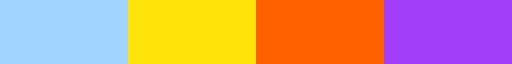

In [18]:
import matplotlib.colors as mcolors
from matplotlib import colors

cmap=plt.cm.get_cmap('tab10_r', 4)
cmap=plt.cm.get_cmap('Paired_r', 4)
cmap=plt.cm.get_cmap('Set1_r', 4)
#cmap=plt.cm.get_cmap('Paired_r', 4)
#cmap=plt.cm.get_cmap('Dark2_r', 4)
cmap

colors_list = [(161, 213, 255),
               #(116, 237, 148),  # GREENS
               (8, 194, 58),

              (255, 255, 105),
              (255, 239, 15),  # YELLOWS
              (255, 208, 0),

              (255, 162, 0),
              (255, 119, 0), # ORANGES
              (255, 85, 0),

              (250, 27, 135),
              (235, 54, 255),  # REDS
               (162, 62, 250),
               ]
turner_cmap = colors.LinearSegmentedColormap.from_list('my_colormap', (np.array(colors_list)/255), N=4)

turner_cmap

### oceanic sections

In [19]:
def order_stations(liste,liste_ref):
    I = []
    for i in range(0,len(liste)):
        f = np.where(liste_ref == liste[i])[0]
        if len(f)>0:
            I.append(f[0])
    I = np.array(I)
    return I

In [20]:
sta

array(['11', '12', '13', '3', 'GR1', 'GR2', 'KM3', 'KM4', 'NK1', 'NK10',
       'NK11', 'NK12', 'NK13', 'NK14', 'NK15', 'NK17', 'NK18', 'NK19',
       'NK2', 'NK20', 'NK21', 'NK22', 'NK23', 'NK24', 'NK25', 'NK26',
       'NK27', 'NK28', 'NK30', 'NK31', 'NK32', 'NK34', 'NK4', 'NK5',
       'NK6', 'NK8', 'NK8b', 'NK9', 'PI23_CTD02_st3deep',
       'PI23_CTD05_st11deep', 'PI23_CTD09_stKM3deep', 'PI23_CTD11_st34',
       'PI23_CTD12_st26', 'PI23_CTD14_stNK25', 'PI23_CTD15_st50',
       'PI23_CTD16_stctd03', 'PI23_CTD17', 'PI23_CTD18',
       'PI23_CTD19_st44', 'PI23_CTD22_stctd16', 'PI23_CTD23_stctd15',
       'PI23_CTD24_stctd14', 'PI23_CTD25_stctd12', 'PI23_CTD26_stctd10',
       'PI23_CTD27_stctd02', 'PI23_CTD29_stGCbiogeo',
       'PI23_CTD30_stctd04', 'PI23_CTD31_stctd06', 'PI23_CTD32_stctd08',
       'PI23_CTD33_stctd09', 'PI23_CTD34_st48', 'PI23_CTD35',
       'PI23_CTD36'], dtype=object)

In [21]:
L0 = sta*1

L1 = ['NK30','NK31','NK32','NK34']
L2 = ['NK28','NK27','NK26','NK25','NK24','NK23','NK22','NK21'][::-1]
L3 = ['NK18','NK15','NK14','NK13','NK12','NK11','NK10'][::-1]
L4 = ['NK20','NK19','NK9','NK8b','NK8','NK6','NK5','NK4'][::-1]
L5 = ['3','11','12','13','KM3', 'KM4','NK1','NK2','NK17','GR1','GR2']
L50 = ['3','11','12','13','KM3', 'KM4','NK1','NK2','NK17']

L6 = ['PI23_CTD09_stKM3deep','PI23_CTD05_st11deep','PI23_CTD02_st3deep']
L7 = ['PI23_CTD12_st26','PI23_CTD11_st34','PI23_CTD14_stNK25']
L8 = ['PI23_CTD27_stctd02','PI23_CTD16_stctd03','PI23_CTD30_stctd04'
     ,'PI23_CTD31_stctd06','PI23_CTD32_stctd08','PI23_CTD33_stctd09',
      'PI23_CTD26_stctd10','PI23_CTD25_stctd12','PI23_CTD24_stctd14',
      'PI23_CTD23_stctd15','PI23_CTD22_stctd16']
L9  =[   'PI23_CTD18', 'PI23_CTD19_st44', 'PI23_CTD17', 'PI23_CTD29_stGCbiogeo', 'PI23_CTD15_st50']
L10 =[ 'PI23_CTD36','PI23_CTD35','PI23_CTD34_st48']

mrk1 = ['^']*len(L1)
mrk2 = ['s']*len(L2)
mrk3 = ['D']*len(L3)
mrk4 = ['o']*len(L4)
mrk5 = ['X']*len(L5)
mrk50 = ['X']*len(L50)

mrk6 = ['p']*len(L6)
mrk7 = ['P']*len(L7)
mrk8 = ['*']*len(L8)
mrk9 = ['v']*len(L9)
mrk10 = ['x']*len(L10)


In [22]:
I0 = order_stations(L0,sta)
I1 = order_stations(L1,sta)
I2 = order_stations(L2,sta)
I3 = order_stations(L3,sta)
I4 = order_stations(L4,sta)
I5 = order_stations(L5,sta)
I50 = order_stations(L50,sta)

I6 = order_stations(L6,sta)
#I60 = order_stations(L60,sta)

I7 = order_stations(L7,sta)
I8 = order_stations(L8,sta)
I9 = order_stations(L9,sta)
I10 = order_stations(L10,sta)


#KM3 = np.arange(0,37+1,1)
#P23 = np.arange(38,62+1,1)


# KM3 without GR1 GR2
GRR = np.array([ 0,  1,  2,  3,   6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37]) 

# KM3 + PI23 without GR1,GR2 (4,5)  3_pi23,11_pi23,KM3_pi23  (38,39,40)
KMP = [ 0,  1,  2,  3,   6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]

Z15 = np.where(BTTD_gebco >-1500)[0]
Z20 = np.where(BTTD_gebco >-2000)[0]
Z25 = np.where(BTTD_gebco >-2500)[0]


In [23]:
listKM3 = list(L1)+list(L2)+list(L3)+list(L50)+list(L4) #without gr1 gr2
mrkrKM3 = np.array(list(mrk1)+list(mrk2)+list(mrk3)+list(mrk50)+list(mrk4))

listP23 = list(L7)+list(L8)+list(L9)+list(L10)
mrkrP23 = np.array(list(mrk7)+list(mrk8)+list(mrk9)+list(mrk10))

listKMP = list(L1)+list(L2)+list(L3)+list(L4)+list(L50) +list(L7)+list(L8)+list(L9)+list(L10)
mrkrKMP = np.array(list(mrk1)+list(mrk2)+list(mrk3)+list(mrk4)+list(mrk50)+list(mrk7)+list(mrk8)+list(mrk9)+list(mrk10))


KM3 = order_stations(listKM3,sta)
P23 = order_stations(listP23,sta)
KMP = order_stations(listKMP,sta)



In [24]:
len(sta[KM3])

36

In [25]:
dlon = 0.1
dlat = 0.0
HDIS_gebco = lon_ctd * np.nan
for s in range(1,10+1):
    print('I'+str(s))
    exec('I = I'+str(s))
    xref = lon_ctd[I][0]-dlon
    yref = lat_ctd[I][0]+dlat
    loc_ref = (xref,yref)
    for i in range(0,len(I)):
        
        loc_x = (lon_ctd[I[i]],lat_ctd[I[i]])
        HDIS_gebco[I[i]] = hs.haversine(loc_ref,loc_x)

I1
I2
I3
I4
I5
I6
I7
I8
I9
I10


In [26]:
clrR = []
for r in range(5):
    clrR.append(np.random.randint(0, 256, size=3)/255)
clrR = np.array(clrR)

(5, 4)


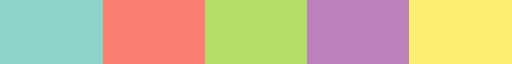

In [27]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
from matplotlib.colors import ListedColormap

N = 5
cmap = cm.get_cmap('jet', N)
cmap = cm.get_cmap('Set3', N)

clr_list = cmap(np.arange(N))
clrR = clr_list
#colors[0] = [0.0, 0.0, 0.0, 1.0]  
cmap = ListedColormap(clr_list)
print(clr_list.shape)
cmap


fig_SECTIONS


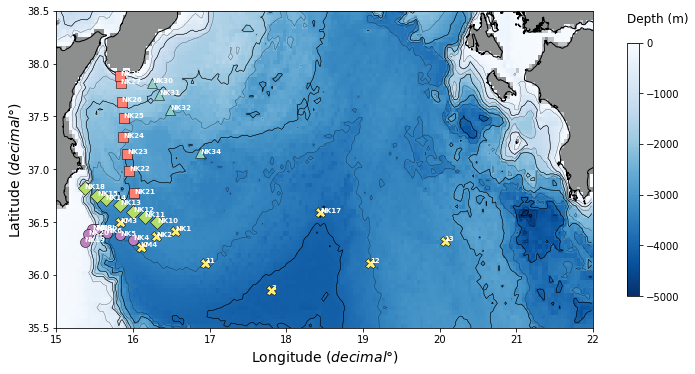

In [28]:
deltalon = 0
deltalat = 0
ms = 10

import matplotlib.colors as mcolors
from matplotlib import colors

colors1 = plt.cm.Blues_r(np.linspace(0., 1, 128))
colors2 = plt.cm.terrain(np.linspace(0, 1, 128))
colors2 = colors2[31:108,:]

colors2 = np.array([141, 143, 142, 255])/255
colors3 = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors3)
cmap = mymap



fig, axs = plt.subplots(1, 1,figsize=(10,5))
ax = axs
c = ax.pcolor(XXG_R,YYG_R,ZZG_R, cmap=cmap, vmin=-5000, vmax=0, shading='auto',label='')
cbar = fig.colorbar(c, ax=ax,shrink=0.8)
cbar.ax.set_title('Depth (m)',loc='left',pad=20)

cs1 = ax.contour(XXG_R,YYG_R,ZZG_R,levels= np.arange(-5000,0,500),colors='k', linewidths=0.25, linestyles='solid' )
cs2 = ax.contour(XXG_R,YYG_R,ZZG_R,levels= np.arange(-5000,0,1000),colors='k', linewidths=0.5, linestyles='solid' )
#ax.clabel(cs1, levels=[-500, -1500, -2500,-3500], fmt='%d m',fontsize=6,colors='r')
ax.plot(ITcoast['lonIT'],ITcoast['latIT'],'k-',lw=1)
ax.set_xlabel('Longitude $(decimal \degree)$', fontsize=14)
ax.set_ylabel('Latitude $(decimal \degree)$', fontsize=14)
ax.set_xlim([15,22])
ax.set_ylim([35,39])

ax.set_xlim([15,22])
ax.set_ylim([35.5,38.5])


ax.plot(lon_ctd[I1],lat_ctd[I1],'-',lw=0,marker=mrk1[0],color=clrR[0],label='1 km3',markersize=ms,markeredgecolor='k',markeredgewidth=.5)
ax.plot(lon_ctd[I2],lat_ctd[I2],'-',lw=0,marker=mrk2[0],color=clrR[1],label='2 km3',markersize=ms,markeredgecolor='k',markeredgewidth=.5)
ax.plot(lon_ctd[I3],lat_ctd[I3],'-',lw=0,marker=mrk3[0],color=clrR[2],label='3 km3',markersize=ms,markeredgecolor='k',markeredgewidth=.5)
ax.plot(lon_ctd[I4],lat_ctd[I4],'-',lw=0,marker=mrk4[0],color=clrR[3],label='4 km3',markersize=ms,markeredgecolor='k',markeredgewidth=.5)
ax.plot(lon_ctd[I50],lat_ctd[I50],'-',lw=0,marker=mrk50[0],color=clrR[4],label='5 km3',markersize=ms,markeredgecolor='k',markeredgewidth=.5)

#ax.plot(lon_ctd[KMP],lat_ctd[KMP],'s',markersize=8,color=np.random.randint(0, 256, size=3)/255,label='KMP')

#ax.legend(fontsize=9,loc=1)

I = GRR
for i in range(0,len(lon_ctd[I])):
    i
    ax.text(lon_ctd[I][i]+deltalon,lat_ctd[I][i]+deltalat,sta[I][i],fontsize=7,color='w',fontweight='bold')

fig_filename = 'fig_SECTIONS'
print(fig_filename)
fig.tight_layout(pad=0)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)
#plt.close(fig)
fig_SECTIONS = fig

### filters

In [29]:
### FOR PAPER
res = 1; Nny = 2*res;  fny = 1/(Nny); 
fny = 1/(Nny)
Nlo = 10
locu = 1/Nlo

Lbs = 160
Nhi = Lbs
hicu = 1/Nhi

#-------
RHO_lo = SIG0 * 1
for i in range(0,len(sta)):
    x = np.abs(SIG0[:,i]); f = np.where(np.isfinite(x)==True)[0]
    x_lo = butter_lowpass_filter(x[f], locu, fny, order=2)
    RHO_lo[f,i] = x_lo

RHO_hi = SIG0 * 1
for i in range(0,len(sta)):
    x = np.abs(SIG0[:,i]); f = np.where(np.isfinite(x)==True)[0]
    x_hi = butter_hipass_filter(x[f], hicu, fny, order=2)
    RHO_hi[f,i] = x_hi
    

#N22 = SA*np.nan
N2_al = N2*np.nan

idz = 1
dz = 2*idz
for i in range(0,SA.shape[1]):
    sigm = RHO_lo[:,i]
    
    #for l in range(idz+1,len(sigm)-idz):
    #    dsigm = sigm[l+idz]-sigm[l-idz]
    #    N22[l,i] = (9.81/1e3)*(dsigm)/(dz)
    
    si = np.argsort(sigm)
    sigm = sigm[si]
    for l in range(idz+1,len(sigm)-idz):
        dsigm = sigm[l+idz]-sigm[l-idz]
        N2_al[l,i] = (9.81/1e3)*(dsigm)/(dz)
        
    #n2, p_mid = gsw.Nsquared(SA[:,i], CT[:,i], P[:,i], lat_ctd[i],axis=0)
    #n2 = interpholes(p_mid,n2,P[:,i])
    # N2[:,i] = n2

#-------
N2_in = N2_al * 1
N2_in = N2  * 1

N2_lo = N2_in * np.nan
for i in range(0,len(sta)):
    x = np.abs(N2_in[:,i]); f = np.where(np.isfinite(x)==True)[0]
    x_lo = butter_lowpass_filter(x[f], locu, fny, order=2)
    N2_lo[f,i] = x_lo
        
N2_hi = N2_in * np.nan
for i in range(0,len(sta)):
    x = np.abs(N2_in[:,i]); f = np.where(np.isfinite(x)==True)[0]
    x_hi = butter_hipass_filter(x[f], hicu, fny, order=2)
    N2_hi[f,i] = x_hi



#-------
U_hi = U * np.nan
V_hi = V * np.nan
for i in range(0,len(sta)):
    x = np.abs(U[:,i]); f = np.where(np.isfinite(x)==True)[0]
    x_hi = butter_hipass_filter(x[f], hicu, fny, order=2)
    U_hi[f,i] = x_hi
    x = np.abs(V[:,i]); f = np.where(np.isfinite(x)==True)[0]
    x_hi = butter_hipass_filter(x[f], hicu, fny, order=2)
    V_hi[f,i] = x_hi  

    


    
N1 = np.sqrt(N2)
N11 = np.sqrt(N22)
N1_al = np.sqrt(N2_al)

### noise or signal in profiles ?

(29.1925, 29.2)

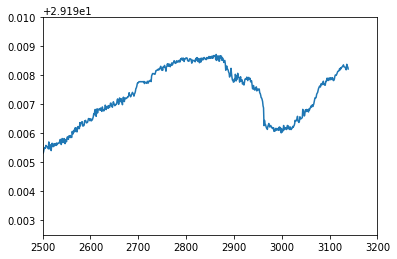

In [127]:
i = 2
x = SIG0[:,i]
f = np.where(np.isfinite(x)==True)[0]
plt.plot(D[:,i],x)
#plt.plot(D[:,i],np.sort(x))
plt.xlim(2500,3200)
plt.ylim(29.1925,29.200)

(2500.0, 3300.0)

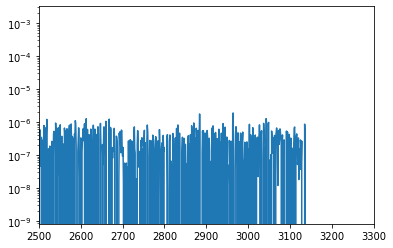

In [126]:
i = 2
x = N2[:,i]
f = np.where(np.isfinite(x)==True)[0]
plt.plot(D[:,i],x)
plt.yscale('log')
#plt.plot(D[:,i],np.sort(x))
plt.xlim(2500,3300)

In [130]:
sta[i]

'GR1'

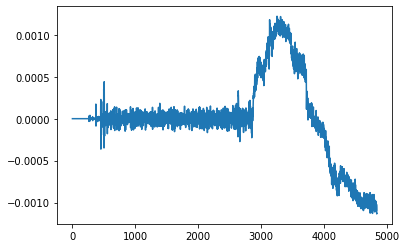

In [151]:
i = 4
x = SIG0[:,i]
f = np.where(np.isfinite(x)==True)[0]
#plt.plot(D[:,i],x)
plt.plot(D[:,i],x-np.sort(x))

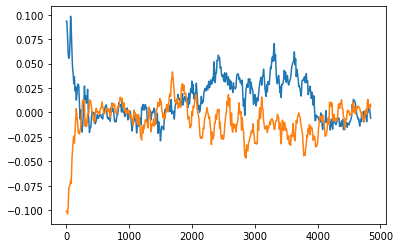

In [152]:
x = U[:,i]
f = np.where(np.isfinite(x)==True)[0]
plt.plot(D[:,i],x)
x = V[:,i]
f = np.where(np.isfinite(x)==True)[0]
plt.plot(D[:,i],x)

(29.195, 29.202)

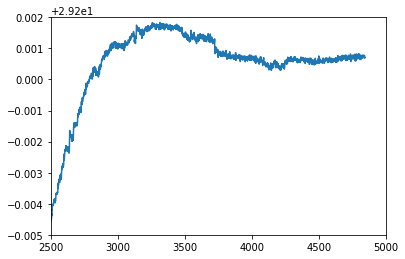

In [136]:
x = SIG0[:,i]
f = np.where(np.isfinite(x)==True)[0]
plt.plot(D[:,i],x)
#plt.plot(D[:,i],np.sort(x))
plt.xlim(2500,5000)
plt.ylim(29.195,29.202)

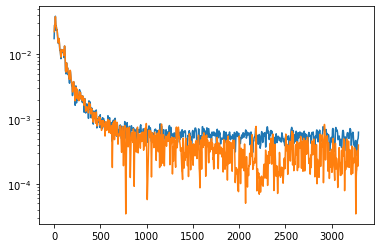

In [105]:
i = 10
x = N1[:,i]
f = np.where(np.isfinite(x)==True)[0]
plt.plot(D[f,i],butter_lowpass_filter(x[f], 1/10, fny, order=2))
plt.yscale('log')
#plt.plot(D[:,i],N11[:,i])
x = N1_al[:,i]
f = np.where(np.isfinite(x)==True)[0]
plt.plot(D[f,i],butter_lowpass_filter(x[f], 1/10, fny, order=2))

### Lz, Kz, bands

In [30]:
NFFT = 640 
#NFFT = 320 

#
dz = 1
LFFT = NFFT * dz
L = LFFT
noverlap = NFFT /2

dk = 2*np.pi / LFFT
KZ = np.arange(2*np.pi/LFFT,2*np.pi/(2*dz)+dk,dk)
LZ = 2*np.pi / KZ
LZround = np.round(LZ).astype(int)

percent_windowing_shear, percent_windowing_strain = .10, .10
percent_windowing_shear, percent_windowing_strain = .25, .25
varloss_shear, varloss_strain = 2 / (2 - percent_windowing_shear), 2 / (2 - percent_windowing_strain)
#varloss_shear, varloss_strain = 1.25, 1.07
varloss_shear,varloss_strain = 1, 1
print(varloss_shear,varloss_strain)

N0 = 5.24e-3
N02 = N0**2
latref =  30
e0 = 7e-10
Elevel = 6.3e-5
bGM = 1300 # m
Jstar = 3

wavelengthes(LZ)
ui = np.unique(LZround)
for u in range(0,len(ui)):
    str_2_exec = 'm'+str(ui[u])+' = np.where(LZround=='+str(ui[u])+')[0][0]'
    #print(str_2_exec)
    exec(str_2_exec)
    
im1_sh = int(0)
im2_sh = int(m128)
#
im1_st = int(m128) # m120 if L = 240
im2_st = int(m10)



im1_sh = int(0)
im2_sh = int(m107)
#
im1_st = int(m128) # m120 if L = 240
im2_st = int(m10)
#
imm_sh = np.arange(im1_sh,im2_sh+1,1)
imm_st = np.arange(im1_st,im2_st+1,1)
print('Bounds integration shear  (m):  start',LZround[im1_sh],'end',LZround[im2_sh])
print('Bounds integration strain (m):  start',LZround[im1_st],'end',LZround[im2_st])

imm_sh_SATU = np.arange(0,m10+1,1)
imm_st_SATU = np.arange(0,m10+1,1)
sat_sh, GMsh = gm_shear_variance(KZ,  imm_sh_SATU, N0)
sat_st, GMst = gm_strain_variance(KZ, imm_st_SATU, N0)
print('Saturations values: mMax-m10',sat_sh,sat_st)

1 1
Wavelengthes available
[640 320 213 160 128 107  91  80  71  64  58  53  49  46  43  40  38  36
  34  32  30  29  28  27  26  25  24  23  22  21  20  19  18  17  16  15
  14  13  12  11  10   9   8   7   6   5   4   3   2]
Bounds integration shear  (m):  start 640 end 107
Bounds integration strain (m):  start 128 end 10
Saturations values: mMax-m10 0.6252901837840541 0.20843006126135136


In [48]:
m10

60

### spectral corrections terms (if applicable)

In [31]:
dz_ladcp = 10

dz_cel = 4
dz_tra = 4
traa = Traa(KZ,dz_cel,dz_tra)

dz_fid = 5
tfid = Tfid(KZ,dz_fid)

tfid2 = Tfid(KZ,2)

dz_cel
tint = Tint(KZ,dz_cel)

dz_bin = 10 
tbin = Tbin(KZ,dz_bin)

dz_til = 4 
ttil = Ttil(KZ,dz_til)

dz_sup = 4
tsup = Tbin(KZ,dz_sup)

TVI  = traa * tbin * tsup * ttil
TVI  = traa * tbin * tsup
TVI  = traa * tbin 

dz_bin_ctd = 1
TST = Tfid(KZ,dz_bin_ctd)

CORRECSPESH = False
CORRECSPEST = False
if CORRECSPESH == True: CORSH = 1/ TVI
else:   CORSH = [1]*len(KZ)

if CORRECSPEST == True: CORST = 1 / TST 
else:   CORST = [1]*len(KZ)
print(CORRECSPESH * CORRECSPEST) 



0


### run

In [32]:
#N2_in = N2_al * 1
N2_hi  = N2_hi  * 1
N2_lo  = N2_lo  * 1
RHOhi  = RHO_hi * 1
U_in  = U * 1
V_in  = V * 1
Uz_in = DUDZ * 1
Vz_in = DVDZ * 1
D_in  = D * 1
N2M_hi = np.array([np.nan]*N2_hi.shape[0])
N2M_lo = np.array([np.nan]*N2_lo.shape[0])
for iz in range(0,N2_lo.shape[0]):
    N2M_hi[p] = np.nanmean(N2_hi[iz,:])
    N2M_lo[p] = np.nanmean(N2_lo[iz,:])
    
PRINTSTEPS = False
LOCALSATU = False
SEPARATED_INTEGRATIONS = True
FINITEDIFFERENCING_ST  = False # False : x KZ**2
FINITEDIFFERENCING_SH  = False

OUT_META = []
OUT_ROMG = []
OUT_VASH = []
OUT_VAST = []
OUT_LATI = [] 
OUT_FFRW = [] 
OUT_HHRW = [] 
OUT_EPSI = [] 
OUT_DIFF = []
OUT_EPSHIB = []
OUT_DIFHIB = []
OUT_PSD_SH = []
OUT_PSD_ST = []
OUT_iiSH = []
OUT_iiST = []
OUT_VAKC = []
OUT_VAUV = []
W = int(L/80); print(W)
W = int(L/10); print(W)
W = 10 ; print(W)
#W = 1 ; print(W)

#for ip in range(0,10):
for ip in tqdm(range(len(sta))):
################ PROFILE
    #print(ip)
    DMAX = int(np.nanmax(D[:,ip]*Uz_in[:,ip]/Uz_in[:,ip]*N2_in[:,ip]/N2_in[:,ip]))-1
    DMIN = int(np.nanmin(D[:,ip]*Uz_in[:,ip]/Uz_in[:,ip]*N2_in[:,ip]/N2_in[:,ip]))-1
    #trans = 0 ; i2 = int( DMAX -(0/2 +1)-trans)  ; i1 = i2-L    
    if DMAX>2*L:
        TRANSMAX = DMAX-L-1 - DMIN
        for trans in range(0,TRANSMAX,W):
            i2 = int( DMAX -(0/2 +1)-trans)  
            i1 = i2-L
            if i1<1 :break
            
            if PRINTSTEPS == True: print(ip,i1,i2)
            ############## SEGMENT
            imilieu = int((i2-i1)/2)
            ii = np.arange(i1,i2)
            zz = D[ii,ip]
            tu = (TUX[imilieu,ip])
            # calculate various strain estimates
            #ximean, xifit, xitime, N2m, N2p, N2t = calculate_strain(N2_in,N2M,i1,i2,ip,N2_sg)
            #rhoHP = RHOHP[i1:i2,ip]
            
            #xi, xiz_mea, xiz_fit, xiz_tim, N2seg, N2hi, N2tim = calculate_strain(N2_hi,N2_lo,N2M_hi,i1,i2,ip,RHO_hi)
            xi, xiz_mea, xiz_fit, xiz_tim, N2seg, N2mea, N2hi, N2lo, N2tim = calculate_strain(N2_hi,N2_lo,N2M_hi,i1,i2,ip,RHO_hi)
            xiz = xiz_fit
            xi  = xi            
            N2m = N2seg    
            u = np.abs(U_in[i1:i2,ip])
            v = np.abs(V_in[i1:i2,ip])
            uz = np.abs(Uz_in[i1:i2,ip])
            vz = np.abs(Vz_in[i1:i2,ip])
            N1m = np.sqrt(N2m)
            
            OUT_META_COLS = ['sta','ip','i1','i2','zmean','N2m','N1m','dttb','tux']# ************ * * * * * * * * * * * * * 
            out_meta = [sta[ip],ip,i1,i2,np.nanmean(zz),N2m,N1m,-BTTD_gebco[ip]-np.nanmean(zz),tu]
            OUT_META.append(out_meta)
            
            #-------------------------------
            psd_uv, psd_shear_uv, psd_shear_uz, m = PSDsh(L,1,u,v,uz,vz, KZ,N2m,percent_windowing_shear,varloss_shear) 
            psd_uv, psd_shear_uv, psd_shear_uz,   = psd_uv * 1, psd_shear_uv * CORSH , psd_shear_uz * CORSH
            
            if FINITEDIFFERENCING_SH == True: psd_shear  =  psd_shear_uz
            else:  psd_shear  =  psd_shear_uv
            
            psd_strain_xi, psd_strain_xiz, m = PSDst(L,1,xi,xiz,percent_windowing_strain,varloss_strain) 
            psd_strain_xi, psd_strain_xiz,   = psd_strain_xi * CORST, psd_strain_xiz * CORST
            
            if FINITEDIFFERENCING_ST == True: psd_strain = psd_strain_xiz      
            else: psd_strain = psd_strain_xi 
            
            OUT_PSD_ST.append(psd_strain)
            OUT_PSD_SH.append(psd_shear )
            
            #-------------------------------
            if LOCALSATU == True:
                sat_sh, GMsh = gm_shear_variance(KZ,  imm_sh, N1m)
                sat_st, GMst = gm_strain_variance(KZ, imm_st, N1m)
                if PRINTSTEPS == True: print('Local satu ON', sat_sh,sat_st)
            elif LOCALSATU == False:
                sat_sh, GMsh = gm_shear_variance(KZ,  imm_sh_SATU, N0) # imm_sh_SATU defined in header: mMAX-m10
                sat_st, GMst = gm_strain_variance(KZ, imm_st_SATU, N0) # idem
                
            if SEPARATED_INTEGRATIONS == True:
                if PRINTSTEPS == True:  print('Shear and Strain on respective mc')
                
                #------- UV
                va_imm_uv, imm_uv,   va_imc_uv, imc_uv,   out1,out2,out3,  out4 = integrate_spe(0,m10,dk,sat_sh,psd_uv,False)
                OUT_VAUV_COLS = ['va_imm_uv','va_imc_uv']# 
                out_VAUV = [va_imm_uv,va_imc_uv]
                OUT_VAUV.append(out_VAUV)
                #------
                
                
                #------- SHEAR                
                va_imm_sh, imm_sh,   va_imc_sh, imc_sh,   out1,out2,out3,  out4 = integrate_spe(im1_sh,im2_sh,dk,sat_sh,psd_shear,False)
                vaGM_imm_sh, GMsh = gm_shear_variance(KZ,  imm_sh, N1m)
                vaGM_imc_sh, GMsh = gm_shear_variance(KZ,  imc_sh, N1m)
                if out3 < out2: vaGM_imc_sh = sat_sh # replace if ic == 0, to avoid discrepancy
                #
                ikc_sh = out3
                kzc_sh = KZ[out3]
                lzc_sh = LZ[out3]
                #
                r_shear_imc_GREGG = KZ[m10] / KZ[out3]
                var2_shear_imc_GREGG = r_shear_imc_GREGG**2
                #
                OUT_iiSH_COLS = ['im1','im2','ic','lz1','lz2','lzc','kz1','kz2','kzc']# 
                out_iiSH = [out1,out2,out3,LZ[out1],LZ[out2],LZ[out3],KZ[out1],KZ[out2],KZ[out3]]
                OUT_iiSH.append(out_iiSH)
                del out1, out2, out3
                
                #------- STRAIN
                va_imm_st, imm_st,   va_imc_st, imc_st,   out11,out22,out33,  out44 = integrate_spe(im1_st,im2_st,dk,sat_st,psd_strain,False)
                vaGM_imm_st, GMst = gm_strain_variance(KZ,  imm_st, N1m)
                vaGM_imc_st, GMst = gm_strain_variance(KZ,  imc_st, N1m)
                if out33 < out22: vaGM_imc_st = sat_st # replace if ic == 0, to avoid discrepancy
                #  
                ikc_st = out33
                kzc_st = KZ[out33]
                lzc_st = LZ[out33]
                #
                r_strain_imc_GREGG = KZ[m10] / KZ[out33]
                var2_strain_imc_GREGG = r_strain_imc_GREGG**2
                #
                OUT_iiST_COLS = ['im1','im2','ic','lz1','lz2','lzc','kz1','kz2','kzc']# 
                out_iiST = [out11,out22,out33, LZ[out11],LZ[out22],LZ[out33], KZ[out11],KZ[out22],KZ[out33]]
                OUT_iiST.append(out_iiST)
                del out11, out22, out33
                
            #elif SEPARATED_INTEGRATIONS == False:
            #    if PRINTSTEPS == True:  print('Shear and Strain on same mc')
            #    va_imm_sh,va_imm_st, imm,   va_imc_sh,va_imc_st, imc,   out1,out2,out3,    out4,out5 = integrate_spe_same_mc(
            #        im1_sh,im2_sh,dk,sat_sh,sat_st,psd_shear_buoynorm,psd_strain)

            #    vaGM_imm_sh, GMsh = gm_shear_variance(KZ,  imm, N1m)
            #    vaGM_imc_sh, GMsh = gm_shear_variance(KZ,  imc, N1m)
            #    if out3 == out1: vaGM_imc_sh = sat_sh # replace if ic == 0, to avoid discrepancy

            #    vaGM_imm_st, GMst = gm_strain_variance(KZ,  imm, N1m)
            #    vaGM_imc_st, GMst = gm_strain_variance(KZ,  imc, N1m)
            #    if out3 == out1: vaGM_imc_st = sat_st # replace if ic == 0, to avoid discrepancy


            r_shear_imm = va_imm_sh/vaGM_imm_sh
            r_shear_imc = va_imc_sh/vaGM_imc_sh
            if np.isfinite(r_shear_imc) == False:
                r_shear_imc = r_shear_imm
            var2_shear_imm = r_shear_imm**2
            var2_shear_imc = r_shear_imc**2

            r_strain_imm = va_imm_st/vaGM_imm_st
            r_strain_imc = va_imc_st/vaGM_imc_st
            if np.isfinite(r_strain_imc) == False:
                r_strain_imc = r_strain_imm
            var2_strain_imm = r_strain_imm**2
            var2_strain_imc = r_strain_imc**2

            rw_imm = 3*  r_shear_imm/r_strain_imm 
            rw_imc = 3 * r_shear_imc/r_strain_imc 
            if rw_imm < 1 : rw_imm = 1.01
            if rw_imc < 1 : rw_imc = 1.01
            
            
            fcor = gsw.geostrophy.f(lat_ctd[ip])
            f2 = fcor**2
            wrw_imm = rw_to_omega(fcor,rw_imm)
            wrw_imc = rw_to_omega(fcor,rw_imc)            
            x = np.sqrt( ( N2m - wrw_imm**2) / (wrw_imm**2 - fcor**2) )
            alph = np.arctan(x)
            b_imm = 90-np.degrees(alph)
            x = np.sqrt( ( N2m - wrw_imc**2) / (wrw_imc**2 - fcor**2) )
            alph = np.arctan(x)
            b_imc = 90-np.degrees(alph)
            www = (1.10*fcor)
            x = np.sqrt( ( N2m - www**2) / (www**2 - fcor**2) )
            alph = np.arctan(x)
            b_www = 90-np.degrees(alph)
            
            
            
            if PRINTSTEPS == True: 
                print('Shear')
                print('va imm, imc',va_imm_sh,va_imc_sh)
                print('va GM      ',vaGM_imm_sh,vaGM_imc_sh)
                print('R shear    ',r_shear_imm,  r_shear_imc)
                print('var2 shear    ',var2_shear_imm,  var2_shear_imc)
                print('')
                print('Strain')
                print('va imm, imc',va_imm_st,va_imc_st)
                print('va GM      ',vaGM_imm_st,vaGM_imc_st)
                print('R strain   ',r_strain_imm,  r_strain_imc)
                print('var2 strain   ',var2_strain_imm,  var2_strain_imc)
                print('')
                print('Rw imm',rw_imm)
                print('Rw imc',rw_imc)
                
            OUT_ROMG_COLS  = ['rw_imm','rw_imc','wrw_imm','wrw_imc','b_imm','b_imc','slapm','dsl_imm','dsl_imc','rog10','rmsq10','dsl_www'] # ************ * * * * * * * * * * * * *
            out_romg = [rw_imm,rw_imc,wrw_imm,wrw_imc,b_imm,b_imc,SLAPM_gebco[ip],b_imm-SLAPM_gebco[ip],b_imc-SLAPM_gebco[ip],ROGH10_gebco[ip],RMS210_gebco[ip],b_www-SLAPM_gebco[ip]] # ************ * * * * * * * * * * * * *
            OUT_ROMG.append(out_romg)
            
            OUT_VASH_COLS  = ['va_imm_sh', 'va_imc_sh', 'vaGM_imm_sh', 'vaGM_imc_sh', 'r_shear_imm',  'r_shear_imc', 'var2_shear_imm',  'var2_shear_imc'] # ************ * * * * * * * * * * * * *
            out_vash      = [va_imm_sh, va_imc_sh, vaGM_imm_sh, vaGM_imc_sh, r_shear_imm,  r_shear_imc, var2_shear_imm,  var2_shear_imc] # ************ * * * * * * * * * * * * *
            OUT_VASH.append(out_vash)
                                
            OUT_VAST_COLS = ['va_imm_st', 'va_imc_st', 'vaGM_imm_st', 'vaGM_imc_st', 'r_strain_imm',  'r_strain_imc', 'var2_strain_imm',  'var2_strain_imc'] # ************ * * * * * * * * * * * * *
            out_vast      = [va_imm_st, va_imc_st, vaGM_imm_st, vaGM_imc_st, r_strain_imm,  r_strain_imc, var2_strain_imm,  var2_strain_imc] # ************ * * * * * * * * * * * * *
            OUT_VAST.append(out_vast)
            
            OUT_VAKC_COLS  = ['var2_shear_imc_GREGG','r_shear_imc_GREGG','ikc_sh','kzc_sh','lzc_sh','var2_strain_imc_GREGG','r_strain_imc_GREGG','ikc_st','kzc_st','lzc_st']
            out_vakc = [var2_shear_imc_GREGG,r_shear_imc_GREGG,ikc_sh,kzc_sh,lzc_sh,var2_strain_imc_GREGG,r_strain_imc_GREGG,ikc_st,kzc_st,lzc_st]      
            OUT_VAKC.append(out_vakc)
                 
            #----------------------------------- F(Rw)
            frw_imm_sh = f_rw_shst(rw_imm)
            frw_imc_sh = f_rw_shst(rw_imc)
            #------------
            frw_imm_st = f_rw_st(rw_imm)
            frw_imc_st = f_rw_st(rw_imc)
            #------------
            frw_cst7_st = f_rw_st(7)
            frw_cst3_st = f_rw_st(3)

            #----------------------------------- L(f,N)
            lon_p = lon[ip]
            lat_p = lat[ip]
            fcor = gsw.geostrophy.f(lat_p)
            f30  = gsw.geostrophy.f(30)
            #------------
            # lfN, lN, l0,1,2 # F(Hibiya) #log3(x) = log10(x)/log10(3)
            if iserror(math.acosh,N1m/fcor) == False:
                lfN =  np.abs( ( fcor*math.acosh( N1m/fcor) ) / ( f30*math.acosh( N0/f30) ) )
                lN = (1/(2*np.pi)) * math.acosh( N1m/fcor )
                l0 = (1/(2*np.pi)) * math.acosh( N0/f30)                
            else: lfN, lN, l0 = 1, 1, 1 
            l1 = 2 * (lN**2)
            l2 = np.log(2* lN)/np.log(3)

            rN2 = N2m/N0**2
            rfr = fcor/f30

            OUT_LATI_COLS = ['lon','lat', 'fcor',  'lfN', 'lN','l0', 'l1','l2' , 'rN2', 'rfr']  # ************ * * * * * * * * * * * * *
            out_lati      = [lon_p,lat_p, fcor,  lfN, lN,l0, l1,l2 , rN2, rfr]  # ************ * * * * * * * * * * * * *
            OUT_LATI.append(out_lati)
            
            #----------------------------------- H(Rw) Hibyia
            hrw_imm_GHP = h_rw_GHP(rw_imm,lN,l0)
            hrw_imc_GHP = h_rw_GHP(rw_imc,lN,l0)
            #------------
            hrw_imm_HI = h_rw_HI(rw_imm,l0,l1,l2)
            hrw_imc_HI = h_rw_HI(rw_imc,l0,l1,l2)
            #
            hprime_rw_imm_HI = hprime_rw_HI(rw_imm,l0,l1,l2)
            hprime_rw_imc_HI  = hprime_rw_HI(rw_imc,l0,l1,l2)
            #
            
            OUT_FFRW_COLS = ['frw_imm_sh', 'frw_imc_sh', 'frw_imm_st', 'frw_imc_st', 'frw_cst7_st',  'frw_cst3_st']  # ************ * * * * * * * * * * * * *
            out_ffrw      = [frw_imm_sh, frw_imc_sh, frw_imm_st, frw_imc_st, frw_cst7_st,  frw_cst3_st]  # ************ * * * * * * * * * * * * *
            OUT_FFRW.append(out_ffrw)
            
            OUT_HHRW_COLS = ['hrw_imm_GHP', 'hrw_imc_GHP', 'hrw_imm_HI','hrw_imc_HI', 'hprime_rw_imm_HI','hprimerw_imc_HI']     # ************ * * * * * * * * * * * * *
            out_hhrw      = [hrw_imm_GHP, hrw_imc_GHP, hrw_imm_HI, hrw_imc_HI,hprime_rw_imm_HI,hprime_rw_imc_HI]     # ************ * * * * * * * * * * * * *
            OUT_HHRW.append(out_hhrw)
            
            #----------------------------------- EPS and DIF HIBIYA / + GHP
            eps_imm_shst_ghp = e0 * var2_shear_imm * (N1m**2 / N0**2) * (fcor/f30) * hrw_imm_GHP
            eps_imc_shst_ghp = e0 * var2_shear_imc * (N1m**2 / N0**2) * (fcor/f30) * hrw_imc_GHP
            dif_imm_shst_ghp = diffusivity(eps_imm_shst_ghp,N1m, Gam=0.2)
            dif_imc_shst_ghp = diffusivity(eps_imc_shst_ghp,N1m, Gam=0.2)
            
            eps_imm_shst_hib = e0 * var2_shear_imm * (N1m**2 / N0**2) * (fcor/f30) * hrw_imm_HI
            eps_imc_shst_hib = e0 * var2_shear_imc * (N1m**2 / N0**2) * (fcor/f30) * hrw_imc_HI
            dif_imm_shst_hib = diffusivity(eps_imm_shst_hib,N1m, Gam=0.2)
            dif_imc_shst_hib = diffusivity(eps_imc_shst_hib,N1m, Gam=0.2)
            
            eps_imm_st_hib   = e0 * var2_strain_imm * (N1m**2 / N0**2) * (fcor/f30) * hprime_rw_imm_HI
            eps_imc_st_hib   = e0 * var2_strain_imc * (N1m**2 / N0**2) * (fcor/f30) * hprime_rw_imc_HI
            dif_imm_st_hib = diffusivity(eps_imm_st_hib,N1m, Gam=0.2)
            dif_imc_st_hib = diffusivity(eps_imc_st_hib,N1m, Gam=0.2)
            
            OUT_EPSHIB_COLS = ['eps_imm_shst_ghp','eps_imc_shst_ghp', 'eps_imm_shst_hib','eps_imc_shst_hib', 'eps_imm_st_hib','eps_imc_st_hib']
            out_epshib = [eps_imm_shst_ghp,eps_imc_shst_ghp, eps_imm_shst_hib,eps_imc_shst_hib, eps_imm_st_hib,eps_imc_st_hib]
            OUT_EPSHIB.append(out_epshib)
            
            OUT_DIFHIB_COLS = ['dif_imm_shst_ghp','dif_imc_shst_ghp', 'dif_imm_shst_hib','dif_imc_shst_hib', 'dif_imm_st_hib','dif_imc_st_hib']
            out_difhib = [dif_imm_shst_ghp,dif_imc_shst_ghp, dif_imm_shst_hib,dif_imc_shst_hib, dif_imm_st_hib,dif_imc_st_hib]
            OUT_DIFHIB.append(out_difhib)
            
            
            #----------------------------------- EPS and DIF KUNZE 
            eps_imm_shst = eps_shearstrain(e0, N1m, N0, var2_shear_imm, rw_imm, lfN)
            eps_imc_shst = eps_shearstrain(e0, N1m, N0, var2_shear_imc, rw_imc, lfN)
            dif_imm_shst = diffusivity(eps_imm_shst,N1m, Gam=0.2)
            dif_imc_shst = diffusivity(eps_imc_shst,N1m, Gam=0.2)
            
            eps_imm_st = eps_strain(e0, N1m, N0,  var2_strain_imm, rw_imm, lfN)
            eps_imc_st = eps_strain(e0, N1m, N0,  var2_strain_imc, rw_imc, lfN)
            dif_imm_st = diffusivity(eps_imm_st,  N1m, Gam=0.2)
            dif_imc_st = diffusivity(eps_imc_st,  N1m, Gam=0.2)
            
            eps_imm_rw3_st = eps_strain(e0, N1m, N0, var2_strain_imm, 3, lfN)
            eps_imc_rw3_st = eps_strain(e0, N1m, N0, var2_strain_imc, 3, lfN)
            dif_imm_rw3_st = diffusivity(eps_imm_rw3_st,N1m, Gam=0.2)
            dif_imc_rw3_st = diffusivity(eps_imc_rw3_st,N1m, Gam=0.2)
            
            eps_imm_rw7_st = eps_strain(e0, N1m, N0, var2_strain_imm, 7, lfN)
            eps_imc_rw7_st = eps_strain(e0, N1m, N0, var2_strain_imc, 7, lfN)
            dif_imm_rw7_st = diffusivity(eps_imm_rw7_st,N1m, Gam=0.2)
            dif_imc_rw7_st = diffusivity(eps_imc_rw7_st,N1m, Gam=0.2)
            
            OUT_EPSI_COLS = ['eps_imm_shst','eps_imc_shst', 'eps_imm_st','eps_imc_st', 'eps_imm_rw3_st','eps_imc_rw3_st', 'eps_imm_rw7_st','eps_imc_rw7_st']
            out_epsi = [eps_imm_shst,eps_imc_shst, eps_imm_st,eps_imc_st, eps_imm_rw3_st,eps_imc_rw3_st, eps_imm_rw7_st,eps_imc_rw7_st]
            OUT_EPSI.append(out_epsi)
            
            OUT_DIFF_COLS = ['dif_imm_shst','dif_imc_shst', 'dif_imm_st','dif_imc_st', 'dif_imm_rw3_st','dif_imc_rw3_st', 'dif_imm_rw7_st','dif_imc_rw7_st']
            out_diff = [dif_imm_shst,dif_imc_shst, dif_imm_st,dif_imc_st, dif_imm_rw3_st,dif_imc_rw3_st, dif_imm_rw7_st,dif_imc_rw7_st]
            OUT_DIFF.append(out_diff)
            
            if PRINTSTEPS == True: 
                print('SH/ST    ',eps_imm_shst,eps_imc_shst)
                print('ST sh/st ',eps_imm_st,eps_imc_st)
                print('ST Rw3   ',eps_imm_rw3_st,eps_imc_rw3_st)
                print('ST Rw7   ',eps_imm_rw7_st,eps_imc_rw7_st)
                print('SH/ST    ',dif_imm_shst,dif_imc_shst)
                print('ST sh/st ',dif_imm_st,dif_imc_st)
                print('ST Rw3   ',dif_imm_rw3_st,dif_imc_rw3_st)
                print('ST Rw7   ',dif_imm_rw7_st,dif_imc_rw7_st)         
                     
OUT_META = pd.DataFrame(OUT_META); OUT_META.columns = OUT_META_COLS
OUT_ROMG = pd.DataFrame(OUT_ROMG); OUT_ROMG.columns = OUT_ROMG_COLS
OUT_VASH = pd.DataFrame(OUT_VASH); OUT_VASH.columns = OUT_VASH_COLS
OUT_VAST = pd.DataFrame(OUT_VAST); OUT_VAST.columns = OUT_VAST_COLS
OUT_LATI = pd.DataFrame(OUT_LATI); OUT_LATI.columns = OUT_LATI_COLS
OUT_FFRW = pd.DataFrame(OUT_FFRW); OUT_FFRW.columns = OUT_FFRW_COLS
OUT_HHRW = pd.DataFrame(OUT_HHRW); OUT_HHRW.columns = OUT_HHRW_COLS
OUT_EPSI = pd.DataFrame(OUT_EPSI); OUT_EPSI.columns = OUT_EPSI_COLS
OUT_DIFF = pd.DataFrame(OUT_DIFF); OUT_DIFF.columns = OUT_DIFF_COLS

OUT_EPSHIB = pd.DataFrame(OUT_EPSHIB); OUT_EPSHIB.columns = OUT_EPSHIB_COLS
OUT_DIFHIB = pd.DataFrame(OUT_DIFHIB); OUT_DIFHIB.columns = OUT_DIFHIB_COLS

OUT_iiSH = pd.DataFrame(OUT_iiSH); OUT_iiSH.columns = OUT_iiSH_COLS
OUT_iiST = pd.DataFrame(OUT_iiST); OUT_iiST.columns = OUT_iiST_COLS
OUT_VAKC = pd.DataFrame(OUT_VAKC); OUT_VAKC.columns = OUT_VAKC_COLS
OUT_VAUV = pd.DataFrame(OUT_VAUV); OUT_VAUV.columns = OUT_VAUV_COLS

OUT_PSD_ST = pd.DataFrame(OUT_PSD_ST);
OUT_PSD_SH = pd.DataFrame(OUT_PSD_SH);
print('ouiiiii')



META = np.array(OUT_META)
ROMG = np.array(OUT_ROMG)
EPSI = np.array(OUT_EPSI)
DIFF = np.array(OUT_DIFF)

EPSHIB = np.array(OUT_EPSHIB)
DIFHIB = np.array(OUT_DIFHIB)

VASH = np.array(OUT_VASH)
VAST = np.array(OUT_VAST)
LATI = np.array(OUT_LATI)
VAKC = np.array(OUT_VAKC)
iiSH = np.array(OUT_iiSH)
iiST = np.array(OUT_iiST)
PSD_SH = np.array(OUT_PSD_SH)
PSD_ST = np.array(OUT_PSD_ST)
VAUV = np.array(OUT_VAUV)

LFN = np.empty(U.shape)*np.nan
K1 = np.empty(U.shape)*np.nan
K2 = np.empty(U.shape)*np.nan
K3 = np.empty(U.shape)*np.nan
K4 = np.empty(U.shape)*np.nan

K11 = np.empty(U.shape)*np.nan
K22 = np.empty(U.shape)*np.nan

E1 = np.empty(U.shape)*np.nan
E2 = np.empty(U.shape)*np.nan
E3 = np.empty(U.shape)*np.nan
E4 = np.empty(U.shape)*np.nan

E11 = np.empty(U.shape)*np.nan
E22 = np.empty(U.shape)*np.nan

R1 = np.empty(U.shape)*np.nan
R2 = np.empty(U.shape)*np.nan
NN2 = np.empty(U.shape)*np.nan
RSH1 = np.empty(U.shape)*np.nan
RSH2 = np.empty(U.shape)*np.nan
RST1 = np.empty(U.shape)*np.nan
RST2 = np.empty(U.shape)*np.nan
RSHC = np.empty(U.shape)*np.nan
vaUV = np.empty(U.shape)*np.nan
TUAX = np.empty(U.shape)*np.nan

for i in range(0,META.shape[0]):
    k  = int(META[i,1])
    i1 = int(META[i,2])
    i2 = int(META[i,3])
    i1i2 = int(np.mean([i1,i2]))
    
    E1[i1i2,k] = EPSI[i,0]
    E2[i1i2,k] = EPSI[i,1]
    E3[i1i2,k] = EPSI[i,4]
    E4[i1i2,k] = EPSI[i,5]
    
    E11[i1i2,k] = EPSHIB[i,2]
    E22[i1i2,k] = EPSHIB[i,3]
    
    K1[i1i2,k] = DIFF[i,0]
    K2[i1i2,k] = DIFF[i,1]
    K3[i1i2,k] = DIFF[i,4]
    K4[i1i2,k] = DIFF[i,5]
    
    K11[i1i2,k] = DIFHIB[i,2]
    K22[i1i2,k] = DIFHIB[i,3]
    
    R1[i1i2,k] = ROMG[i,0]
    R2[i1i2,k] = ROMG[i,1]
    NN2[i1i2,k] = META[i,5]
    RSH1[i1i2,k] = VASH[i,4]
    RSH2[i1i2,k] = VASH[i,5]
    RST1[i1i2,k] = VAST[i,4]
    RST2[i1i2,k] = VAST[i,5]
    LFN[i1i2,k] = LATI[i,3]
    RSHC[i1i2,k] = VAKC[i,1]
    
    vaUV[i1i2,k] = VAUV[i,0]
    
    TUAX[i1i2,k] = META[i,8]
    
NN1 = np.sqrt(NN2)

8
64
10


100%|██████████| 63/63 [00:31<00:00,  1.99it/s]


ouiiiii


### checks

In [ ]:
ip = 10
i2 = 2500
i1 = i2-L
           
ii = np.arange(i1,i2)
zz = D[ii,ip]
# calculate various strain estimates
xi, xiz_mea, xiz_fit, xiz_tim, N2seg, N2mea, N2hi, N2lo, N2tim = calculate_strain(N2_hi,N2_lo,N2M_hi,i1,i2,ip,RHO_hi)
xiz = xiz_fit
xi = xi
N2m = N2seg
u = np.abs(U_in[i1:i2,ip])
v = np.abs(V_in[i1:i2,ip])
uz = np.abs(Uz_in[i1:i2,ip])
vz = np.abs(Vz_in[i1:i2,ip])
N1m = np.sqrt(N2m)

[640.         320.         213.33333333 160.         128.
 106.66666667  91.42857143  80.          71.11111111  64.
  58.18181818  53.33333333  49.23076923  45.71428571  42.66666667
  40.          37.64705882  35.55555556  33.68421053  32.
  30.47619048  29.09090909  27.82608696  26.66666667  25.6
  24.61538462  23.7037037   22.85714286  22.06896552  21.33333333]


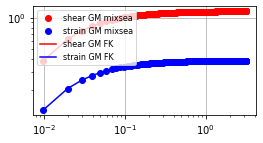

In [621]:

KZ
iGMband = np.arange(0,30)
print(LZ[iGMband])
N0 = 5.24e-3
Ssh_gm, GMsh = gm_shear_variance(KZ, iGMband, N0)
Sst_gm, GMst = gm_strain_variance(KZ, iGMband, N0)

KZ_GM, spectrum_shear_GM, spectrum_strain_GM = GM_model(KZ,dk,N0**2)


fig , axs =  plt.subplots(1, 1, figsize=(4,2))
ax = axs
ax.plot(KZ, GMsh, 'ro',label='shear GM mixsea')
ax.plot(KZ, GMst, 'bo',label='strain GM mixsea')
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid()

#ax.set_ylim(1e0,3e1)
ax.plot(KZ_GM, spectrum_shear_GM, 'r-',label='shear GM FK')
ax.plot(KZ_GM, spectrum_strain_GM, 'b-',label='strain GM FK')

ax.legend(fontsize=8)
    
            

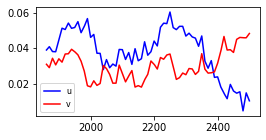

In [622]:
fig , axs =  plt.subplots(1, 1, figsize=(4,2))
ax = axs
ax.plot(zz, u, 'b-',label='u')
ax.plot(zz, v, 'r-',label='v')
ax.legend(fontsize=8)

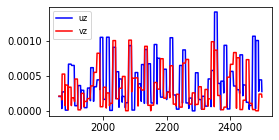

In [623]:
fig , axs =  plt.subplots(1, 1, figsize=(4,2))
ax = axs
ax.plot(zz, uz, 'b-',label='uz')
ax.plot(zz, vz, 'r-',label='vz')
ax.legend(fontsize=8)

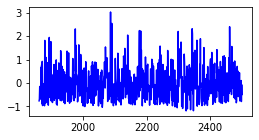

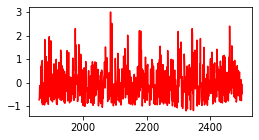

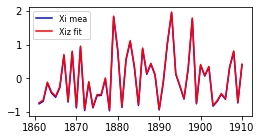

In [624]:
fig , axs =  plt.subplots(1, 1, figsize=(4,2))
ax = axs
ax.plot(zz, xiz_mea, 'b-',label='Xiz mea')
fig , axs =  plt.subplots(1, 1, figsize=(4,2))
ax = axs
ax.plot(zz, xiz_fit, 'r-',label='Xiz fit')

fig , axs =  plt.subplots(1, 1, figsize=(4,2))
ax = axs
ax.plot(zz[0:50], xiz_mea[0:50], 'b-',label='Xi mea')
ax.plot(zz[0:50], xiz_fit[0:50], 'r-',label='Xiz fit')
ax.legend(fontsize=8)

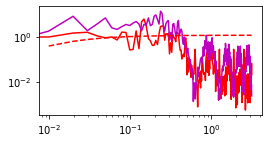

In [625]:
from scipy.interpolate import interp1d
_, _, PtotU, m0 = psd(uz/np.sqrt(N2m), 1, ffttype="t", detrend=True)
_, _, Ptot, m0 = psd((uz+1j*vz)/np.sqrt(N2m), 1, ffttype="t", detrend=True)

_, _, PtotTEST, m0 = psd((u+1j*v)/np.sqrt(N2m), 1, ffttype="t", detrend=True)


fig , axs =  plt.subplots(1, 1, figsize=(4,2))
ax = axs
ax.plot(m0, Ptot, 'r-',label='psd(uz+vz) mixsea')
ax.plot(m0, m0**2 *PtotTEST , 'm-',label='psd(u+v) mixsea')


ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(KZ, GMsh, 'r--',label='shear GM')


In [628]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


(0.001, 100.0)

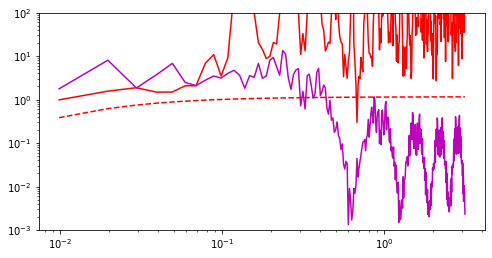

In [627]:
from scipy.interpolate import interp1d
_, _, PtotU, m0 = psd(uz/np.sqrt(N2m), 1, ffttype="t", detrend=True)
_, _, Ptot, m0 = psd((uz+1j*vz)/np.sqrt(N2m), 1, ffttype="t", detrend=True)

_, _, PtotTEST, m0 = psd((u+1j*v)/np.sqrt(N2m), 1, ffttype="t", detrend=True)


fig , axs =  plt.subplots(1, 1, figsize=(8,4))
ax = axs
ax.plot(m0[1::], Ptot[1::]/tfid, 'r-',label='psd(uz+vz) mixsea')
ax.plot(m0[1::], m0[1::]**2 *PtotTEST[1::] , 'm-',label='psd(u+v) mixsea')


ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(KZ, GMsh, 'r--',label='shear GM')
ax.set_ylim(1e-3,1e2)

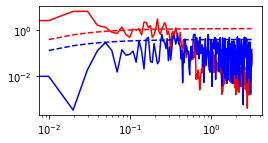

In [551]:



from scipy.interpolate import interp1d
_, _, PtotXiz, m0 = psd(xiz, 1, ffttype="t", detrend=True)


ax.plot(m0, PtotXiz, 'b-',label='psd(Xiz) mixsea')
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(KZ, GMsh, 'r--',label='shear GM')
ax.plot(KZ, GMst, 'b--',label='strain GM')
#ax.legend(fontsize=8)





In [543]:
m0.shape

(321,)

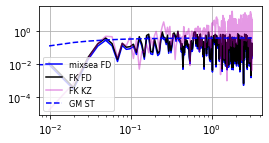

In [549]:
psd_strain_xi, psd_strain_xiz, m = PSDst(L,1,xi,xiz,percent_windowing_strain,varloss_strain) 

fig , axs =  plt.subplots(1, 1, figsize=(4,2))
ax = axs

ax.plot(m0, PtotXiz, 'b-',label='mixsea FD')
ax.plot(KZ, psd_strain_xiz, 'k-',label='FK FD')
ax.plot(KZ, psd_strain_xi, 'm-',label='FK KZ',alpha=.4)
ax.plot(KZ, GMst, 'b--',label='GM ST')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(fontsize=8)
ax.grid()

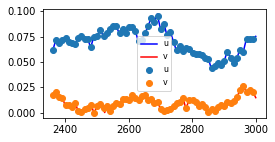

In [293]:
dz = 10
uzz = uz[np.arange(0,len(uz),dz)]
vzz = vz[np.arange(0,len(vz),dz)]
zzz = zz[np.arange(0,len(uz),dz)]

uu = u[np.arange(0,len(u),dz)]
vv = v[np.arange(0,len(v),dz)]

fig , axs =  plt.subplots(1, 1, figsize=(4,2))
ax = axs
ax.plot(zz, u, 'b-',label='u')
ax.plot(zz, v, 'r-',label='v')

ax.plot(zzz, uu, 'o',label='u')
ax.plot(zzz, vv, 'o',label='v')

ax.legend(fontsize=8)

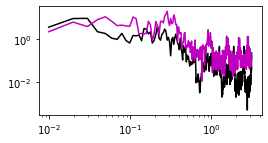

In [294]:
NFFT = len(u)
dz = 1
LFFT = NFFT * dz
L = LFFT
noverlap = NFFT /2

dk = 2*np.pi / LFFT
KZ = np.arange(2*np.pi/LFFT,2*np.pi/(2*dz)+dk,dk)
LZ = 2*np.pi / KZ
LZround = np.round(LZ).astype(int)


psd_uv, psd_shear_uv, psd_shear_uz, m = PSDsh(NFFT,1,u,v,uz,vz, KZ,N2m,percent_windowing_shear,varloss_shear) 

fig , axs =  plt.subplots(1, 1, figsize=(4,2))
ax = axs
#ax.plot(m0, PtotU, '-',label='Gunnar')
ax.plot(KZ, psd_shear_uz, 'k-',label='FK FD')
ax.plot(KZ, psd_shear_uv, 'm-',label='FK kz')
ax.set_yscale('log')
ax.set_xscale('log')

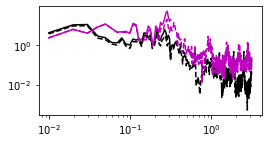

In [295]:
NFFT = len(uu)


dz = 10
LFFT = NFFT * dz
L = LFFT
noverlap = NFFT /2

dk2 = 2*np.pi / LFFT
KZ2 = np.arange(2*np.pi/LFFT,2*np.pi/(2*dz)+dk,dk)
LZ = 2*np.pi / KZ
LZround = np.round(LZ).astype(int)


psd_uv2, psd_shear_uv2, psd_shear_uz2, m = PSDsh(NFFT,1,uu,vv,uzz,vzz, KZ2,N2m,percent_windowing_shear,varloss_shear) 

fig , axs =  plt.subplots(1, 1, figsize=(4,2))
ax = axs
#ax.plot(m0, PtotU, '-',label='Gunnar')
ax.plot(KZ2, dz*psd_shear_uz2, 'k-',label='FK FD')
ax.plot(KZ2, dz*psd_shear_uv2, 'm-',label='FK kz')
ax.set_yscale('log')
ax.set_xscale('log')

ax.plot(KZ, psd_shear_uz, 'k--',label='FK FD')
ax.plot(KZ, psd_shear_uv, 'm--',label='FK kz')


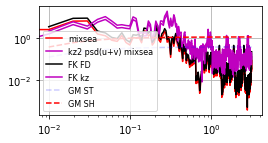

In [561]:
psd_uv, psd_shear_uv, psd_shear_uz, m = PSDsh(L,1,u,v,uz,vz, KZ,N2m,percent_windowing_shear,varloss_shear) 

fig , axs =  plt.subplots(1, 1, figsize=(4,2))
ax = axs


#ax.plot(m0, PtotU, '-',label='Gunnar')
ax.plot(m0, Ptot, 'r-',label='mixsea')
ax.plot(m0, m0**2 *PtotTEST , 'm-',label='kz2 psd(u+v) mixsea')

ax.plot(KZ, psd_shear_uz, 'k-',label='FK FD')
ax.plot(KZ, psd_shear_uv, 'm-',label='FK kz')

ax.plot(KZ, GMst, 'b--',label='GM ST',alpha=.2)
ax.plot(KZ, GMsh, 'r--',label='GM SH')
ax.set_yscale('log')
ax.set_xscale('log')



ax.legend(fontsize=8)
ax.grid()

### imm imc integrations

integration_check_indices


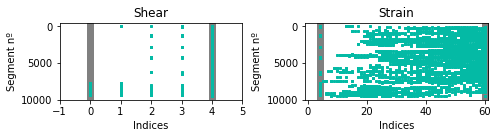

In [90]:
xax = np.arange(0,OUT_iiSH.shape[0])
fig , axs =  plt.subplots(1, 2, figsize=(7,2))
ax = axs[0]
ax.plot(OUT_iiSH['im1'],xax,'s',markersize=6,color='gray')
ax.plot(OUT_iiSH['im2'],xax,'s',markersize=6,color='gray')
ax.plot(OUT_iiSH['ic'],xax,'s',markersize=2,color='#04baa5')
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xlim(im1_sh-1,im2_sh+1)
ax.set_title('Shear')
ax.set_xlabel('Indices')
ax.set_ylabel('Segment nº')

xax = np.arange(0,OUT_iiST.shape[0])
ax = axs[1]
ax.plot(OUT_iiST['im1'],xax,'s',markersize=6,color='gray')
ax.plot(OUT_iiST['im2'],xax,'s',markersize=6,color='gray')
ax.plot(OUT_iiST['ic'],xax,'s',markersize=2,color='#04baa5')
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_title('Strain')
ax.set_xlabel('Indices')
ax.set_ylabel('Segment nº')
ax.set_xlim(im1_sh-1,im2_st+1)

fig.tight_layout(pad=1)
fig_filename = 'integration_check_indices'
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)

integration_check_wavelengthes


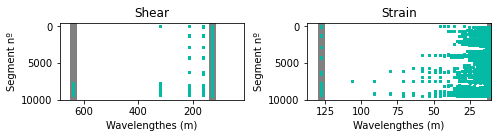

In [91]:
xax = np.arange(0,OUT_iiSH.shape[0])
fig , axs =  plt.subplots(1, 2, figsize=(7,2))
ax = axs[0]
ax.plot(OUT_iiSH['lz1'],xax,'s',markersize=6,color='gray')
ax.plot(OUT_iiSH['lz2'],xax,'s',markersize=6,color='gray')
ax.plot(OUT_iiSH['lzc'],xax,'s',markersize=2,color='#04baa5')
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xlim(LZ[im1_sh]+50,10)
ax.set_title('Shear')
ax.set_xlabel('Wavelengthes (m)')
ax.set_ylabel('Segment nº')
ax = axs[1]
ax.plot(OUT_iiST['lz1'],xax,'s',markersize=6,color='gray')
ax.plot(OUT_iiST['lz2'],xax,'s',markersize=6,color='gray')
ax.plot(OUT_iiST['lzc'],xax,'s',markersize=2,color='#04baa5')
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_title('Strain')
ax.set_xlabel('Wavelengthes (m)')
ax.set_ylabel('Segment nº')

ax.set_xlim(LZ[im1_st]+10,10)

fig.tight_layout(pad=1)
fig_filename = 'integration_check_wavelengthes'
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)


### ladcp noise 

In [77]:
w = 80
vaUVb = vaUV * np.nan
N1b = R1 * np.nan
for i in range(0,R1.shape[1]):
    vaUVb[:,i] = segments_binning(vaUV[:,i],w)
    N1b[:,i] = segments_binning(NN1[:,i],w)

fig, axs = plt.subplots(1, 1,figsize=(6,3))
ax = axs
ax.hist(np.sqrt(vaUVb.ravel()),bins=np.arange(0.,0.2,0.005))
ax.grid()
plt.close(fig)

fig, axs = plt.subplots(1, 1,figsize=(6,3))
ax = axs
ax.plot(N1b.ravel(),np.sqrt(vaUVb.ravel()),'.')
ax.grid()
ax.set_xscale('log')
plt.close(fig)




In [79]:
n1m = META[:,6].astype(float)
vauv = VAUV[:,0].astype(float)

ips = META[:,1].astype(int)
iKM3 = np.where(ips<= 37)[0]
sffx = 'KM3'

n11m = n1m[iKM3]
n10m = np.log10(n1m[iKM3])
vauv = vauv[iKM3]

bins = np.arange(-3.4,-2,0.2)
lb = len(bins)
cmap=plt.cm.get_cmap('jet',len(bins)-1)

BRUIT = []
fig , axs =  plt.subplots(1, 1, figsize=(8,5))
ax = axs
for b in range(0,len(bins)-1):
    fb = np.where((n10m>bins[b]) & (n10m<bins[b+1]))[0] #print(len(fb))
    N1b = 10**(np.nanmean([bins[b],bins[b+1]]))
    N2b = N1b**2
    BRUIT.append(np.nanmean(np.sqrt(vauv[fb])))
    
    ax.plot(n10m[fb],np.sqrt(vauv[fb]),'o',color=cmap(b))
    ax.plot(np.nanmean(n10m[fb]),np.nanmean(np.sqrt(vauv[fb])),'ko')
BRUIT = np.array(BRUIT)
ax.grid()
ax.set_ylabel('$var = \int_{Lseg}^{10m} PSD(u,v) dk$\n$rms = var^{1/2}$')
ax.set_xlabel('$<N>$  $log_{10}(s^{-1})$')

plt.close(fig)


BRUIT/dk

array([1.28277693, 1.17230634, 1.3698209 , 1.71933511, 1.94551293,
       2.52956981])

62

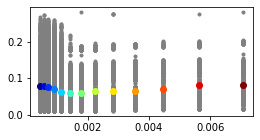

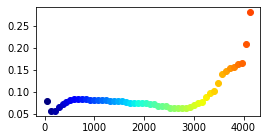

In [89]:
x = N11[:,GRR].ravel()
y = Uerr[:,GRR].ravel()



n10m = np.log10(x)
bins = np.arange(-3.4,-2,0.1)
lb = len(bins)
cmap=plt.cm.get_cmap('jet',len(bins)-1)
Y1 = []
BY = []
fig , axs =  plt.subplots(1, 1, figsize=(4,2))
ax = axs
for b in range(0,len(bins)-1):
    fb = np.where((n10m>bins[b]) & (n10m<bins[b+1]))[0] #print(len(fb))
    N1b = 10**(np.nanmean([bins[b],bins[b+1]]))
    N2b = N1b**2
    ax.plot([N1b]*len(fb),(y[fb]),'.',color='gray')
    ax.plot([N1b],np.nanmean(y[fb]),'o',color=cmap(b))
    Y1.append(np.nanmean(y[fb]))
    BY.append(N1b)
len(BY)


x = DTTB[:,GRR].ravel()
bins = np.arange(0,5000,80)
lb = len(bins)
cmap=plt.cm.get_cmap('jet',len(bins)-1)
Y2 = []
BY = []
fig , axs =  plt.subplots(1, 1, figsize=(4,2))
ax = axs
for b in range(0,len(bins)-1):
    fb = np.where((x>bins[b]) & (x<bins[b+1]))[0] #print(len(fb))
    N1b = (np.nanmean([bins[b],bins[b+1]]))

    #ax.plot([N1b]*len(fb),(y[fb]),'.',color='gray')
    ax.plot([N1b],np.nanmean(y[fb]),'o',color=cmap(b))
    Y2.append(np.nanmean(y[fb]))
    BY.append(N1b)
len(BY)

In [129]:
y = Uerr[:,GRR].ravel()
np.nanmean(y)

0.075813696

In [135]:
y = V[:,GRR].ravel()
np.nanmean(y)

0.005158412

### check ladcp KM3 vs Pi23

hydro_currents_sta3


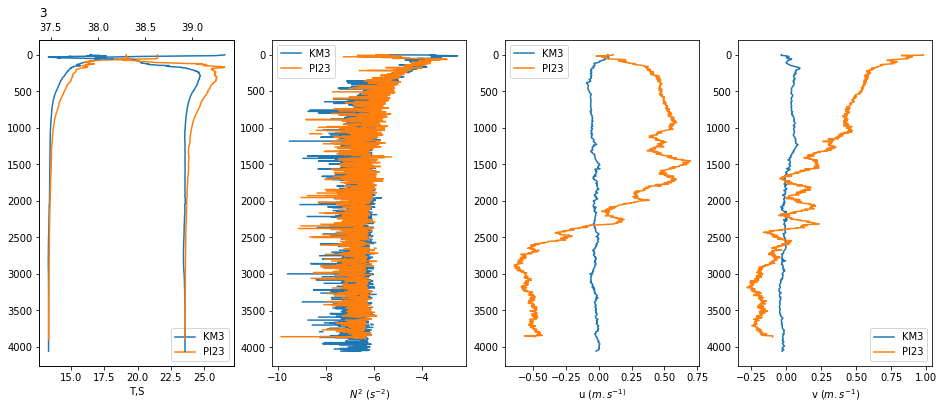

In [90]:
ip1, ip2 = 1, 39 ; sffx = 'sta11'
ip1, ip2 = 3, 38 ; sffx = 'sta3'
#ip1, ip2 = 6, 40 ; sffx = 'staKM3'


fig , axs =  plt.subplots(1, 4, figsize=(4*4,6))
ax = axs[0]
ax.plot(CT[:,ip1],D[:,ip1],label='KM3')
ax.plot(CT[:,ip2],D[:,ip2],label='PI23')
ax.invert_yaxis()
ax.legend()
ax.set_title(sta[ip1],loc='left')
ax2 = ax.twiny()
ax2.plot(SA[:,ip1],D[:,ip1],label='KM3')
ax2.plot(SA[:,ip2],D[:,ip2],label='PI23')
#ax2.invert_yaxis()
ax.set_xlabel('T,S')

ax = axs[1]
ax.plot(np.log10(N2_in[:,ip1]),D[:,ip1],label='KM3')
ax.plot(np.log10(N2_in[:,ip2]),D[:,ip2],label='PI23')
ax.invert_yaxis()
ax.legend()
ax.set_xlabel('$N^2$ $(s^{-2})$')

ax = axs[2]
ax.plot((U_in[:,ip1]),D[:,ip1],label='KM3')
ax.plot((U_in[:,ip2]),D[:,ip2],label='PI23')
ax.invert_yaxis()
ax.legend()
ax.set_xlabel('u $(m.s^{-1)}$')

ax = axs[3]
ax.plot((V_in[:,ip1]),D[:,ip1],label='KM3')
ax.plot((V_in[:,ip2]),D[:,ip2],label='PI23')
ax.invert_yaxis()
ax.legend()
ax.set_xlabel('v $(m.s^{-1})$')

fig_filename = 'hydro_currents_'+sffx
print(fig_filename)
#fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)



### check variances 

In [1884]:
OUT_META_COLS

['sta', 'ip', 'i1', 'i2', 'zmean', 'N2m', 'N1m', 'dttb']

In [1892]:
ips = META[:,1].astype(int)
n1m = META[:,6].astype(float)
dtb = META[:,7].astype(float)

rog = ROMG[:,9].astype(float)
dsl = ROMG[:,7].astype(float) # rw1:7, rw2:8,  1.10f: 11
sla = ROMG[:,6].astype(float)

ipp = np.where(np.isin(ips, KM3) & (dtb<1000))[0]
sffx = 'KM3 rog'

PSD_SH = np.array(OUT_PSD_SH)[ipp,:]
PSD_ST = np.array(OUT_PSD_ST)[ipp,:]
dtb = dtb[ipp]
rog = rog[ipp]
dsl = dsl[ipp]
sla = sla[ipp]
iii = ips[ipp]

n1m = n1m[ipp]
n10m = np.log10(n1m)

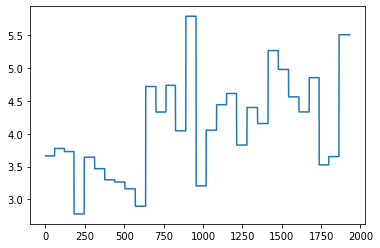

In [1896]:
plt.plot(rog)

In [1138]:
OUT_VASH_COLS


['va_imm_sh',
 'va_imc_sh',
 'vaGM_imm_sh',
 'vaGM_imc_sh',
 'r_shear_imm',
 'r_shear_imc',
 'var2_shear_imm',
 'var2_shear_imc']

In [1897]:
vaim = VASH[ipp,0].astype(float)
vaic = VASH[ipp,1].astype(float)

vaimgm = VASH[ipp,2].astype(float)
vaicgm = VASH[ipp,3].astype(float)

rimgm = VASH[ipp,4].astype(float)
ricgm = VASH[ipp,5].astype(float)

n2m = META[ipp,5].astype(float)

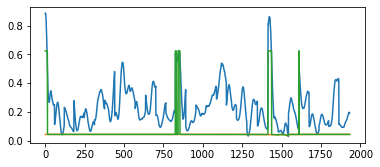

In [1898]:
fig, axs = plt.subplots(1, 1,figsize=(6,2.5))
ax = axs
ax.plot(vaim)
#ax.plot(vaic)
ax.plot(vaimgm)
ax.plot(vaicgm)


In [1891]:
OUT_VAST_COLS


['va_imm_st',
 'va_imc_st',
 'vaGM_imm_st',
 'vaGM_imc_st',
 'r_strain_imm',
 'r_strain_imc',
 'var2_strain_imm',
 'var2_strain_imc']

In [1899]:
vaim = VAST[ipp,0].astype(float)
vaic = VAST[ipp,1].astype(float)

vaimgm = VAST[ipp,2].astype(float)
vaicgm = VAST[ipp,3].astype(float)

rimgm = VAST[ipp,4].astype(float)
ricgm = VAST[ipp,5].astype(float)


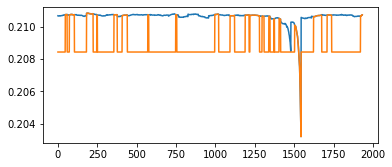

In [1906]:
fig, axs = plt.subplots(1, 1,figsize=(6,2.5))
ax = axs
#ax.plot(vaim)
#ax.plot(vaic)
ax.plot(vaimgm)
ax.plot(vaicgm)


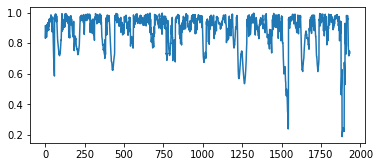

In [1909]:
fig, axs = plt.subplots(1, 1,figsize=(6,2.5))
ax = axs
#ax.plot(rimgm)
ax.plot(ricgm)



### FIGURE/RESULT : spectra binned by N1

In [33]:
sta[KM3]

array(['NK30', 'NK31', 'NK32', 'NK34', 'NK21', 'NK22', 'NK23', 'NK24',
       'NK25', 'NK26', 'NK27', 'NK28', 'NK10', 'NK11', 'NK12', 'NK13',
       'NK14', 'NK15', 'NK18', '3', '11', '12', '13', 'KM3', 'KM4', 'NK1',
       'NK2', 'NK17', 'NK4', 'NK5', 'NK6', 'NK8', 'NK8b', 'NK9', 'NK19',
       'NK20'], dtype=object)

4835 -3.2425635427202333 0.2679983568454034 0.37361143981084743
1195 -3.132015422591351 0.16752536975313084 0.14845367772312992
405 -2.90893639297195 0.23105242530589745 0.03263916223355599
206 -2.7131779017747326 0.6498109827582248 -0.028049519154503322
171 -2.498528266101615 0.3493247788496882 -0.0406480087872375
105 -2.321555641111232 0.10551842432057575 -0.20300182849203185
spectra_SH_ST_Nbins_Binning_by_N
1529.9253263970686 1.0049195775102102 28.89581316202887 8.173754443709084
57.69458796515289 1.0024637632938047 11.58038544868028 9.375877860629727




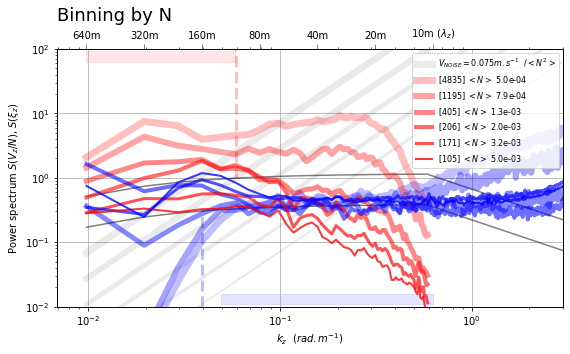

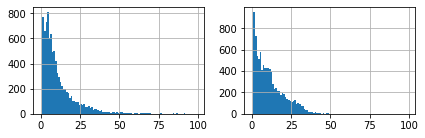

In [34]:
n1m = META[:,6].astype(float)
ips = META[:,1].astype(int)
ipp = np.where(np.isin(ips, KM3))[0]
len(ipp)
sffx = '[All KM3] Binning by N'
sffx = 'Binning by N'

PSD_SH = np.array(OUT_PSD_SH)[ipp,:]
PSD_ST = np.array(OUT_PSD_ST)[ipp,:]
n11m = n1m[ipp]
n10m = np.log10(n1m[ipp])

limy1, limy2 = 1e-2,1e2
limx1, limx2 = 7*np.nanmin(KZ)/10,3
xbin = n10m
bins = np.arange(-3.4,-2,0.2)
lb = len(bins)
cmap=plt.cm.get_cmap('coolwarm',len(bins)-1)
mina = .25
da = (1-mina)/lb

fig , axs =  plt.subplots(1, 1, figsize=(8,5))
ax = axs
ax.plot(np.array([2*np.pi/Lbs,2*np.pi/Lbs]),[limy1,GMst[im1_st]],'--', color='b',lw=3,alpha=.25)
ax.plot(np.array([KZ[im2_sh],KZ[im2_sh]]),[GMsh[im2_sh],limy2],'--', color='r',lw=3,alpha=.25)

ax.axvspan(2*np.pi/LZround[im1_sh], 2*np.pi/LZround[im2_sh], ymin=0.95, ymax=0.99, color='r',alpha=0.1)
ax.axvspan(2*np.pi/LZround[im1_st], 2*np.pi/LZround[im2_st], ymin=0.01, ymax=.05, color='b',alpha=0.1)
ax.grid()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(KZ[0:m10],GMsh[0:m10],'k-',alpha=.5)
ax.plot(KZ[0:m10],GMst[0:m10],'k-',alpha=.5)
ax.plot(KZ[m10::],(KZ[m10::]**-1)/1.5 ,'k-',alpha=.5)
ax.plot(KZ[m10::],((1/3)*KZ[m10::]**-1)/1.5 ,'k-',alpha=.5)
ax.set_ylabel('Power spectrum '+r'$S(V_z/N)$, $S(\xi_z)$')
ax.set_xlabel('$k_z$  $(rad.m^{-1})$')

for b in range(0,len(bins)-1):
    fb = np.where((xbin>bins[b]) & (xbin<bins[b+1]))[0] #print(len(fb))
    
    N1b = 10**(np.nanmean([bins[b],bins[b+1]]))
    N2b = N1b**2
    psd_sh = np.mean(PSD_SH[fb,:], axis=0).reshape(1, int(L/2)).flatten()
    psd_st = np.mean(PSD_ST[fb,:], axis=0).reshape(1, int(L/2)).flatten()
    
    x = np.log10(KZ[imm_st]); y = np.log10(psd_st[imm_st]); 
    res = stats.linregress(x,y);
    yfit = x*res.slope + res.intercept
    psd_st_fit = 10**yfit
    sl_st = res.slope
    
    x = np.log10(KZ[imm_sh]); y = np.log10(psd_sh[imm_sh]); 
    res = stats.linregress(x,y);
    yfit = x*res.slope + res.intercept
    psd_sh_fit = 10**yfit
    sl_sh = res.slope
    
    print(len(fb),np.nanmean(xbin[fb]),sl_sh,sl_st)
    
    if len(fb)>0:
        ax = axs
        

        Vsie = 1 * 0.075  
        if b == 0: noiselabel='$V_{NOISE}= '+str(np.round(Vsie,3))+' m.s^{-1}$  /$<N^2>$'
        else: noiselabel = ''
        
        Verr = Vsie / ((L/dz_ladcp)**1/2)  # error for segment of L = 640 meters, with a resolution of dz_ladcp = 10m
        Serr = Verr**2                        # associated variance
        Swhi = Serr / (KZ[-1] - KZ[0])        # this variance is distributed on the Delta Kz
        Sshe = Swhi * KZ**2                   # this white spectra is sheared
        Sshn = Sshe  / dk                     # normalized to get density
        ax.plot(KZ,Sshn/N2b,'k-',alpha=mina/3,lw=lb-b,label=noiselabel)
        
        
        ax.plot(KZ[0:m10],psd_sh[0:m10],'-',lw=lb-b,alpha=mina+da*b,
                label='['+str(len(fb))+'] $<N>$ '+("{:.1e}".format(N1b)).replace("+", ""),color='r') #cmap(b)

        ax.plot(KZ,psd_st,'-',lw=lb-b,alpha=mina+da*b,color='b')
        
        #ax.plot(KZ[imm_sh],psd_sh_fit,'-',lw=lb-b,alpha=mina+da*b,color='k')
        #ax.plot(KZ[imm_st],psd_st_fit,'-',lw=lb-b,alpha=mina+da*b,color='k')
        
      
    
ax.legend(fontsize=8,loc=1)

ax2 = ax.twiny()
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xticks(2*np.pi/np.array([640,320, 160,    80, 40,20,10]))
xax = 2*np.pi/np.array([640,320, 160,    80, 40,20,10])
#ax2.plot(xax,[limy2]*len(xax),'v',markersize=15,color='gray',alpha=.3)
ax2.tick_params(axis='x', length=5,color='gray',width=1,)
ax2.set_xticklabels(['640m','320m','160m','80m','40m','20m','10m $(\lambda_z)$'],fontsize=10,color='k',rotation=0)
ax2.set_ylim(limy1,limy2)
ax2.set_xlim(limx1,limx2)  
ax.set_ylim(limy1,limy2)
ax.set_xlim(limx1,limx2)
ax.set_title(sffx,fontsize=18,loc='left')

fig.tight_layout(pad=1)
fig_filename = 'spectra_SH_ST_Nbins_'+('_').join(sffx.split(' '))
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)
fig_SPECTRA = fig


print(np.nanmax(R1),np.nanmin(R1),np.nanmean(R1),np.nanmedian(R1))
print(np.nanmax(R2),np.nanmin(R2),np.nanmean(R2),np.nanmedian(R2))
print('\n')
fig , axs =  plt.subplots(1, 2, figsize=(6,2))
ax = axs[0]
ax.hist(R1.flatten(),bins=np.arange(0,100,1))
ax.grid()

ax = axs[1]
ax.hist(R2.flatten(),bins=np.arange(0,100,1))
ax.grid()
fig.tight_layout(pad=1)

### bins spectra supp

In [82]:
ips = META[:,1].astype(int)
n1m = META[:,6].astype(float)
dtb = META[:,7].astype(float)
tux = META[:,8].astype(float)

rog = ROMG[:,9].astype(float)
dsl = ROMG[:,7].astype(float) # rw1:7, rw2:8,  1.10f: 11
sla = ROMG[:,6].astype(float)

ipp = np.where(np.isin(ips, KM3))[0]
sffx = 'KM3 tux'

PSD_SH = np.array(OUT_PSD_SH)[ipp,:]
PSD_ST = np.array(OUT_PSD_ST)[ipp,:]
dtb = dtb[ipp]
rog = rog[ipp]
dsl = dsl[ipp]
sla = sla[ipp]
iii = ips[ipp]

n1m = n1m[ipp]
n10m = np.log10(n1m)

binx = np.arange(2,6.5,3/9)
xbin = rog

binz = np.arange(0,640*2,80)
zbin = dtb

binz = np.arange(-3.5,8.5,1)
zbin = dsl

#binz = np.arange(0,4,.2)
#zbin = sla


SM1 = np.empty((len(binz)-1,len(binx)-1))*np.nan
SM1lo = np.empty((len(binz)-1,len(binx)-1))*np.nan
SM2 = np.empty((len(binz)-1,len(binx)-1))*np.nan
SM2lo = np.empty((len(binz)-1,len(binx)-1))*np.nan
III = np.empty((len(binz)-1,len(binx)-1))*np.nan

for bx in range(0,len(binx)-1):
    for bz in range(0,len(binz)-1):
        fb = np.where((xbin>binx[bx]) & (xbin<=binx[bx+1])
            & (zbin>binz[bz]) & (zbin<=binz[bz+1]) & (dtb<640*2))[0] 
        #print(len(fb))
        if len(fb)>0:
            N1b = (np.nanmean(n1m[fb]))
            N2b = N1b**2
            psd_sh = np.mean(PSD_SH[fb,:], axis=0).reshape(1, int(L/2)).flatten()
            psd_st = np.mean(PSD_ST[fb,:], axis=0).reshape(1, int(L/2)).flatten()
            
            III[bz,bx] = np.nanmean(iii[fb])
            
            
            imm1 = np.arange(m640,m128+1,1)
            #imm1 = imm_sh
            x = np.log10(KZ[imm1]); y = np.log10(psd_sh[imm1]); 
            res = stats.linregress(x,y);
            yfit = x*res.slope + res.intercept
            psd_sh_fit = 10**yfit
            sl_sh = res.slope
            SM1lo[bz,bx] = sl_sh
            #
            #imm1 = np.arange(m640,m40+1,1)
            imm1 = np.arange(m640,m64+1,1)
            x = np.log10(KZ[imm1]); y = np.log10(psd_sh[imm1]); 
            res = stats.linregress(x,y);
            yfit = x*res.slope + res.intercept
            psd_sh_fit = 10**yfit
            sl_sh = res.slope
            SM1[bz,bx] = sl_sh
            # 
            
            imm2 = np.arange(m128,m64+1,1)
            x = np.log10(KZ[imm2]); y = np.log10(psd_st[imm2]); 
            res = stats.linregress(x,y);
            yfit = x*res.slope + res.intercept
            psd_st_fit = 10**yfit
            sl_st = res.slope
            SM2lo[bz,bx] = sl_st
            #
            #--------------------
            imm2 = np.arange(m128,m10+1,1)
            x = np.log10(KZ[imm2]); y = np.log10(psd_st[imm2]); 
            res = stats.linregress(x,y);
            yfit = x*res.slope + res.intercept
            psd_st_fit = 10**yfit
            sl_st = res.slope
            SM2[bz,bx] = sl_st
            

 
            
            #print(len(fb),np.nanmean(xbin[fb]),sl_sh,sl_st)

In [83]:
ips = META[:,1].astype(int)
n1m = META[:,6].astype(float)
dtb = META[:,7].astype(float)

rog = ROMG[:,9].astype(float)
dsl = ROMG[:,7].astype(float) # rw1:7, rw2:8,  1.10f: 11
sla = ROMG[:,6].astype(float)

ipp = np.where(np.isin(ips, KM3))[0]
sffx = 'KM3 dsl'

PSD_SH = np.array(OUT_PSD_SH)[ipp,:]
PSD_ST = np.array(OUT_PSD_ST)[ipp,:]
dtb = dtb[ipp]
rog = rog[ipp]
dsl = dsl[ipp]
sla = sla[ipp]
iii = ips[ipp]

n1m = n1m[ipp]
n10m = np.log10(n1m)

binx = np.arange(2,6.5,3/9)
xbin = rog

binz = np.arange(0,640*2,80)
zbin = dtb

binz = np.arange(-3.5,8.5,1)
zbin = dsl

#binz = np.arange(0,4,.2)
#zbin = sla


SM1 = np.empty((len(binz)-1,len(binx)-1))*np.nan
SM1lo = np.empty((len(binz)-1,len(binx)-1))*np.nan
SM2 = np.empty((len(binz)-1,len(binx)-1))*np.nan
SM2lo = np.empty((len(binz)-1,len(binx)-1))*np.nan
III = np.empty((len(binz)-1,len(binx)-1))*np.nan

for bx in range(0,len(binx)-1):
    for bz in range(0,len(binz)-1):
        fb = np.where((xbin>binx[bx]) & (xbin<=binx[bx+1])
            & (zbin>binz[bz]) & (zbin<=binz[bz+1]) & (dtb<640*2))[0] 
        #print(len(fb))
        if len(fb)>0:
            N1b = (np.nanmean(n1m[fb]))
            N2b = N1b**2
            psd_sh = np.mean(PSD_SH[fb,:], axis=0).reshape(1, int(L/2)).flatten()
            psd_st = np.mean(PSD_ST[fb,:], axis=0).reshape(1, int(L/2)).flatten()
            
            III[bz,bx] = np.nanmean(iii[fb])
            
            
            imm1 = np.arange(m640,m128+1,1)
            #imm1 = imm_sh
            x = np.log10(KZ[imm1]); y = np.log10(psd_sh[imm1]); 
            res = stats.linregress(x,y);
            yfit = x*res.slope + res.intercept
            psd_sh_fit = 10**yfit
            sl_sh = res.slope
            SM1lo[bz,bx] = sl_sh
            #
            #imm1 = np.arange(m640,m40+1,1)
            imm1 = np.arange(m640,m64+1,1)
            x = np.log10(KZ[imm1]); y = np.log10(psd_sh[imm1]); 
            res = stats.linregress(x,y);
            yfit = x*res.slope + res.intercept
            psd_sh_fit = 10**yfit
            sl_sh = res.slope
            SM1[bz,bx] = sl_sh
            # 
            
            imm2 = np.arange(m128,m64+1,1)
            x = np.log10(KZ[imm2]); y = np.log10(psd_st[imm2]); 
            res = stats.linregress(x,y);
            yfit = x*res.slope + res.intercept
            psd_st_fit = 10**yfit
            sl_st = res.slope
            SM2lo[bz,bx] = sl_st
            #
            #--------------------
            imm2 = np.arange(m128,m10+1,1)
            x = np.log10(KZ[imm2]); y = np.log10(psd_st[imm2]); 
            res = stats.linregress(x,y);
            yfit = x*res.slope + res.intercept
            psd_st_fit = 10**yfit
            sl_st = res.slope
            SM2[bz,bx] = sl_st
            

 
            
            #print(len(fb),np.nanmean(xbin[fb]),sl_sh,sl_st)

SMS


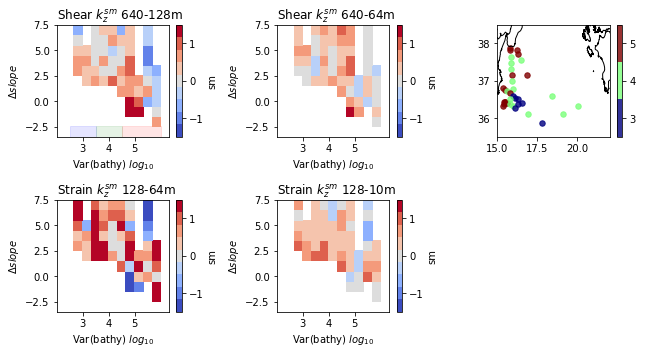

In [36]:
cmap= plt.cm.get_cmap('coolwarm',9)

ystr = '$\Delta slope$'
xstr = 'Var(bathy) $log_{10}$'

XX,YY = np.meshgrid(binx,binz)

fig , axs =  plt.subplots(2, 3, figsize=(9,5))
ax = axs[0,0]
ax.axvspan(2.5,3+0.5, ymin=0, ymax=.1, color='blue',alpha=.1,label='')
ax.axvspan(4-0.5,4+0.5, ymin=0, ymax=.1, color='green',alpha=.1,label='')
ax.axvspan(5-0.5,6, ymin=0, ymax=.1, color='red',alpha=.1,label='')
ax.set_xticks([3,4,5])
c = ax.pcolor(XX,YY,SM1lo,cmap=cmap,vmin=-1.5,vmax=1.5)
fig.colorbar(c,label='sm')
ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_title('Shear $k_z^{sm}$ 640-128m',loc='left')

ax = axs[0,1]
c = ax.pcolor(XX,YY,SM1,cmap=cmap,vmin=-1.5,vmax=1.5)
ax.set_xticks([3,4,5])
fig.colorbar(c,label='sm')
ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_title('Shear $k_z^{sm}$ 640-64m',loc='left')

ax = axs[1,0]
c = ax.pcolor(XX,YY,SM2lo,cmap=cmap,vmin=-1.5,vmax=1.5)
ax.set_xticks([3,4,5])
fig.colorbar(c,label='sm')
ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_title('Strain $k_z^{sm}$ 128-64m',loc='left')

ax = axs[1,1]
c = ax.pcolor(XX,YY,SM2,cmap=cmap,vmin=-1.5,vmax=1.5)
ax.set_xticks([3,4,5])
fig.colorbar(c,label='sm')
ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_title('Strain $k_z^{sm}$ 128-10m',loc='left')


cmap= plt.cm.get_cmap('gist_ncar',38)

cmap= plt.cm.get_cmap('jet',3)
ax = axs[0,2]
for i in range(0,len(KM3)):
    c = ax.scatter(lon_ctd[int(KM3[i])], lat_ctd[int(KM3[i])], 
                       c=ROGH10_gebco[int(KM3[i])], 
               s=30,cmap=cmap, vmin=2.5,vmax=5.5, alpha=0.8)
ax.plot(ITcoast['lonIT'],ITcoast['latIT'],'k-',lw=1)
ax.set_xlim(15,22)
ax.set_ylim(35.5,38.5)
fig.colorbar(c,label='');

ax = axs[1,2]
ax.set_axis_off()

fig.tight_layout(pad=1)
fig_filename = 'SMS'
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)


### FIGURE/RESULT : spectra binned by dsl, rog, tux

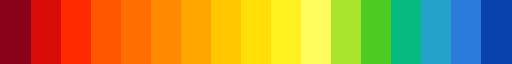

In [35]:
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm, Normalize

colors_list = [(9, 66, 173),
    (58, 149, 240),
               #(52, 250, 174),  # GREENS
               (0, 186, 137),
               #(8, 163, 78),
               (105, 209, 0),

              (255, 255, 105),
              (255, 239, 15),  # YELLOWS
               #(122, 217, 50),
              (255, 208, 0),

              (255, 162, 0),
              (255, 119, 0), # ORANGES
              (255, 85, 0),

              (255, 17, 0),
              (138, 1, 26),  # REDS
              # (162, 62, 250),
               ]
mycmap2 = colors.LinearSegmentedColormap.from_list('my_colormap', (np.array(colors_list)/255),N=17)
mycmap22 = colors.LinearSegmentedColormap.from_list('my_colormap', (np.array(colors_list[::-1])/255),N=17)

mycmap22

In [36]:

def find_bins(data, p):
    """
    Trouve les limites des bins pour diviser les données en pourcentages égaux.

    Parameters:
    - data (array-like): Les données à analyser.
    - p (float): Pourcentage de données par bin (par exemple, 10 pour 10%).

    Returns:
    - bins (list): Les limites des bins.
    """
    # Tri des données
    sorted_data = np.sort((data))
    
    # Calcul des limites des bins
    quantiles = np.linspace(0, 1, int(100 / p) + 1)
    bins = np.quantile(sorted_data, quantiles)
    
    return bins


283 1.3904958668348373 0.31180423333156343 0.10711823557862724 8 34
333 2.3821389513635762 0.3327217793062906 0.4612248225503968 0 34
312 3.0327398354569772 0.1881154732933187 0.38779815016748703 0 34
353 3.8687732392337773 0.1941578064791443 0.3737830583347332 0 34
324 5.022987826314677 0.2685831415202002 0.20087888308600474 0 34
244 8.361438357378345 0.6454916467193532 0.12405627940673734 1 34
spectra_SH_ST_Nbins_Binning_by_Δ-slope


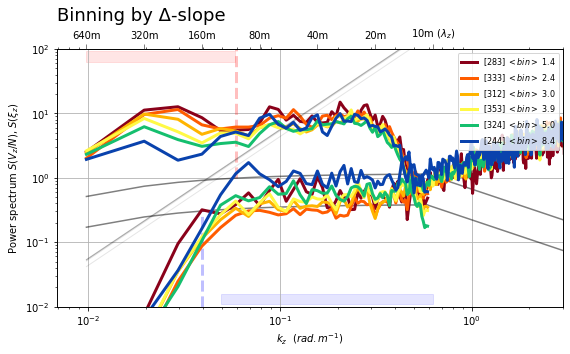

In [38]:
ips = META[:,1].astype(int)
n1m = META[:,6].astype(float)
dtb = META[:,7].astype(float)

rog = ROMG[:,9].astype(float)
dsl = ROMG[:,7].astype(float) # rw1:7, rw2:8,  1.10f: 11
sla = ROMG[:,6].astype(float)

ipp = np.where(np.isin(ips, KM3))[0]

sffx = 'Binning by Δ-slope'

PSD_SH = np.array(OUT_PSD_SH)[ipp,:]
PSD_ST = np.array(OUT_PSD_ST)[ipp,:]
dtb = dtb[ipp]
rog = rog[ipp]
dsl = dsl[ipp]
sla = sla[ipp]
iii = ips[ipp]
lat = lat_ctd[iii]

n1m = n1m[ipp]
n10m = np.log10(n1m)


#----
binz = np.arange(0,640*2,80)
zbin = dtb


#----
binx = np.arange(2,6.5,3/9) # 2*3/9
binx = find_bins(rog, 15)
xbin = rog
lb = len(binx)

#----
#binx = np.arange(-3.5,8.5,1)
binx = find_bins(dsl[dsl>0], 15)
#binx = find_bins(dsl, 15)
xbin = dsl
lb = len(binx)




limy1, limy2 = 1e-2,1e2
limx1, limx2 = 7*np.nanmin(KZ)/10,3



#cmap=plt.cm.get_cmap('jet',len(binx)-1)
cmap = colors.LinearSegmentedColormap.from_list('my_colormap', 
          (np.array(colors_list[::-1])/255),N=len(binx)-1)

#cmap=plt.cm.get_cmap('jet',len(binx)-1)
#cmap = colors.LinearSegmentedColormap.from_list('my_colormap', 
#          (np.array(colors_list)/255),N=len(binx)-1)

mina = .25
da = (1-mina)/lb

fig , axs =  plt.subplots(1, 1, figsize=(8,5))
ax = axs
ax.plot(np.array([2*np.pi/Lbs,2*np.pi/Lbs]),[limy1,GMst[im1_st]],'--', color='b',lw=3,alpha=.25)
ax.plot(np.array([KZ[im2_sh],KZ[im2_sh]]),[GMsh[im2_sh],limy2],'--', color='r',lw=3,alpha=.25)

ax.axvspan(2*np.pi/LZround[im1_sh], 2*np.pi/LZround[im2_sh], ymin=0.95, ymax=0.99, color='r',alpha=0.1)
ax.axvspan(2*np.pi/LZround[im1_st], 2*np.pi/LZround[im2_st], ymin=0.01, ymax=.05, color='b',alpha=0.1)
ax.grid()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(KZ[0:m10],GMsh[0:m10],'k-',alpha=.5)
ax.plot(KZ[0:m10],GMst[0:m10],'k-',alpha=.5)
ax.plot(KZ[m10::],(KZ[m10::]**-1)/1.5 ,'k-',alpha=.5)
ax.plot(KZ[m10::],((1/3)*KZ[m10::]**-1)/1.5 ,'k-',alpha=.5)
ax.set_ylabel('Power spectrum '+r'$S(V_z/N)$, $S(\xi_z)$')
ax.set_xlabel('$k_z$  $(rad.m^{-1})$')

for bx in range(0,len(binx)-1):
    fb = np.where((xbin>binx[bx]) & (xbin<binx[bx+1]) 
                  & (dtb< 2*500)  )[0] 
    
    if len(fb)>0:
        N1b = (np.nanmean(n11m[fb]))
        N2b = N1b**2
        psd_sh = np.mean(PSD_SH[fb,:], axis=0).reshape(1, int(L/2)).flatten()
        psd_st = np.mean(PSD_ST[fb,:], axis=0).reshape(1, int(L/2)).flatten()
        
        #--------------------
        imm2 = np.arange(m128,m10+1,1)
        x = np.log10(KZ[imm2]); y = np.log10(psd_st[imm2]); 
        res = stats.linregress(x,y);
        yfit = x*res.slope + res.intercept
        psd_st_fit = 10**yfit
        sl_st = res.slope
        #
        imm1 = np.arange(m640,m64+1,1)
        x = np.log10(KZ[imm1]); y = np.log10(psd_sh[imm1]); 
        res = stats.linregress(x,y);
        yfit = x*res.slope + res.intercept
        psd_sh_fit = 10**yfit
        sl_sh = res.slope
        #
        mbin = np.nanmean(xbin[fb])
        print(len(fb),mbin,sl_sh,sl_st,iii[fb].min(),iii[fb].max())
        #--------------------
        
        
        
        ax = axs
        
        Vsie = 1 * 0.075  
        if b == 0: noiselabel='$V_{NOISE}= '+str(np.round(Vsie,3))+' m.s^{-1}$  /$<N^2>$'
        else: noiselabel = ''  
        Verr = Vsie / ((L/dz_ladcp)**1/2)  # error for segment of L = 640 meters, with a resolution of dz_ladcp = 10m
        Serr = Verr**2                        # associated variance
        Swhi = Serr / (KZ[-1] - KZ[0])        # this variance is distributed on the Delta Kz
        Sshe = Swhi * KZ**2                   # this white spectra is sheared
        Sshn = Sshe  / dk                     # normalized to get density
        ax.plot(KZ,Sshn/N2b,'k-',alpha=.1,lw=1,label=noiselabel)

        ax.plot(KZ[0:m10],psd_sh[0:m10],'-',lw=3,alpha=1,
                label='['+str(len(fb))+'] $<bin>$ '+str(np.round(mbin,1)),color=cmap(bx))

        ax.plot(KZ,psd_st,'-',lw=3,alpha=1,color=cmap(bx))
        
        #ax.plot(KZ[imm1],psd_sh_fit,'-',lw=lb-bx,alpha=mina+da*bx,color='k')
        #ax.plot(KZ[imm2],psd_st_fit,'-',lw=lb-bx,alpha=mina+da*bx,color='k')
        
ax.legend(fontsize=8,loc=1)

ax2 = ax.twiny()
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xticks(2*np.pi/np.array([640,320, 160,    80, 40,20,10]))
xax = 2*np.pi/np.array([640,320, 160,    80, 40,20,10])
#ax2.plot(xax,[limy2]*len(xax),'v',markersize=15,color='gray',alpha=.3)
ax2.tick_params(axis='x', length=5,color='gray',width=1,)
ax2.set_xticklabels(['640m','320m','160m','80m','40m','20m','10m $(\lambda_z)$'],fontsize=10,color='k',rotation=0)
ax2.set_ylim(limy1,limy2)
ax2.set_xlim(limx1,limx2)  
ax.set_ylim(limy1,limy2)
ax.set_xlim(limx1,limx2)
ax.set_title(sffx,fontsize=18,loc='left')

fig.tight_layout(pad=1)
fig_filename = 'spectra_SH_ST_Nbins_'+('_').join(sffx.split(' '))
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)



196 3.0875111204998613 0.3060962590706428 0.24405674844718878 10 18
189 3.4294642999638385 0.13415503703808065 0.3684910120700533 7 32
185 3.680514705354665 -0.01780293174348393 0.1301031069344853 0 33
265 4.020149745796971 0.06913943101070158 0.23444623525187058 15 25
325 4.467614495379879 0.6264501963964764 0.40740099593491463 21 30
322 5.077834079012779 0.321532534744628 -0.11367005760887985 14 34
spectra_SH_ST_Nbins_Binning_by_roughness


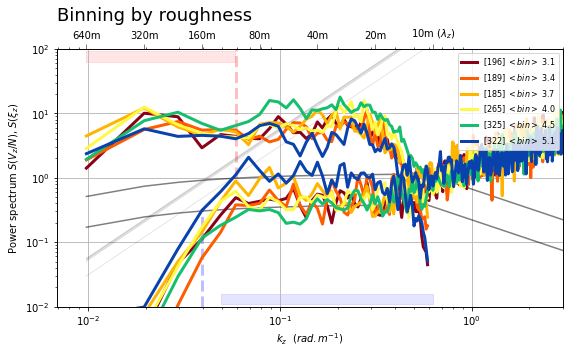

In [39]:
ips = META[:,1].astype(int)
n1m = META[:,6].astype(float)
dtb = META[:,7].astype(float)

rog = ROMG[:,9].astype(float)
dsl = ROMG[:,7].astype(float) # rw1:7, rw2:8,  1.10f: 11
sla = ROMG[:,6].astype(float)

ipp = np.where(np.isin(ips, KM3))[0]

sffx = 'Binning by roughness'

PSD_SH = np.array(OUT_PSD_SH)[ipp,:]
PSD_ST = np.array(OUT_PSD_ST)[ipp,:]
dtb = dtb[ipp]
rog = rog[ipp]
dsl = dsl[ipp]
sla = sla[ipp]
iii = ips[ipp]
lat = lat_ctd[iii]

n1m = n1m[ipp]
n10m = np.log10(n1m)


#----
binz = np.arange(0,640*2,80)
zbin = dtb


#----
binx = np.arange(2,6.5,3/9) # 2*3/9
binx = find_bins(rog, 15)
xbin = rog
lb = len(binx)






limy1, limy2 = 1e-2,1e2
limx1, limx2 = 7*np.nanmin(KZ)/10,3



#cmap=plt.cm.get_cmap('jet',len(binx)-1)
cmap = colors.LinearSegmentedColormap.from_list('my_colormap', 
          (np.array(colors_list[::-1])/255),N=len(binx)-1)

#cmap=plt.cm.get_cmap('jet',len(binx)-1)
#cmap = colors.LinearSegmentedColormap.from_list('my_colormap', 
#          (np.array(colors_list)/255),N=len(binx)-1)

mina = .25
da = (1-mina)/lb

fig , axs =  plt.subplots(1, 1, figsize=(8,5))
ax = axs
ax.plot(np.array([2*np.pi/Lbs,2*np.pi/Lbs]),[limy1,GMst[im1_st]],'--', color='b',lw=3,alpha=.25)
ax.plot(np.array([KZ[im2_sh],KZ[im2_sh]]),[GMsh[im2_sh],limy2],'--', color='r',lw=3,alpha=.25)

ax.axvspan(2*np.pi/LZround[im1_sh], 2*np.pi/LZround[im2_sh], ymin=0.95, ymax=0.99, color='r',alpha=0.1)
ax.axvspan(2*np.pi/LZround[im1_st], 2*np.pi/LZround[im2_st], ymin=0.01, ymax=.05, color='b',alpha=0.1)
ax.grid()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(KZ[0:m10],GMsh[0:m10],'k-',alpha=.5)
ax.plot(KZ[0:m10],GMst[0:m10],'k-',alpha=.5)
ax.plot(KZ[m10::],(KZ[m10::]**-1)/1.5 ,'k-',alpha=.5)
ax.plot(KZ[m10::],((1/3)*KZ[m10::]**-1)/1.5 ,'k-',alpha=.5)
ax.set_ylabel('Power spectrum '+r'$S(V_z/N)$, $S(\xi_z)$')
ax.set_xlabel('$k_z$  $(rad.m^{-1})$')

for bx in range(0,len(binx)-1):
    fb = np.where((xbin>binx[bx]) & (xbin<binx[bx+1]) 
                  & (dtb< 2*500)  )[0] 
    
    if len(fb)>0:
        N1b = (np.nanmean(n11m[fb]))
        N2b = N1b**2
        psd_sh = np.mean(PSD_SH[fb,:], axis=0).reshape(1, int(L/2)).flatten()
        psd_st = np.mean(PSD_ST[fb,:], axis=0).reshape(1, int(L/2)).flatten()
        
        #--------------------
        imm2 = np.arange(m128,m10+1,1)
        x = np.log10(KZ[imm2]); y = np.log10(psd_st[imm2]); 
        res = stats.linregress(x,y);
        yfit = x*res.slope + res.intercept
        psd_st_fit = 10**yfit
        sl_st = res.slope
        #
        imm1 = np.arange(m640,m64+1,1)
        x = np.log10(KZ[imm1]); y = np.log10(psd_sh[imm1]); 
        res = stats.linregress(x,y);
        yfit = x*res.slope + res.intercept
        psd_sh_fit = 10**yfit
        sl_sh = res.slope
        #
        mbin = np.nanmean(xbin[fb])
        print(len(fb),mbin,sl_sh,sl_st,iii[fb].min(),iii[fb].max())
        #--------------------
        
        
        
        ax = axs
        
        Vsie = 1 * 0.075  
        if b == 0: noiselabel='$V_{NOISE}= '+str(np.round(Vsie,3))+' m.s^{-1}$  /$<N^2>$'
        else: noiselabel = ''  
        Verr = Vsie / ((L/dz_ladcp)**1/2)  # error for segment of L = 640 meters, with a resolution of dz_ladcp = 10m
        Serr = Verr**2                        # associated variance
        Swhi = Serr / (KZ[-1] - KZ[0])        # this variance is distributed on the Delta Kz
        Sshe = Swhi * KZ**2                   # this white spectra is sheared
        Sshn = Sshe  / dk                     # normalized to get density
        ax.plot(KZ,Sshn/N2b,'k-',alpha=.1,lw=1,label=noiselabel)

        ax.plot(KZ[0:m10],psd_sh[0:m10],'-',lw=3,alpha=1,
                label='['+str(len(fb))+'] $<bin>$ '+str(np.round(mbin,1)),color=cmap(bx))

        ax.plot(KZ,psd_st,'-',lw=3,alpha=1,color=cmap(bx))
        
        #ax.plot(KZ[imm1],psd_sh_fit,'-',lw=lb-bx,alpha=mina+da*bx,color='k')
        #ax.plot(KZ[imm2],psd_st_fit,'-',lw=lb-bx,alpha=mina+da*bx,color='k')
        
ax.legend(fontsize=8,loc=1)

ax2 = ax.twiny()
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xticks(2*np.pi/np.array([640,320, 160,    80, 40,20,10]))
xax = 2*np.pi/np.array([640,320, 160,    80, 40,20,10])
#ax2.plot(xax,[limy2]*len(xax),'v',markersize=15,color='gray',alpha=.3)
ax2.tick_params(axis='x', length=5,color='gray',width=1,)
ax2.set_xticklabels(['640m','320m','160m','80m','40m','20m','10m $(\lambda_z)$'],fontsize=10,color='k',rotation=0)
ax2.set_ylim(limy1,limy2)
ax2.set_xlim(limx1,limx2)  
ax.set_ylim(limy1,limy2)
ax.set_xlim(limx1,limx2)
ax.set_title(sffx,fontsize=18,loc='left')

fig.tight_layout(pad=1)
fig_filename = 'spectra_SH_ST_Nbins_'+('_').join(sffx.split(' '))
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)



1297 1.0 0.3021171666820506 0.16512944572294802 0 34
515 2.0 0.22638032161712035 0.35643382828559345 1 28
121 3.0 0.37069492460174275 0.2682322787345124 14 32
spectra_SH_ST_Nbins_Binning_by_Turner_regimes


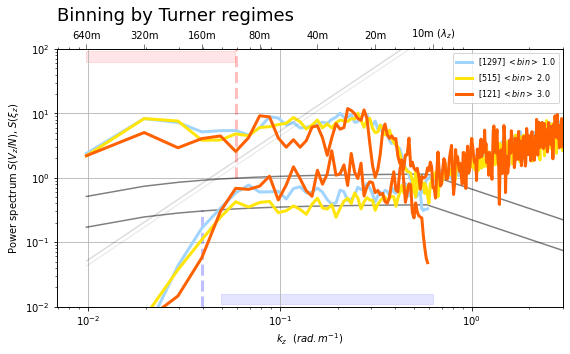

In [42]:
ips = META[:,1].astype(int)
n1m = META[:,6].astype(float)
dtb = META[:,7].astype(float)
tux = META[:,8].astype(float)

rog = ROMG[:,9].astype(float)
dsl = ROMG[:,7].astype(float) # rw1:7, rw2:8,  1.10f: 11
sla = ROMG[:,6].astype(float)

ipp = np.where(np.isin(ips, KM3))[0]


sffx = 'Binning by Turner regimes'

PSD_SH = np.array(OUT_PSD_SH)[ipp,:]
PSD_ST = np.array(OUT_PSD_ST)[ipp,:]
dtb = dtb[ipp]
rog = rog[ipp]
dsl = dsl[ipp]
sla = sla[ipp]
iii = ips[ipp]
tux = tux[ipp]


lat = lat_ctd[iii]

n1m = n1m[ipp]
n10m = np.log10(n1m)


#----
binz = np.arange(0,640*2,80)
zbin = dtb



#----
binx = find_bins(tux, 15)
binx = np.arange(0.5,4.5,1) # 2*3/9
xbin = tux
lb = len(binx)




limy1, limy2 = 1e-2,1e2
limx1, limx2 = 7*np.nanmin(KZ)/10,3



#cmap=plt.cm.get_cmap('jet',len(binx)-1)
cmap = colors.LinearSegmentedColormap.from_list('my_colormap', 
          (np.array(colors_list[::-1])/255),N=len(binx)-1)
cmap = turner_cmap

#cmap=plt.cm.get_cmap('jet',len(binx)-1)
#cmap = colors.LinearSegmentedColormap.from_list('my_colormap', 
#          (np.array(colors_list)/255),N=len(binx)-1)

mina = .25
da = (1-mina)/lb

fig , axs =  plt.subplots(1, 1, figsize=(8,5))
ax = axs
ax.plot(np.array([2*np.pi/Lbs,2*np.pi/Lbs]),[limy1,GMst[im1_st]],'--', color='b',lw=3,alpha=.25)
ax.plot(np.array([KZ[im2_sh],KZ[im2_sh]]),[GMsh[im2_sh],limy2],'--', color='r',lw=3,alpha=.25)

ax.axvspan(2*np.pi/LZround[im1_sh], 2*np.pi/LZround[im2_sh], ymin=0.95, ymax=0.99, color='r',alpha=0.1)
ax.axvspan(2*np.pi/LZround[im1_st], 2*np.pi/LZround[im2_st], ymin=0.01, ymax=.05, color='b',alpha=0.1)
ax.grid()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(KZ[0:m10],GMsh[0:m10],'k-',alpha=.5)
ax.plot(KZ[0:m10],GMst[0:m10],'k-',alpha=.5)
ax.plot(KZ[m10::],(KZ[m10::]**-1)/1.5 ,'k-',alpha=.5)
ax.plot(KZ[m10::],((1/3)*KZ[m10::]**-1)/1.5 ,'k-',alpha=.5)
ax.set_ylabel('Power spectrum '+r'$S(V_z/N)$, $S(\xi_z)$')
ax.set_xlabel('$k_z$  $(rad.m^{-1})$')

for bx in range(0,len(binx)-1):
    fb = np.where((xbin>binx[bx]) & (xbin<binx[bx+1]) 
                  & (dtb< 1000)  )[0] 
    
    if len(fb)>0:
        N1b = (np.nanmean(n11m[fb]))
        N2b = N1b**2
        psd_sh = np.mean(PSD_SH[fb,:], axis=0).reshape(1, int(L/2)).flatten()
        psd_st = np.mean(PSD_ST[fb,:], axis=0).reshape(1, int(L/2)).flatten()
        
        #--------------------
        imm2 = np.arange(m128,m10+1,1)
        x = np.log10(KZ[imm2]); y = np.log10(psd_st[imm2]); 
        res = stats.linregress(x,y);
        yfit = x*res.slope + res.intercept
        psd_st_fit = 10**yfit
        sl_st = res.slope
        #
        imm1 = np.arange(m640,m64+1,1)
        x = np.log10(KZ[imm1]); y = np.log10(psd_sh[imm1]); 
        res = stats.linregress(x,y);
        yfit = x*res.slope + res.intercept
        psd_sh_fit = 10**yfit
        sl_sh = res.slope
        #
        mbin = np.nanmean(xbin[fb])
        print(len(fb),mbin,sl_sh,sl_st,iii[fb].min(),iii[fb].max())
        #--------------------
        
        
        
        ax = axs
        
        Vsie = 1 * 0.075  
        if b == 0: noiselabel='$V_{NOISE}= '+str(np.round(Vsie,3))+' m.s^{-1}$  /$<N^2>$'
        else: noiselabel = ''  
        Verr = Vsie / ((L/dz_ladcp)**1/2)  # error for segment of L = 640 meters, with a resolution of dz_ladcp = 10m
        Serr = Verr**2                        # associated variance
        Swhi = Serr / (KZ[-1] - KZ[0])        # this variance is distributed on the Delta Kz
        Sshe = Swhi * KZ**2                   # this white spectra is sheared
        Sshn = Sshe  / dk                     # normalized to get density
        ax.plot(KZ,Sshn/N2b,'k-',alpha=.1,lw=1,label=noiselabel)

        ax.plot(KZ[0:m10],psd_sh[0:m10],'-',lw=3,alpha=1,
                label='['+str(len(fb))+'] $<bin>$ '+str(np.round(mbin,1)),color=cmap(bx))

        ax.plot(KZ,psd_st,'-',lw=3,alpha=1,color=cmap(bx))
        
        #ax.plot(KZ[imm1],psd_sh_fit,'-',lw=lb-bx,alpha=mina+da*bx,color='k')
        #ax.plot(KZ[imm2],psd_st_fit,'-',lw=lb-bx,alpha=mina+da*bx,color='k')
        
ax.legend(fontsize=8,loc=1)

ax2 = ax.twiny()
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xticks(2*np.pi/np.array([640,320, 160,    80, 40,20,10]))
xax = 2*np.pi/np.array([640,320, 160,    80, 40,20,10])
#ax2.plot(xax,[limy2]*len(xax),'v',markersize=15,color='gray',alpha=.3)
ax2.tick_params(axis='x', length=5,color='gray',width=1,)
ax2.set_xticklabels(['640m','320m','160m','80m','40m','20m','10m $(\lambda_z)$'],fontsize=10,color='k',rotation=0)
ax2.set_ylim(limy1,limy2)
ax2.set_xlim(limx1,limx2)  
ax.set_ylim(limy1,limy2)
ax.set_xlim(limx1,limx2)
ax.set_title(sffx,fontsize=18,loc='left')

fig.tight_layout(pad=1)
fig_filename = 'spectra_SH_ST_Nbins_'+('_').join(sffx.split(' '))
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)



### Rw & w

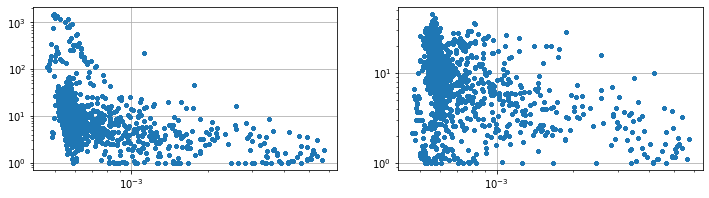

In [43]:
w = 80
R1b = R1 * np.nan
R2b = R1 * np.nan
N1b = R1 * np.nan
for i in range(0,R1.shape[1]):
    R1b[:,i] = segments_binning(R1[:,i],w)
    R2b[:,i] = segments_binning(R2[:,i],w)
    N1b[:,i] = segments_binning(NN1[:,i],w)

fig, axs = plt.subplots(1, 2,figsize=(12,3))
ax = axs[0]
ax.plot(N1b.flatten(),R1b.flatten(),'.')

ax.grid()
ax.set_xscale('log')
ax.set_yscale('log')
ax = axs[1]
ax.plot(N1b.flatten(),R2b.flatten(),'.')
ax.grid()
ax.set_xscale('log')
ax.set_yscale('log')
#plt.close(fig)

In [44]:
i = 0
fcor = 1.00*gsw.geostrophy.f(lat_ctd[i])
w = N0
rw_n0 = omega_to_rw(w,fcor)
print('N0:',w,'Rw:',rw_n0)

m2 = 2.236e-5*2*np.pi
rw_m2 = omega_to_rw(m2,fcor)
print('M2:',m2,'Rw:',rw_m2)

f2f    = 2*gsw.geostrophy.f(lat_ctd[i])
rw_2f = omega_to_rw(f2f,fcor)
print('2f:',f2f,'Rw:',rw_2f)

f141    = 1.41*gsw.geostrophy.f(lat_ctd[i])
rw_141f = omega_to_rw(f141,fcor)
print('1.41f:',f141,'Rw:',rw_141f)

f130    = 1.30*gsw.geostrophy.f(lat_ctd[i])
rw_130f = omega_to_rw(f130,fcor)
print('1.40f:',f130,'Rw:',rw_130f)

f110    = 1.10*gsw.geostrophy.f(lat_ctd[i])
rw_110f = omega_to_rw(f110,fcor)
print('1.10f:',f110,'Rw:',rw_110f)

f105    = 1.05*gsw.geostrophy.f(lat_ctd[i])
rw_105f = omega_to_rw(f105,fcor)
print('1.05f:',f105,'Rw:',rw_105f)

f102 = 1.02*gsw.geostrophy.f(lat_ctd[i])
rw_102f = omega_to_rw(f102,fcor)
print('1.02f:',f102,'Rw:',rw_102f)

f101 = 1.01*gsw.geostrophy.f(lat_ctd[i])
rw_101f = omega_to_rw(f101,fcor)
print('1.01f:',f101,'Rw:',rw_101f)

f1001 = 1.001*gsw.geostrophy.f(lat_ctd[i])
rw_1001f = omega_to_rw(f1001,fcor)
print('1.001f:',f1001,'Rw:',rw_1001f)


w_Rw3   = rw_to_omega(fcor,3)
w_Rw300 = rw_to_omega(fcor,300)
w_Rw1   = rw_to_omega(fcor,1.001)
print(1.001,w_Rw1)
print(300,w_Rw300)
print(3,w_Rw3)
m2>w_Rw3

rw_m2 = omega_to_rw(m2,fcor)
rw_09m2 = omega_to_rw(0.9*m2,fcor)
print(m2,rw_m2)
print(0.9*m2,rw_09m2)



N0: 0.00524 Rw: 1.0005383960264695
M2: 0.00014049202346853556 Rw: 2.196835589927702
2f: 0.00017192489195155537 Rw: 1.6666666666666665
1.41f: 0.00012120704882584653 Rw: 3.0240866309078025
1.40f: 0.000111751179768511 Rw: 3.89855072463768
1.10f: 9.455869057335546e-05 Rw: 10.523809523809515
1.05f: 9.026056827456657e-05 Rw: 20.512195121951223
1.02f: 8.768169489529323e-05 Rw: 50.50495049504953
1.01f: 8.682207043553546e-05 Rw: 100.50248756218896
1.001f: 8.604840842175345e-05 Rw: 1000.5002498752054
1.001 0.0038453184235374784
300 8.62494666273981e-05
3 0.00012156925695370929
0.00014049202346853556 2.196835589927702
0.000126442821121682 2.7188489530867974


In [45]:
#-------------------------------
FCOR = D * np.nan
for i in range(0,D.shape[1]):
    FCOR[:,i] = gsw.geostrophy.f(lat_ctd[i])

W1 = rw_to_omega(FCOR,R1)
W2 = rw_to_omega(FCOR,R2)

A_wx, B_wx, C_wx, DH_wx, CHup_wx,CHdw_wx = iw_cones(N2_lo,D,lat_ctd,1.2*gsw.geostrophy.f(lat_ctd))
A_w1, B_w1, C_w1, DH_w1, CHup_w1,CHdw_w1 = iw_cones_fz(N2_lo,D,lat_ctd,W1) # iw_cones_fz
A_w2, B_w2, C_w2, DH_w2, CHup_w2,CHdw_w2 = iw_cones_fz(N2_lo,D,lat_ctd,W2)
print('done')

done


In [46]:
i = 0
fcor = 1.00*gsw.geostrophy.f(lat_ctd[i])
x = np.arange(1,100,.01)
y = rw_to_omega(fcor,x)
aaa, bbb = beam_iw_angle(y,np.nanmean(N1),fcor)


In [47]:
bbb

array([        nan, 44.04956146, 29.44826323, ...,  0.40043713,
        0.4004169 ,  0.40039667])

<ipython-input-48-b2412e6b3075>:74: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,100)
<ipython-input-48-b2412e6b3075>:75: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax2.set_xlim(0,100)


fig_w_rw_beam


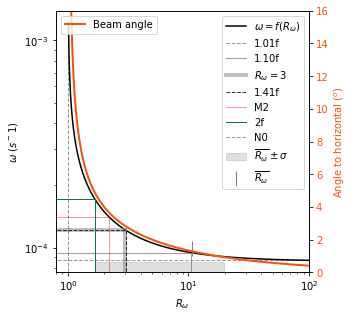

In [48]:
fig, axs = plt.subplots(1, 1,figsize=(5,4.5))
ax = axs
ax.plot(x,y,'k',label=r'$\omega = f(R_\omega)$')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$R_\omega$')
ax.set_ylabel(r'$\omega$ $(s^-1)$')

ax2 = ax.twinx()
ax2.plot(x,bbb,'-',color='#f5540a',lw=2,label='Beam angle')
ax2.set_xscale('log')
ax2.set_ylim(0,16)

ax2.set_ylabel('Angle to horizontal $(^o)$',color='#f5540a')
ax2.set_yticks(np.arange(0,16+1,2),color='#f5540a')
ax2.set_yticklabels(np.arange(0,16+1,2),color='#f5540a')

ax.plot([rw_101f,rw_101f],[0,f101],'--',label='1.01f',alpha=.4,lw=1,color='k')
ax.plot([0,rw_101f],[f101,f101],'--',alpha=.4,lw=1,color='k')

ax.plot([rw_110f,rw_110f],[0,f110],'-',label='1.10f',alpha=.8,lw=1,color='gray')
ax.plot([0,rw_110f],[f110,f110],'-',alpha=.8,lw=1,color='gray')


ax.plot([3,3],[0,w_Rw3],'-',label=r'$R_\omega=3$',alpha=.5,lw=4,color='gray')
ax.plot([0,3],[w_Rw3,w_Rw3],'-',alpha=.5,lw=4,color='gray')

ax.plot([rw_141f,rw_141f],[0,f141],'--',label='1.41f',alpha=.8,lw=1,color='k')
ax.plot([0,rw_141f],[f141,f141],'--',alpha=.8,lw=1,color='k')


ax.plot([rw_m2,rw_m2],[0,m2],'r',label='M2',alpha=.4,lw=1)
ax.plot([0,rw_m2],[m2,m2],'r',alpha=.4,lw=1)

ax.plot([rw_2f,rw_2f],[0,f2f],'-',label='2f',alpha=1,lw=1,color='#097a41')
ax.plot([0,rw_2f],[f2f,f2f],'-',alpha=1,lw=1,color='#097a41')

ax.plot([rw_n0,rw_n0],[0,1e-3],'k--',label='N0',alpha=.4,lw=1)


xax = np.array([rw_m2,rw_n0])
yax = np.array([m2,N0])

rwm = np.nanmean(R1[:,KM3])
rwstd = np.nanstd(R1[:,KM3])
rwmin = np.nanmin(R1[:,KM3])
rwmax = np.nanmax(R1[:,KM3])

rwm2 = np.nanmean(R2[:,KM3])
rwstd2 = np.nanstd(R2[:,KM3])
rwmin2 = np.nanmin(R2[:,KM3])
rwmax2 = np.nanmax(R2[:,KM3])


ax.axvspan(rwm-rwstd,rwm+rwstd, ymin=.0, ymax=.04, color='gray',alpha=.25,label=r'$\overline{R_\omega}\pm\sigma$')
ax.plot([rwm,rwm],[0,1e-4],'|',label=r'$\overline{R_\omega}$',color='gray',lw=4,markersize=15)


#ax.axvspan(rwm2-rwstd2,rwm2+rwstd2, ymin=.96, ymax=1, color='pink',alpha=.25,label='$\overline{Rw}\pm\sigma$')
#ax.plot([rwm2],1.2e-3,'|',label='$\overline{Rw}$',color='pink',markersize = 15)

bins = np.arange(0,100,1)
hist, edges = np.histogram(R1[:,KM3].ravel(), bins=bins, density=None)
bin_centers = (edges[:-1] + edges[1:]) /2

ax2.legend(loc=2)
ax.legend(loc=1)

#ax3 = ax.twinx()
#ax3.plot(bin_centers,hist)
#ax3.set_xscale('log')
#ax3.set_xlim(0,100)

ax.set_xlim(0,100)
ax2.set_xlim(0,100)

fig.tight_layout(pad=1)

fig_filename = 'fig_w_rw_beam'
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)




In [49]:
np.sum(hist*bin_centers)/np.sum(hist)

10.63096095663449

<ipython-input-50-c1a97a46ed9f>:23: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,2e-4)


RWs_WRWs_NOSAT


<ipython-input-50-c1a97a46ed9f>:54: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,2e-4)


RWs_WRWs_SAT


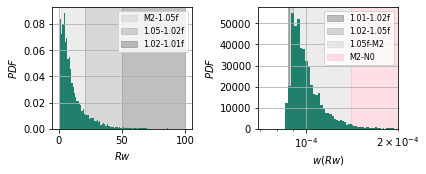

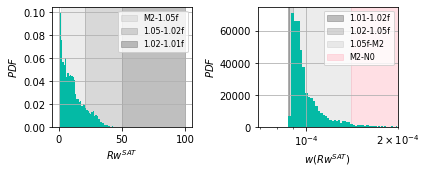

In [50]:
fig, axs = plt.subplots(1, 2,figsize=(6,2.5))
ax = axs[0]
ax.axvspan(rw_m2, rw_105f,ymin=0., ymax=1, color='gray', alpha=0.15,label='M2-1.05f')
ax.axvspan(rw_105f, rw_102f, ymin=0., ymax=1,color='gray', alpha=0.3,label='1.05-1.02f')
ax.axvspan(rw_102f, rw_101f,ymin=0., ymax=1, color='gray', alpha=0.5,label='1.02-1.01f')
ax.hist(R1.flatten(),bins=np.arange(0,100,1),density='True',color='#20806c',label='')
ax.grid()
ax.legend(fontsize=8)
ax.set_xlabel('$Rw$')
ax.set_ylabel('$PDF$')

ax = axs[1]
ax.axvspan(f101, f102,ymin=0., ymax=1, color='gray', alpha=0.5,label='1.01-1.02f')
ax.axvspan(f102, f105, ymin=0., ymax=1,color='gray', alpha=0.3,label='1.02-1.05f')
ax.axvspan(f105, m2,ymin=0., ymax=1, color='gray', alpha=0.15,label='1.05f-M2')
ax.axvspan(m2, N0,ymin=0., ymax=1, color='pink', alpha=0.5,label='M2-N0')
ax.hist(W1.flatten(),bins=np.arange(8.5e-5,3e-4,2e-6),density='True',color='#20806c',label='')
ax.set_xscale('log')
ax.grid()
ax.legend(fontsize=8)
ax.set_xlabel('$w(Rw)$')
ax.set_ylabel('$PDF$')
ax.set_xlim(0,2e-4)

fig.tight_layout(pad=1)
fig_filename = 'RWs_WRWs_NOSAT'
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)


fig, axs = plt.subplots(1, 2,figsize=(6,2.5))
ax = axs[0]
ax.axvspan(rw_m2, rw_105f,ymin=0., ymax=1, color='gray', alpha=0.15,label='M2-1.05f')
ax.axvspan(rw_105f, rw_102f, ymin=0., ymax=1,color='gray', alpha=0.3,label='1.05-1.02f')
ax.axvspan(rw_102f, rw_101f,ymin=0., ymax=1, color='gray', alpha=0.5,label='1.02-1.01f')
ax.hist(R2.flatten(),bins=np.arange(0,100,1),density='True',color='#04baa5',label='')
ax.grid()
ax.legend(fontsize=8)
ax.set_xlabel('$Rw^{SAT}$')
ax.set_ylabel('$PDF$')

ax = axs[1]
ax.axvspan(f101, f102,ymin=0., ymax=1, color='gray', alpha=0.5,label='1.01-1.02f')
ax.axvspan(f102, f105, ymin=0., ymax=1,color='gray', alpha=0.3,label='1.02-1.05f')
ax.axvspan(f105, m2,ymin=0., ymax=1, color='gray', alpha=0.15,label='1.05f-M2')
ax.axvspan(m2, N0,ymin=0., ymax=1, color='pink', alpha=0.5,label='M2-N0')
ax.hist(W2.flatten(),bins=np.arange(8.5e-5,3e-4,2e-6),density='True',color='#04baa5',label='')
ax.set_xscale('log')
ax.grid()
ax.legend(fontsize=8)
ax.set_xlabel('$w(Rw^{SAT})$')
ax.set_ylabel('$PDF$')
ax.set_xlim(0,2e-4)

fig.tight_layout(pad=1)
fig_filename = 'RWs_WRWs_SAT'
print(fig_filename)
#fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
#fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)



### Bins of 80m from bottom

biiiiined


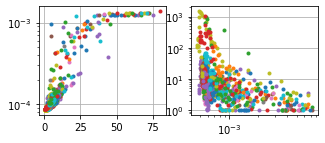

In [51]:
### BINS OF 80m
#
w = 80

Uerrb, Uerrbb, Zb, Bz  = matrice_maker_bins_from_bottom(Uerr,D,w)
VELb, VELbb, Zb, Bz  = matrice_maker_bins_from_bottom(np.sqrt(U**2+V**2),D,w)

LONb, LONbb, Zb, Bz  = matrice_maker_bins_from_bottom(LONX,D,w)
LATb, LATbb, Zb, Bz  = matrice_maker_bins_from_bottom(LATX,D,w)
Ib, Ibb, Zb, Bz  = matrice_maker_bins_from_bottom(IIII,D,w)
Db, Dbb, Zb, Bz  = matrice_maker_bins_from_bottom(D,D,w)
FCb, Dbb, Zb, Bz  = matrice_maker_bins_from_bottom(FCOR,D,w)

Ri10b, Ri10bb, Zb, Bz  = matrice_maker_bins_from_bottom(np.log10(RI),D,w)
shUV10b, shUV10bb, Zb, Bz  = matrice_maker_bins_from_bottom(np.log10(shUV),D,w)
N210b, N210bb, Zb, Bz  = matrice_maker_bins_from_bottom(np.log10(NN2),D,w)
N110b, N110bb, Zb, Bz  = matrice_maker_bins_from_bottom(np.log10(NN1),D,w)

Rib, Ribb, Zb, Bz  = matrice_maker_bins_from_bottom(RI,D,w)
shUVb, shUVbb, Zb, Bz  = matrice_maker_bins_from_bottom(shUV,D,w)
N2b, N2bb, Zb, Bz  = matrice_maker_bins_from_bottom(NN2,D,w)
N1b, N1bb, Zb, Bz  = matrice_maker_bins_from_bottom(NN1,D,w)
shUV1b, shUV1bb, Zb, Bz  = matrice_maker_bins_from_bottom(shUV1,D,w)


RSHCb, RSHCbb, Zb, Bz  = matrice_maker_bins_from_bottom(RSHC,D,w)

RSH1b, RSH1bb, Zb, Bz  = matrice_maker_bins_from_bottom(RSH1,D,w)
RST1b, RST1bb, Zb, Bz  = matrice_maker_bins_from_bottom(RST1,D,w)
K1b, K1bb, Zb, Bz  = matrice_maker_bins_from_bottom(K1,D,w)
E1b, E1bb, Zb, Bz  = matrice_maker_bins_from_bottom(E1,D,w)
K10b, K10bb, Zb, Bz  = matrice_maker_bins_from_bottom(np.log10(K1),D,w)
E10b, E10bb, Zb, Bz  = matrice_maker_bins_from_bottom(np.log10(E1),D,w)
R1b, R1bb, Zb, Bz  = matrice_maker_bins_from_bottom(R1,D,w)
B1b, B1bb, Zb, Bz  = matrice_maker_bins_from_bottom(B_w1,D,w)
W1b, W1bb, Zb, Bz  = matrice_maker_bins_from_bottom(W1,D,w)
B1bSLAMb, B1bbSLAMbb, Zb, Bz  = matrice_maker_bins_from_bottom(B_w1-SLAM,D,w)
B1bINFSb, B1bbINFSbb, Zb, Bz  = matrice_maker_bins_from_bottom(B_w1-INFS,D,w)

RSH2b, RSH2bb, Zb, Bz  = matrice_maker_bins_from_bottom(RSH2,D,w)
RST2b, RST2bb, Zb, Bz  = matrice_maker_bins_from_bottom(RST2,D,w)
K2b, K2bb, Zb, Bz  = matrice_maker_bins_from_bottom(K2,D,w)
E2b, E2bb, Zb, Bz  = matrice_maker_bins_from_bottom(E2,D,w)
K20b, K20bb, Zb, Bz  = matrice_maker_bins_from_bottom(np.log10(K2),D,w)
E20b, E02bb, Zb, Bz  = matrice_maker_bins_from_bottom(np.log10(E2),D,w)
R2b, R2bb, Zb, Bz  = matrice_maker_bins_from_bottom(R2,D,w)
B2b, B2bb, Zb, Bz  = matrice_maker_bins_from_bottom(B_w2,D,w)
W2b, W2bb, Zb, Bz  = matrice_maker_bins_from_bottom(W2,D,w)
B2bSLAMb, B2bbSLAMbb, Zb, Bz  = matrice_maker_bins_from_bottom(B_w2-SLAM,D,w)
B2bINFSb, B2bbINFSbb, Zb, Bz  = matrice_maker_bins_from_bottom(B_w2-INFS,D,w)

E3b, E3bb, Zb, Bz  = matrice_maker_bins_from_bottom(E3,D,w)
E4b, E4bb, Zb, Bz  = matrice_maker_bins_from_bottom(E4,D,w)

INFSb, INFSbb, Zb, Bz  = matrice_maker_bins_from_bottom(INFS,D,w)
INFRb, INFRbb, Zb, Bz  = matrice_maker_bins_from_bottom(INFR,D,w)
DTTBb, DTTBbb, Zb, Bz  = matrice_maker_bins_from_bottom(DTTB,D,w)
BTTDb, BTTDbb, Zb, Bz  = matrice_maker_bins_from_bottom(BTTD,D,w)
SLAMb, SLAMbb, Zb, Bz  = matrice_maker_bins_from_bottom(SLAM,D,w)
RO10b, RO10bb, Zb, Bz  = matrice_maker_bins_from_bottom(RO10,D,w)


Bb, Bbb, Zb, Bz  = matrice_maker_bins_from_bottom(B_wx,D,w)
Ab, Abb, Zb, Bz  = matrice_maker_bins_from_bottom(A_wx,D,w)
BbSLAMb, BbSLAMbb, Zb, Bz  = matrice_maker_bins_from_bottom(B_wx-SLAM,D,w)
BbINFSb, BbbINFSbb, Zb, Bz  = matrice_maker_bins_from_bottom(B_wx-INFS,D,w)


TUXb, TUXbb, Zb, Bz  = matrice_maker_bins_from_bottom(TUX,D,w)
RRb, RRbb, Zb, Bz  = matrice_maker_bins_from_bottom(RR,D,w)
KP_DC_m_b, KP_DC_m_bb, Zb, Bz  = matrice_maker_bins_from_bottom(KP_DC_m,D,w)
KP_SF_m_b, KP_SF_m_bb, Zb, Bz  = matrice_maker_bins_from_bottom(KP_SF_m,D,w)


print('biiiiined')


fig , axs =  plt.subplots(1, 2, figsize=(5,2))
ax = axs[0]
ax.plot(B1b,W1b,'.')
ax.grid()
#ax.set_xscale('log')
ax.set_yscale('log')

ax = axs[1]
ax.plot(N1b,R1b,'.')
ax.grid()
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim(5e-4,1e-3)

### Check DD

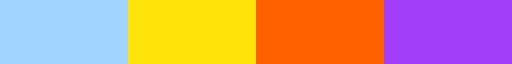

In [81]:
turner_cmap

In [83]:
TUXb.shape

(60, 63)

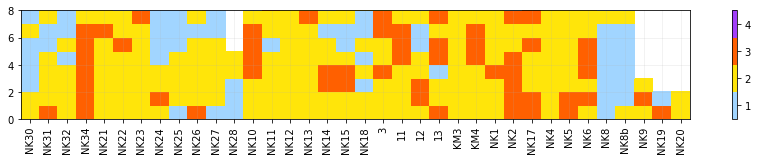

In [53]:
fig , axs =  plt.subplots(1, 1, figsize=(15,2))
ax = axs
c = ax.pcolor((TUXb[:,KM3]),cmap=turner_cmap,vmin=0.5,vmax=4.5)
fig.colorbar(c,label='')
ax.set_ylim(0,8)
ax.set_xticks(np.arange(0,len(KM3))+.5)
ax.set_xticklabels(sta[KM3],rotation=90)
ax.grid(alpha=.2)

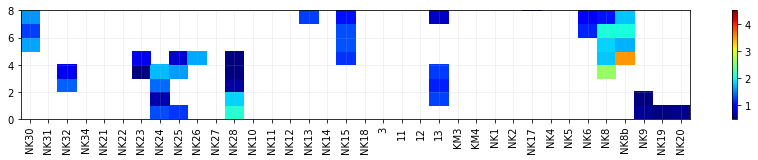

In [54]:
fig , axs =  plt.subplots(1, 1, figsize=(15,2))
ax = axs
c = ax.pcolor((RRb[:,KM3]),cmap='jet',vmin=0.5,vmax=4.5)
fig.colorbar(c,label='')
ax.set_ylim(0,8)
ax.set_xticks(np.arange(0,len(KM3))+.5)
ax.set_xticklabels(sta[KM3],rotation=90)
ax.grid(alpha=.2)

In [55]:
MASK_RRb = np.ones((RRb.shape))
fRR = np.where(np.isfinite(RRb)==True)[0]
MASK_RRb[fRR] = np.nan

In [56]:
MASK_RRb = np.ones(RRb.shape)           # matrice de 1 de même taille que RRb
idx = np.where(np.isfinite(RRb))       # retourne un tuple (lignes, colonnes)
MASK_RRb[idx] = np.nan  

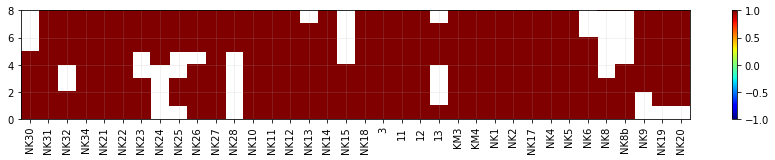

In [57]:
fig , axs =  plt.subplots(1, 1, figsize=(15,2))
ax = axs
c = ax.pcolor((MASK_RRb[:,KM3]),cmap='jet',vmin=-1,vmax=1)
fig.colorbar(c,label='')
ax.set_ylim(0,8)
ax.set_xticks(np.arange(0,len(KM3))+.5)
ax.set_xticklabels(sta[KM3],rotation=90)
ax.grid(alpha=.2)

In [74]:
for i in range(0,len(KM3)):
    i
#for i in range(0,1):
#    i  
    ii = KM3[i]
    f = np.where(np.isfinite(D[:,ii])==True)[0]
    if len(f)>1000:
        f1000 = f[-1000:]
        fig , axs =  plt.subplots(1, 1, figsize=(10,8))
        ax = axs
        #ax.plot(D[f1000,ii],SIG0[f1000,ii])
        ax.plot(D[f1000,ii],SIG0[f1000,ii]*TU1[f1000,ii],color=turner_cmap(0),label='SF')
        ax.plot(D[f1000,ii],SIG0[f1000,ii]*TU3[f1000,ii],color=turner_cmap(1),label='DC')
        ax.legend()
        ax2 = ax.twinx()
        ax2.plot(D[f1000,ii],RR[f1000,ii]*TU1[f1000,ii],color=turner_cmap(0))
        ax2.plot(D[f1000,ii],RR[f1000,ii]*TU3[f1000,ii],color=turner_cmap(1))
        
        ax3 = ax.twinx()
        ax3.plot(D[f1000,ii],R1[f1000,ii],'.',color='green')
        
    ax.set_title('Station '+sta[KM3[i]],loc='left',fontsize=20)
    ax.set_xlabel('Depth $(m)$')
    ax.set_ylabel('Sigma0 $(kg \ m^{-3})$')
    ax2.set_ylabel('Rp')
    ax3.set_ylabel('Rw')
    
    fig.tight_layout(pad=1)
    fig_filename = str(i)+'_station_'+sta[KM3[i]]+'_DD_check'
    print(fig_filename)
    fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/dd/'+fig_filename + '.png',dpi=600)
    plt.close(fig)



0_station_NK30_DD_check
1_station_NK31_DD_check
2_station_NK32_DD_check
3_station_NK34_DD_check
4_station_NK28_DD_check
5_station_NK27_DD_check
6_station_NK26_DD_check
7_station_NK25_DD_check
8_station_NK24_DD_check
9_station_NK23_DD_check
10_station_NK22_DD_check
11_station_NK21_DD_check
12_station_NK18_DD_check
13_station_NK15_DD_check
14_station_NK14_DD_check
15_station_NK13_DD_check
16_station_NK12_DD_check
17_station_NK11_DD_check
18_station_NK10_DD_check
19_station_NK19_DD_check
20_station_NK20_DD_check
21_station_NK9_DD_check
22_station_NK8_DD_check
23_station_NK8b_DD_check
24_station_NK6_DD_check
25_station_NK5_DD_check
26_station_NK4_DD_check
27_station_NK2_DD_check
28_station_NK1_DD_check
29_station_KM3_DD_check
30_station_KM4_DD_check
31_station_11_DD_check
32_station_3_DD_check
33_station_NK17_DD_check
34_station_12_DD_check
35_station_13_DD_check


(0.0, 5.0)

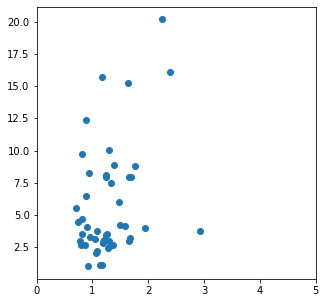

In [59]:

I = KM3
b1 = 4
b2 = 12

b11 = 0
b22 = 59

bb = np.arange(b1,b2+1,1)
bb1 = np.arange(b11,b22+1,1)

y = R1b[np.ix_(bb, I)].ravel()
x = RRb[np.ix_(bb, I)].ravel()

fig , axs =  plt.subplots(1, 1, figsize=(5,5))
ax = axs
ax.plot(x,y,'o')
ax.set_xlim(0,5)

In [ ]:
expo

(array([0., 0., 1., 1., 1., 0., 0., 5., 6., 4., 6., 5., 7., 5., 1., 2., 6.,
        3., 1., 1., 2., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
 <BarContainer object of 49 artists>)

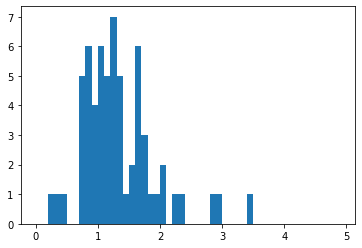

In [60]:
plt.hist( RRb[np.ix_(bb, I)].ravel(),bins=np.arange(0,5,.1))

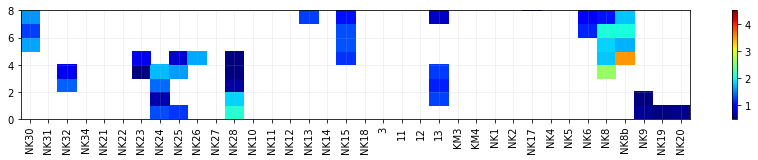

In [61]:
fig , axs =  plt.subplots(1, 1, figsize=(15,2))
ax = axs
c = ax.pcolor((RRb[:,KM3]),cmap='jet',vmin=0.5,vmax=4.5)
fig.colorbar(c,label='')
ax.set_ylim(0,8)
ax.set_xticks(np.arange(0,len(KM3))+.5)
ax.set_xticklabels(sta[KM3],rotation=90)
ax.grid(alpha=.2)

### Other checks of the 80m-bins

In [126]:
len(KM3)

36

In [147]:
I = KM3
b1 = 4
b2 = 12
bb = np.arange(b1,b2)

rw1b = np.nanmean(R1b[np.ix_(bb,I)])
rw2b = np.nanmean(R2b[np.ix_(bb,I)])
rw11b = np.nanmedian(R1b[np.ix_(bb,I)])
rw22b = np.nanmedian(R2b[np.ix_(bb,I)])
print(rw1b,rw2b)


w_rw1b   = rw_to_omega(fcorm,rw1b)
w_rw11b   = rw_to_omega(fcorm,rw11b)
w_rw2b   = rw_to_omega(fcorm,rw2b)
w_rw22b   = rw_to_omega(fcorm,rw22b)
print(w_rw11b/fcorm)
print(w_rw22b/fcorm)

np.nanmean([w_rw1b/fcorm,w_rw2b/fcorm])

12.091236096443216 15.755921055019712


NameError: name 'fcorm' is not defined

(0.0, 20.0)

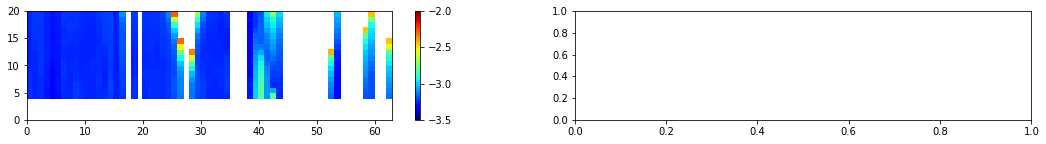

In [114]:
fig , axs =  plt.subplots(1, 2, figsize=(18,2))
ax = axs[0]
c = ax.pcolor(np.log10(N1b),cmap='jet',vmin=-3.5,vmax=-2)
fig.colorbar(c,label='')
ax.set_ylim(0,20)


In [63]:
N1b[4,:]

array([0.00057736, 0.00055521, 0.00056038, 0.00051427, 0.00048531,
       0.0005123 , 0.00055669, 0.00055279, 0.00058916, 0.000569  ,
       0.00054864, 0.00055143, 0.00055437, 0.00057164, 0.00060237,
       0.00054088, 0.00057374,        nan, 0.00057227,        nan,
       0.00054778, 0.00057017, 0.00056929, 0.00056055, 0.00058316,
       0.00063198, 0.00073136,        nan, 0.00072374, 0.0006185 ,
       0.00058824, 0.00055167, 0.00055708, 0.00054749, 0.00056159,
              nan,        nan,        nan, 0.0005209 , 0.00099239,
       0.00148378, 0.00082055, 0.00157025, 0.00055981,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan, 0.00070085, 0.00050186,        nan,
              nan,        nan,        nan, 0.00064881, 0.00062517,
              nan,        nan, 0.00072533])

In [67]:
1e-3*SLOPM_gebco

array([0.00555789, 0.00872677, 0.00402362, 0.00117184, 0.0537614 ,
       0.04036851, 0.0050547 , 0.00553249, 0.00581988, 0.00292349,
       0.00301405, 0.00428501, 0.01742796, 0.01493213, 0.02945583,
       0.01527435, 0.09987259, 0.02030702, 0.0049588 , 0.03856128,
       0.0138738 , 0.01765985, 0.0223444 , 0.00910479, 0.01355036,
       0.01068545, 0.04322619, 0.06536952, 0.03125081, 0.01507673,
       0.01365836, 0.02606397, 0.00635847, 0.00505407, 0.05486294,
       0.07852331, 0.07852331, 0.05637912, 0.00117184, 0.00555789,
       0.0050547 , 0.0045349 , 0.01337742, 0.01355036, 0.02143968,
       0.02731502, 0.02132212, 0.0199121 , 0.01876242, 0.01401023,
       0.0180038 , 0.03331852, 0.03224528, 0.01982887, 0.03315123,
       0.03244523, 0.02572955, 0.0186697 , 0.01734969, 0.02188374,
       0.03823958, 0.03231978, 0.03687731])

In [88]:
w2-f2

2.501045788186151e-08

In [92]:
np.sqrt((w2-f2)*(n2-w2))

array([8.67564921e-08, 8.30627000e-08, 8.39258303e-08, 7.61863349e-08,
       7.12752853e-08, 7.58524500e-08, 8.33097567e-08, 8.26574563e-08,
       8.87186096e-08, 8.53644902e-08, 8.19637232e-08, 8.24296931e-08,
       8.29219604e-08, 8.58039286e-08, 9.09103365e-08, 8.06624015e-08,
       8.61539759e-08,            nan, 8.59098873e-08,            nan,
       8.18197838e-08, 8.55600566e-08, 8.54128414e-08, 8.39545601e-08,
       8.77215344e-08, 9.58069062e-08, 1.12105197e-07,            nan,
       1.10860397e-07, 9.35793890e-08, 8.85652932e-08, 8.24707154e-08,
       8.33741473e-08, 8.17708200e-08, 8.41278939e-08,            nan,
                  nan,            nan, 7.73048986e-08, 1.54340294e-07,
       2.32921738e-07, 1.26607266e-07, 2.46693083e-07, 8.38314104e-08,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
       1.07119980e-07, 7.40871553e-08,            nan,            nan,
      

In [93]:
SLOPM_gebco

array([ 5.55788909,  8.72676732,  4.02362447,  1.17183582, 53.76140153,
       40.36850672,  5.05470144,  5.53249341,  5.81987839,  2.92348931,
        3.01405154,  4.28501271, 17.42795927, 14.93212959, 29.45582829,
       15.27434646, 99.87259156, 20.30702294,  4.95880306, 38.56127503,
       13.87379656, 17.65984818, 22.3443975 ,  9.104792  , 13.55036007,
       10.68545142, 43.22618949, 65.36951987, 31.25080698, 15.07672833,
       13.6583615 , 26.06396929,  6.35847155,  5.05407457, 54.86293637,
       78.52331219, 78.52331219, 56.37912244,  1.17183582,  5.55788909,
        5.05470144,  4.53490289, 13.37742092, 13.55036007, 21.43968491,
       27.31501881, 21.3221195 , 19.91209869, 18.7624178 , 14.01023291,
       18.00379857, 33.31852316, 32.24527521, 19.82886547, 33.15122649,
       32.44523162, 25.72955294, 18.66969524, 17.34969274, 21.88374156,
       38.23958412, 32.31978431, 36.87730862])

In [176]:
w2 = (2*9e-5)**2
f2 = fcor**2
n2 = N1b[4,:]**2
np.sqrt((w2-f2)*(n2-w2))
#1e-6*SLOPM_gebco/np.sqrt((w2-f2)*(n2-w2))

array([8.84797419e-08, 8.26168549e-08, 8.10595758e-08, 7.79027549e-08,
       6.96636155e-08, 7.83318821e-08, 8.19577116e-08, 8.42463862e-08,
       9.22385247e-08, 8.57678406e-08, 8.35624337e-08, 8.02170105e-08,
       8.40848096e-08, 8.23854150e-08, 9.52202130e-08, 8.38441701e-08,
       8.48105823e-08,            nan, 8.82646328e-08,            nan,
       8.40025404e-08, 8.59592891e-08, 8.64203013e-08, 8.53181611e-08,
       8.86670311e-08, 1.00194307e-07, 1.19152832e-07,            nan,
       1.11791543e-07, 9.85768725e-08, 9.19781516e-08, 8.27957936e-08,
       8.31943998e-08, 8.24544955e-08, 8.14568771e-08, 1.08308219e-07,
       1.06705439e-07,            nan, 8.36591327e-08, 1.65976119e-07,
       2.37937258e-07, 1.33033691e-07, 8.79634193e-08, 7.95760253e-08,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
       9.67669149e-08, 7.12288475e-08,            nan,            nan,
      

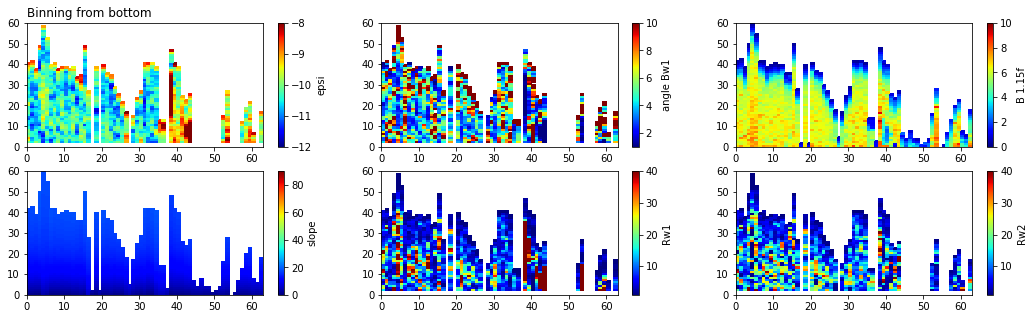

In [177]:
fig , axs =  plt.subplots(2, 3, figsize=(18,5))
ax = axs[0,0]
c = ax.pcolor(np.log10(E1b),cmap='jet',vmin=-12,vmax=-8)
fig.colorbar(c,label='epsi')
ax.set_title('Binning from bottom',loc='left')

ax = axs[0,1]
c = ax.pcolor(B1b,cmap='jet',vmin=1,vmax=10)
fig.colorbar(c,label='angle Bw1')

ax = axs[0,2]
c = ax.pcolor(Bb,cmap='jet',vmin=0,vmax=10)
fig.colorbar(c,label='B 1.15f')

ax = axs[1,0]
c = ax.pcolor(INFSb,cmap='jet',vmin=0,vmax=90)
fig.colorbar(c,label='slope')

ax = axs[1,1]
c = ax.pcolor(R1b,cmap='jet',vmin=1,vmax=40)
fig.colorbar(c,label='Rw1')

ax = axs[1,2]
c = ax.pcolor(R2b,cmap='jet',vmin=1,vmax=40)
fig.colorbar(c,label='Rw2')

(0.0, 20.0)

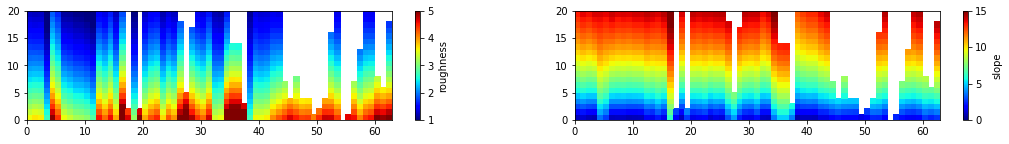

In [178]:
fig , axs =  plt.subplots(1, 2, figsize=(18,2))
ax = axs[0]
c = ax.pcolor(INFRb,cmap='jet',vmin=1,vmax=5)
fig.colorbar(c,label='roughness')
ax.set_ylim(0,20)

ax = axs[1]
c = ax.pcolor(INFSb,cmap='jet',vmin=0,vmax=15)
fig.colorbar(c,label='slope')
ax.set_ylim(0,20)

(0.0, 20.0)

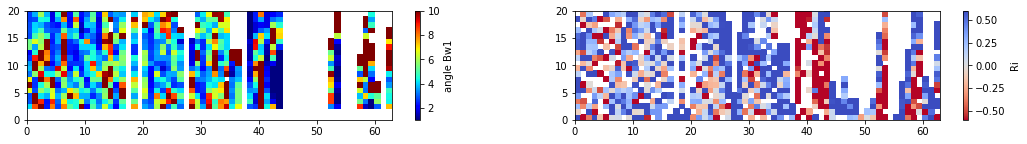

In [179]:
fig , axs =  plt.subplots(1, 2, figsize=(18,2))
ax = axs[0]
c = ax.pcolor(B1b,cmap='jet',vmin=1,vmax=10)
fig.colorbar(c,label='angle Bw1')
ax.set_ylim(0,20)

ax = axs[1]
c = ax.pcolor(np.log10(Rib),cmap='coolwarm_r',vmin=-.6,vmax=.6)
fig.colorbar(c,label='Ri')
ax.set_ylim(0,20)

(0.0, 20.0)

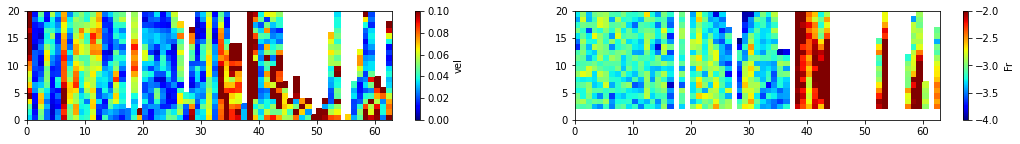

In [180]:
fig , axs =  plt.subplots(1, 2, figsize=(18,2))
ax = axs[0]
c = ax.pcolor(VELb,cmap='jet',vmin=0,vmax=.1)
fig.colorbar(c,label='vel')
ax.set_ylim(0,20)

ax = axs[1]
c = ax.pcolor(np.log10(shUVb/N1b),cmap='jet',vmin=-4,vmax=-2)
fig.colorbar(c,label='Fr')
ax.set_ylim(0,20)

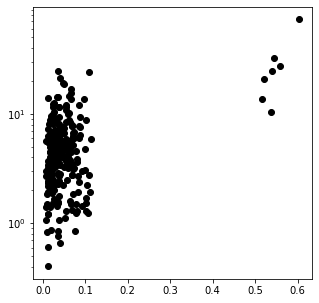

In [181]:
x = Uerrb[np.ix_(np.arange(0,8+1),np.arange(0,38+1))]
z = VELb[np.ix_(np.arange(0,8+1),np.arange(0,38+1))]

y = RSH1b[np.ix_(np.arange(0,8+1),np.arange(0,38+1))]
#y = R1b[np.ix_(np.arange(0,8+1),np.arange(0,38+1))]

fig , axs =  plt.subplots(1, 1, figsize=(5,5))

ax = axs
c = ax.plot(z,y,'ko')
ax.set_yscale('log')
#ax.set_xscale('log')

#ax.set_ylim(0,20)
#ax.set_xlim(0,.1)

### RESULTS: Bottom analysis

<ipython-input-62-dd31b6f82efc>:30: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,2e-4)


RWb_WRWb_NOSAT


<ipython-input-62-dd31b6f82efc>:65: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0,2e-4)


RWb_WRWb_SAT


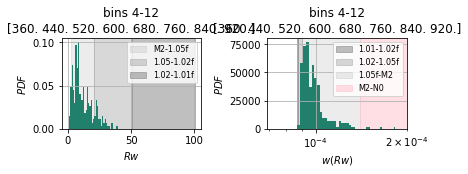

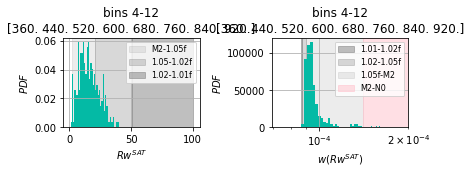

In [62]:
I = KM3
b1 = 4
b2 = 12
bb = np.arange(b1,b2+1,1)

fig, axs = plt.subplots(1, 2,figsize=(6,2.5))
ax = axs[0]
ax.axvspan(rw_m2, rw_105f,ymin=0., ymax=1, color='gray', alpha=0.15,label='M2-1.05f')
ax.axvspan(rw_105f, rw_102f, ymin=0., ymax=1,color='gray', alpha=0.3,label='1.05-1.02f')
ax.axvspan(rw_102f, rw_101f,ymin=0., ymax=1, color='gray', alpha=0.5,label='1.02-1.01f')
ax.hist(R1b[np.ix_(bb,I)].ravel(),bins=np.arange(0,100,1),density='True',color='#20806c',label='')
ax.grid()
ax.legend(fontsize=8)
ax.set_xlabel('$Rw$')
ax.set_ylabel('$PDF$')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))


ax = axs[1]
ax.axvspan(f101, f102,ymin=0., ymax=1, color='gray', alpha=0.5,label='1.01-1.02f')
ax.axvspan(f102, f105, ymin=0., ymax=1,color='gray', alpha=0.3,label='1.02-1.05f')
ax.axvspan(f105, m2,ymin=0., ymax=1, color='gray', alpha=0.15,label='1.05f-M2')
ax.axvspan(m2, N0,ymin=0., ymax=1, color='pink', alpha=0.5,label='M2-N0')
ax.hist(W1b[np.ix_(bb,I)].ravel(),bins=np.arange(8.5e-5,3e-4,2e-6),density='True',color='#20806c',label='')
ax.set_xscale('log')
ax.grid()
ax.legend(fontsize=8)
ax.set_xlabel('$w(Rw)$')
ax.set_ylabel('$PDF$')
ax.set_xlim(0,2e-4)
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))


fig.tight_layout(pad=1)
fig_filename = 'RWb_WRWb_NOSAT'
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)


fig, axs = plt.subplots(1, 2,figsize=(6,2.5))
ax = axs[0]
ax.axvspan(rw_m2, rw_105f,ymin=0., ymax=1, color='gray', alpha=0.15,label='M2-1.05f')
ax.axvspan(rw_105f, rw_102f, ymin=0., ymax=1,color='gray', alpha=0.3,label='1.05-1.02f')
ax.axvspan(rw_102f, rw_101f,ymin=0., ymax=1, color='gray', alpha=0.5,label='1.02-1.01f')
ax.hist(R2b[np.ix_(bb,I)].ravel(),bins=np.arange(0,100,1),density='True',color='#04baa5',label='')
ax.grid()
ax.legend(fontsize=8)
ax.set_xlabel('$Rw^{SAT}$')
ax.set_ylabel('$PDF$')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))


ax = axs[1]
ax.axvspan(f101, f102,ymin=0., ymax=1, color='gray', alpha=0.5,label='1.01-1.02f')
ax.axvspan(f102, f105, ymin=0., ymax=1,color='gray', alpha=0.3,label='1.02-1.05f')
ax.axvspan(f105, m2,ymin=0., ymax=1, color='gray', alpha=0.15,label='1.05f-M2')
ax.axvspan(m2, N0,ymin=0., ymax=1, color='pink', alpha=0.5,label='M2-N0')
ax.hist(W2b[np.ix_(bb,I)].ravel(),bins=np.arange(8.5e-5,3e-4,2e-6),density='True',color='#04baa5',label='')
ax.set_xscale('log')
ax.grid()
ax.legend(fontsize=8)
ax.set_xlabel('$w(Rw^{SAT})$')
ax.set_ylabel('$PDF$')
ax.set_xlim(0,2e-4)
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))

fig.tight_layout(pad=1)
fig_filename = 'RWb_WRWb_SAT'
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)



scatter_RW_ROUGH_SLOPE


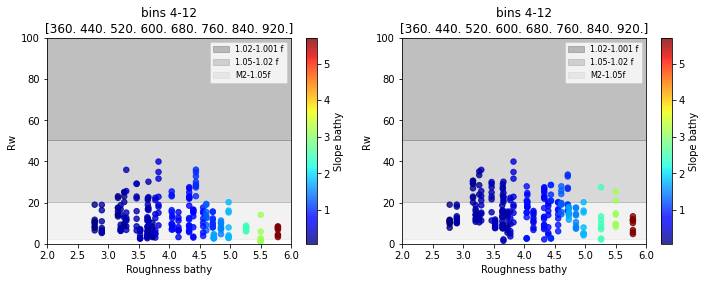

In [63]:
I = KM3
#I = GRR
xstr = 'Roughness bathy'
ystr = 'Rw'
cstr = 'Slope bathy'
#
fig , axs =  plt.subplots(1, 2, figsize=(10,4))
b1 = 4
b2 = 12

ax = axs[0]
ax.axhspan(rw_102f, rw_1001f, color='gray', alpha=0.5,label='1.02-1.001 f')
ax.axhspan(rw_105f, rw_102f, color='gray', alpha=0.3,label='1.05-1.02 f')
ax.axhspan(rw_m2, rw_105f, color='gray', alpha=0.1,label='M2-1.05f')
ax.legend(fontsize=8)
for b in range(b1,b2):
    c = ax.scatter(ROGH10_gebco[I], (R1b[b,I]), c=(SLAPM_gebco[I]), cmap='jet', s=30, alpha=0.8)
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(2,6)
ax.set_ylim(0,100)
#ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))

ax = axs[1]
ax.axhspan(rw_102f, rw_1001f, color='gray', alpha=0.5,label='1.02-1.001 f')
ax.axhspan(rw_105f, rw_102f, color='gray', alpha=0.3,label='1.05-1.02 f')
ax.axhspan(rw_m2, rw_105f, color='gray', alpha=0.1,label='M2-1.05f')
ax.legend(fontsize=8)
for b in range(b1,b2):
    c = ax.scatter(ROGH10_gebco[I], (R2b[b,I]), c=(SLAPM_gebco[I]), cmap='jet', s=30, alpha=0.8)
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(2,6)
ax.set_ylim(0,100)
#ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))

fig.tight_layout(pad=1)

fig_filename = 'scatter_RW_ROUGH_SLOPE'
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)


scatter_RW_SLOPE_ROUGH


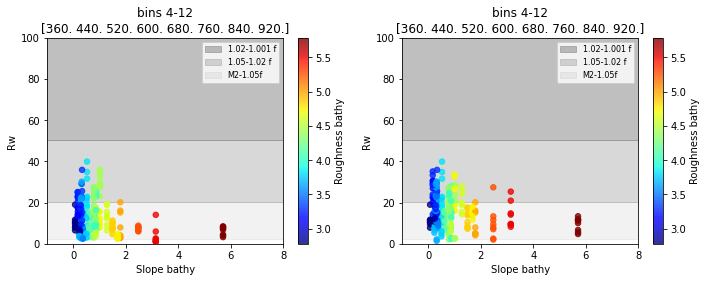

In [64]:
I = KM3
#I = GRR
ystr = 'Rw'
xstr = 'Slope bathy'
cstr = 'Roughness bathy'

#
fig , axs =  plt.subplots(1, 2, figsize=(10,4))
b1 = 4
b2 = 12

ax = axs[0]
ax.axhspan(rw_102f, rw_1001f, color='gray', alpha=0.5,label='1.02-1.001 f')
ax.axhspan(rw_105f, rw_102f, color='gray', alpha=0.3,label='1.05-1.02 f')
ax.axhspan(rw_m2, rw_105f, color='gray', alpha=0.1,label='M2-1.05f')
ax.legend(fontsize=8)
for b in range(b1,b2):
    c = ax.scatter(SLAPM_gebco[I], (R1b[b,I]), c=(ROGH10_gebco[I]), cmap='jet', s=30, alpha=0.8)
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-1,8)
ax.set_ylim(0,100)
#ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))

ax = axs[1]
ax.axhspan(rw_102f, rw_1001f, color='gray', alpha=0.5,label='1.02-1.001 f')
ax.axhspan(rw_105f, rw_102f, color='gray', alpha=0.3,label='1.05-1.02 f')
ax.axhspan(rw_m2, rw_105f, color='gray', alpha=0.1,label='M2-1.05f')
ax.legend(fontsize=8)
for b in range(b1,b2):
    c = ax.scatter(SLAPM_gebco[I], (R2b[b,I]), c=(ROGH10_gebco[I]), cmap='jet', s=30, alpha=0.8)
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-1,8)
ax.set_ylim(0,100)
#ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))

fig.tight_layout(pad=1)

fig_filename = 'scatter_RW_SLOPE_ROUGH'
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)


### Figures BINS

fig_scatter_xyz=_RW_SLOPE_ROUGH


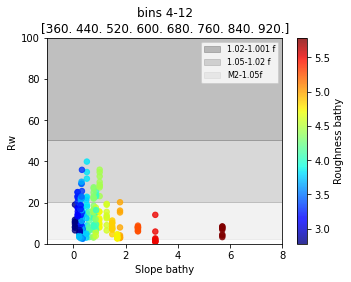

In [151]:
I = KM3
#I = GRR
ystr = 'Rw'
xstr = 'Slope bathy'
cstr = 'Roughness bathy'

#
fig , axs =  plt.subplots(1, 1, figsize=(5,4))
b1 = 4
b2 = 12

ax = axs
ax.axhspan(rw_102f, rw_1001f, color='gray', alpha=0.5,label='1.02-1.001 f')
ax.axhspan(rw_105f, rw_102f, color='gray', alpha=0.3,label='1.05-1.02 f')
ax.axhspan(rw_m2, rw_105f, color='gray', alpha=0.1,label='M2-1.05f')
ax.legend(fontsize=8)
for b in range(b1,b2):
    c = ax.scatter(SLAPM_gebco[I], (R1b[b,I]), c=(ROGH10_gebco[I]), cmap='jet', s=30, alpha=0.8)
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-1,8)
ax.set_ylim(0,100)
#ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))



fig.tight_layout(pad=1)

fig_filename = 'fig_scatter_xyz=_RW_SLOPE_ROUGH'
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)


In [154]:
len(KM3)

36

fig_scatter_xyz=LAT_LON_ROUGH


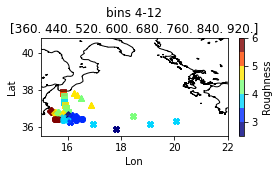

In [156]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12

xstr = 'Lon'
ystr = 'Lat'
cstr = 'Roughness'
#

fig , axs =  plt.subplots(1, 1, figsize=(4,2.5))
cmap= plt.cm.get_cmap('spring_r',7)
cmap= plt.cm.get_cmap('jet',7)

ax = axs
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(LONb[b,I[i]], (LATb[b,I[i]]), c=(ROGH10_gebco[I[i]]), 
            cmap=cmap, vmin=2.5,vmax=6,s=30, alpha=0.8,marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.plot(ITcoast['lonIT'],ITcoast['latIT'],'k-',lw=1)
ax.set_xlim(15,22)
ax.set_ylim(35.5,38.5)

ax.set_ylim(35.5,40.8)
#ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))



fig.tight_layout(pad=1)

fig_filename = 'fig_scatter_xyz=LAT_LON_ROUGH'
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)


In [1420]:
sta[26]

'NK27'

In [680]:
I[i]

2

scatter_RW_SLOPE_ROUGH_MARKERS


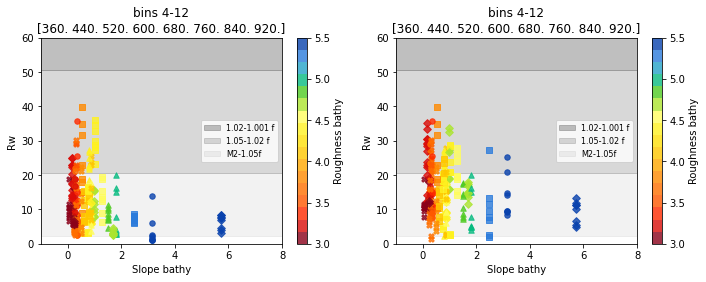

In [76]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12

xstr = 'Slope bathy'
ystr = 'Rw'
cstr = 'Roughness bathy'
#
cmap = mycmap22

fig , axs =  plt.subplots(1, 2, figsize=(10,4))
ax = axs[0]
ax.axhspan(rw_102f, rw_1001f, color='gray', alpha=0.5,label='1.02-1.001 f')
ax.axhspan(rw_105f, rw_102f, color='gray', alpha=0.3,label='1.05-1.02 f')
ax.axhspan(rw_m2, rw_105f, color='gray', alpha=0.1,label='M2-1.05f')
ax.legend(fontsize=8)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(SLAPM_gebco[I[i]], (R1b[b,I[i]]), c=(ROGH10_gebco[I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=3,vmax=5.5, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-1,8)
ax.set_ylim(0,60)
#ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))

ax = axs[1]
ax.axhspan(rw_102f, rw_1001f, color='gray', alpha=0.5,label='1.02-1.001 f')
ax.axhspan(rw_105f, rw_102f, color='gray', alpha=0.3,label='1.05-1.02 f')
ax.axhspan(rw_m2, rw_105f, color='gray', alpha=0.1,label='M2-1.05f')
ax.legend(fontsize=8)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(SLAPM_gebco[I[i]], (R2b[b,I[i]]), c=(ROGH10_gebco[I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=3,vmax=5.5, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-1,8)
ax.set_ylim(0,60)
#ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))

fig.tight_layout(pad=1)

fig_filename = 'scatter_RW_SLOPE_ROUGH_MARKERS'
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)


In [462]:
MASK_RRb

array([[ 1.,  1.,  1., ..., nan,  1., nan],
       [ 1.,  1., nan, ..., nan,  1.,  1.],
       [ 1.,  1., nan, ..., nan,  1., nan],
       ...,
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

fig_scatter_xyz=_RW_SLOPE_ROUGH


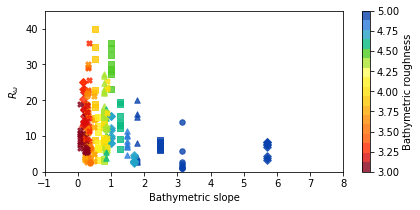

In [98]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12

xstr = 'Bathymetric slope'
ystr = r'$R_\omega$'
cstr = 'Bathymetric roughness'
#
cmap = mycmap22

fig , axs =  plt.subplots(1, 1, figsize=(6,3))
ax = axs
#ax.axhspan(rw_102f, rw_1001f, color='gray', alpha=0.5,label='1.02-1.001 f')
#ax.axhspan(rw_105f, rw_102f, color='gray', alpha=0.3,label='1.05-1.02 f')
#ax.axhspan(rw_m2, rw_105f, color='gray', alpha=0.1,label='M2-1.05f')
#ax.legend(fontsize=8)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(SLAPM_gebco[I[i]], (R1b[b,I[i]]), c=(ROGH10_gebco[I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=3,vmax=5, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-1,8)
ax.set_ylim(0,45)
#ax.set_yscale('log')

#ax.set_title('bins '+str(b1)+'-'+str(b2)+' '+str(Bz[b1:b2,1])+'m from bott.',fontsize=10)

fig.tight_layout(pad=1)
fig_filename = 'fig_scatter_xyz=_RW_SLOPE_ROUGH'
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)

fig_scatter_xyz=_w_SLOPE_ROUGH


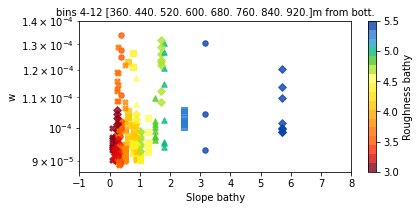

In [261]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12

xstr = 'Slope bathy'
ystr = 'w'
cstr = 'Roughness bathy'
#
cmap = mycmap22

fig , axs =  plt.subplots(1, 1, figsize=(6,3))
ax = axs
#ax.axhspan(rw_102f, rw_1001f, color='gray', alpha=0.5,label='1.02-1.001 f')
#ax.axhspan(rw_105f, rw_102f, color='gray', alpha=0.3,label='1.05-1.02 f')
#ax.axhspan(rw_m2, rw_105f, color='gray', alpha=0.1,label='M2-1.05f')
#ax.legend(fontsize=8)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(SLAPM_gebco[I[i]], (W1b[b,I[i]]), c=(ROGH10_gebco[I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=3,vmax=5.5, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-1,8)
ax.set_ylim(8.7e-5,1.4e-4)
ax.set_yscale('log')
#ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+' '+str(Bz[b1:b2,1])+'m from bott.',fontsize=10)

fig.tight_layout(pad=1)
fig_filename = 'fig_scatter_xyz=_w_SLOPE_ROUGH'
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)

scatter_Rw_roughness_velocity


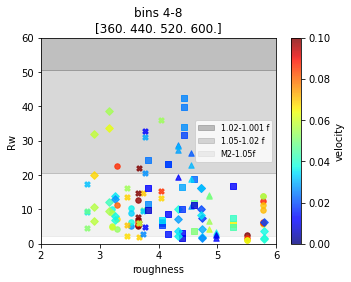

In [187]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 8


xstr = 'roughness'
ystr = 'Rw'
cstr = 'velocity'

#

fig , axs =  plt.subplots(1, 1, figsize=(5,4))
ax = axs
ax.axhspan(rw_102f, rw_1001f, color='gray', alpha=0.5,label='1.02-1.001 f')
ax.axhspan(rw_105f, rw_102f, color='gray', alpha=0.3,label='1.05-1.02 f')
ax.axhspan(rw_m2, rw_105f, color='gray', alpha=0.1,label='M2-1.05f')
ax.legend(fontsize=8)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(ROGH10_gebco[I[i]], (R1b[b,I[i]]), c=(VELb[b,I[i]]), 
            cmap='jet', s=30, alpha=0.8,vmin=0,vmax=.1, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(2,6)
ax.set_ylim(0,60)
#ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))


fig.tight_layout(pad=1)

fig_filename = 'scatter_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)


scatter_velocity_roughness_roughness


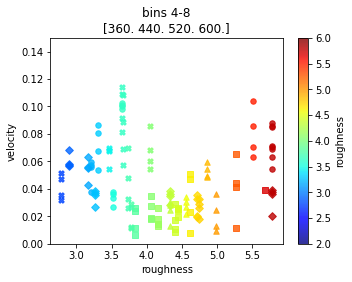

In [188]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 8


xstr = 'roughness'
ystr = 'velocity'
cstr = 'roughness'

#

fig , axs =  plt.subplots(1, 1, figsize=(5,4))
ax = axs

for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(ROGH10_gebco[I[i]], (VELb[b,I[i]]), c=(ROGH10_gebco[I[i]]), 
            cmap='jet', s=30, alpha=0.8,vmin=2,vmax=6, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
#ax.set_xlim(2,6)
ax.set_ylim(0,.15)
#ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))


fig.tight_layout(pad=1)

fig_filename = 'scatter_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)


In [65]:
R1b.shape

(60, 63)

In [66]:
len(Bz[b1:b2,1])
for b in range(b1,b2):
    print(b,Bz[b,1])
        
for i in range(0,len(I)):
    print(sta[I[i]])

4 360.0
5 440.0
6 520.0
7 600.0
8 680.0
9 760.0
10 840.0
11 920.0
NK30
NK31
NK32
NK34
NK21
NK22
NK23
NK24
NK25
NK26
NK27
NK28
NK10
NK11
NK12
NK13
NK14
NK15
NK18
3
11
12
13
KM3
KM4
NK1
NK2
NK17
NK4
NK5
NK6
NK8
NK8b
NK9
NK19
NK20


scatter_Rw_deltaslope_Turner


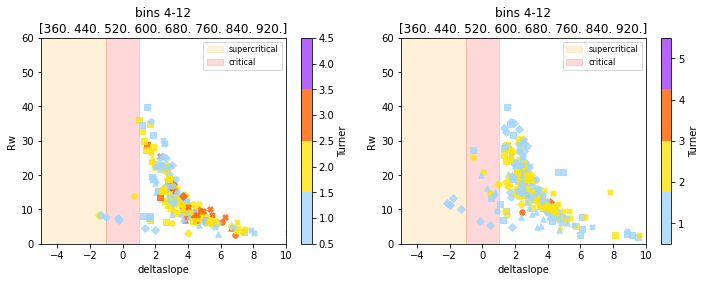

In [466]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12

xstr = 'deltaslope'
ystr = 'Rw'
cstr = 'Turner'
#
cmap = turner_cmap
fig , axs =  plt.subplots(1, 2, figsize=(10,4))
ax = axs[0]
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=1)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B1b[b,I[i]]-SLAPM_gebco[I[i]], (R1b[b,I[i]])*MASK_RRb[b,I[i]], c=(TUXb[b,I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=0.5,vmax=4.5, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-5,10)
ax.set_ylim(0,60)
#ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))

ax = axs[1]
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=1)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B2b[b,I[i]]-SLAPM_gebco[I[i]], (R2b[b,I[i]]), c=(TUXb[b,I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=.5,vmax=5.5, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-5,10)
ax.set_ylim(0,60)
#ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))

fig.tight_layout(pad=1)

fig_filename = 'scatter_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)


fig_scatter_xyz=_Rw_deltaslope_Turner


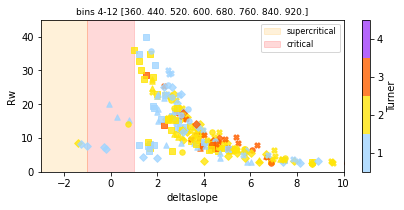

In [262]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12

xstr = 'deltaslope'
ystr = 'Rw'
cstr = 'Turner'
#
cmap = turner_cmap
fig , axs =  plt.subplots(1, 1, figsize=(6,3))
ax = axs
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=1)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B1b[b,I[i]]-SLAPM_gebco[I[i]], (R1b[b,I[i]]), c=(TUXb[b,I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=0.5,vmax=4.5, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-3,10)
ax.set_ylim(0,45)
#ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+' '+str(Bz[b1:b2,1]),fontsize=9)


fig.tight_layout(pad=1)
fig_filename = 'fig_scatter_xyz=_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)

(array([6., 7., 1., 4., 5., 1., 2., 2., 1., 1.]),
 array([ 2.67550909,  5.99864632,  9.32178354, 12.64492077, 15.96805799,
        19.29119521, 22.61433244, 25.93746966, 29.26060689, 32.58374411,
        35.90688134]),
 <BarContainer object of 10 artists>)

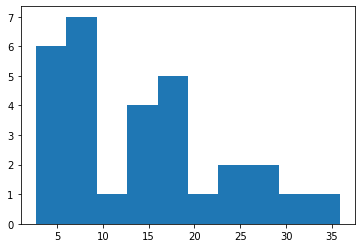

In [472]:
plt.hist(R1b[b,I]) # *MASK_RRb[b,I[i]]


(array([3., 5., 1., 3., 4., 1., 2., 2., 1., 1.]),
 array([ 3.21195581,  6.48144836,  9.75094092, 13.02043347, 16.28992602,
        19.55941857, 22.82891113, 26.09840368, 29.36789623, 32.63738878,
        35.90688134]),
 <BarContainer object of 10 artists>)

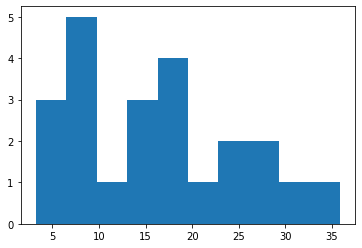

In [473]:
plt.hist(R1b[b,I]*MASK_RRb[b,I]) # *MASK_RRb[b,I[i]]

fig_scatter_xyz=_Rw_deltaslope_Turner


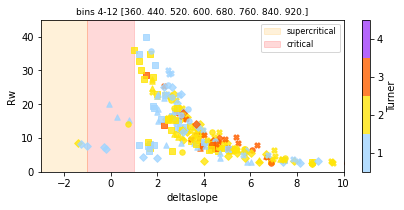

In [262]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12

xstr = 'deltaslope'
ystr = 'Rw * MASK Rp'
cstr = 'Turner'
#
cmap = turner_cmap
fig , axs =  plt.subplots(1, 1, figsize=(6,3))
ax = axs
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=1)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B1b[b,I[i]]-SLAPM_gebco[I[i]], (R1b[b,I[i]])*MASK_RRb[b,I[i]], c=(TUXb[b,I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=0.5,vmax=4.5, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-3,10)
ax.set_ylim(0,45)
#ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+' '+str(Bz[b1:b2,1]),fontsize=9)


fig.tight_layout(pad=1)
fig_filename = 'fig_scatter_xyz=_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)

fig_scatter_xyz=_w_deltaslope_Turner


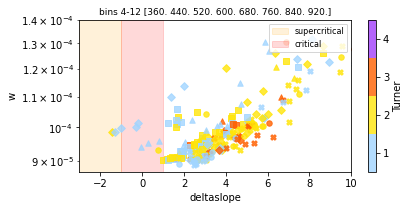

In [263]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12

xstr = 'deltaslope'
ystr = 'w'
cstr = 'Turner'
#
cmap = turner_cmap
fig , axs =  plt.subplots(1, 1, figsize=(6,3))
ax = axs
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=1)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B1b[b,I[i]]-SLAPM_gebco[I[i]], (W1b[b,I[i]]), c=(TUXb[b,I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=0.5,vmax=4.5, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-3,10)
ax.set_ylim(8.7e-5,1.4e-4)
ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+' '+str(Bz[b1:b2,1]),fontsize=9)


fig.tight_layout(pad=1)
fig_filename = 'fig_scatter_xyz=_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)

scatter_w_deltaslope_roughness


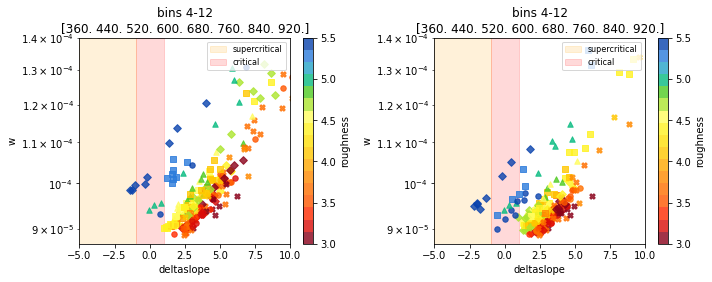

In [85]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12

xstr = 'deltaslope'
ystr = 'w'
cstr = 'roughness'
#
cmap = mycmap22


fig , axs =  plt.subplots(1, 2, figsize=(10,4))
ax = axs[0]
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=1)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B1b[b,I[i]]-SLAPM_gebco[I[i]], (W1b[b,I[i]]), c=(ROGH10_gebco[I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=3,vmax=5.5, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-5,10)
ax.set_ylim(8.7e-5,1.4e-4)
ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))

ax = axs[1]
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=1)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B2b[b,I[i]]-SLAPM_gebco[I[i]], (W2b[b,I[i]]), c=(ROGH10_gebco[I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=3,vmax=5.5, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-5,10)
ax.set_ylim(8.7e-5,1.4e-4)
ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))

fig.tight_layout(pad=1)

fig_filename = 'scatter_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)


fig_scatter_xyz=_$\omega \ (s^{-1})$_Δ-slope $(^o)$_Bathymetric roughness


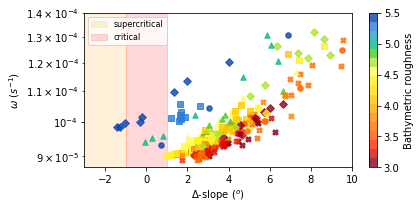

In [91]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12

xstr = 'Δ-slope $(^o)$'
ystr = r'$\omega \ (s^{-1})$'
cstr = 'Bathymetric roughness'
#
cmap = mycmap22


fig , axs =  plt.subplots(1, 1, figsize=(6,3))
ax = axs
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=2)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B1b[b,I[i]]-SLAPM_gebco[I[i]], (W1b[b,I[i]]), c=(ROGH10_gebco[I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=3,vmax=5.5, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-3,10)
ax.set_ylim(8.7e-5,1.4e-4)
ax.set_yscale('log')
#ax.set_title('bins '+str(b1)+'-'+str(b2)+' '+str(Bz[b1:b2,1]),fontsize=9)

fig.tight_layout(pad=1)
fig_filename = 'fig_scatter_xyz=_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)

fig_scatter_xyz=_$R_\omega$_Δ-slope $(^o)$_Bathymetric roughness


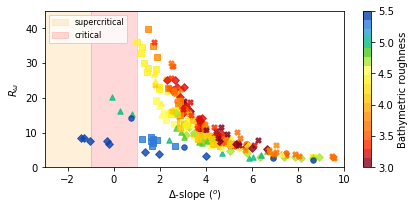

In [92]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12


#
cmap = mycmap22

xstr = 'Δ-slope $(^o)$'
ystr = r'$R_\omega$'
cstr = 'Bathymetric roughness'


fig , axs =  plt.subplots(1, 1, figsize=(6,3))
ax = axs
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=2)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B1b[b,I[i]]-SLAPM_gebco[I[i]], (R1b[b,I[i]]), c=(ROGH10_gebco[I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=3,vmax=5.5, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-3,10)
ax.set_ylim(0,45)

#ax.set_title('bins '+str(b1)+'-'+str(b2)+' '+str(Bz[b1:b2,1]),fontsize=9)

fig.tight_layout(pad=1)
fig_filename = 'fig_scatter_xyz=_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)

scatter_w_deltaslope_ri


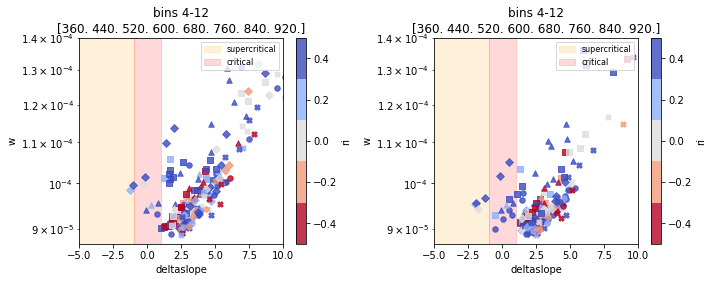

In [195]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12

xstr = 'deltaslope'
ystr = 'w'
cstr = 'ri'
#
cmap=plt.cm.get_cmap('coolwarm_r',5)

fig , axs =  plt.subplots(1, 2, figsize=(10,4))
ax = axs[0]
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=1)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B1b[b,I[i]]-SLAPM_gebco[I[i]], (W1b[b,I[i]]), c=np.log10(Rib[b,I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=-.5,vmax=.5, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-5,10)
ax.set_ylim(8.7e-5,1.4e-4)
ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))

ax = axs[1]
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=1)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B2b[b,I[i]]-SLAPM_gebco[I[i]], (W2b[b,I[i]]), c=np.log10(Rib[b,I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=-.5,vmax=.5, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-5,10)
ax.set_ylim(8.7e-5,1.4e-4)
ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))

fig.tight_layout(pad=1)

fig_filename = 'scatter_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)


fig_scatter_xyz=_$R_\omega$_Δ-slope $(^o)$_$Ri$


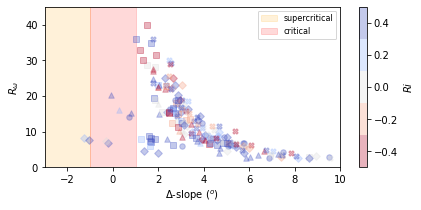

In [100]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12

xstr = 'Δ-slope $(^o)$'
ystr = r'$R_\omega$'
cstr = r'$Ri$'
#
cmap=plt.cm.get_cmap('coolwarm_r',5)

fig , axs =  plt.subplots(1, 1, figsize=(6,3))
ax = axs
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=1)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B1b[b,I[i]]-SLAPM_gebco[I[i]], (R1b[b,I[i]]), c=np.log10(Rib[b,I[i]]), 
            cmap=cmap, s=30, alpha=0.3,vmin=-.5,vmax=.5, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-3,10)
#ax.set_ylim(8.7e-5,1.4e-4)
ax.set_ylim(0,45)
#ax.set_yscale('log')

#ax.set_title('bins '+str(b1)+'-'+str(b2)+' '+str(Bz[b1:b2,1]),fontsize=9)

fig.tight_layout(pad=1)
fig_filename = 'fig_scatter_xyz=_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)


fig_scatter_xyz=_$\omega \ (s^{-1})$_Δ-slope $(^o)$_$Ri$


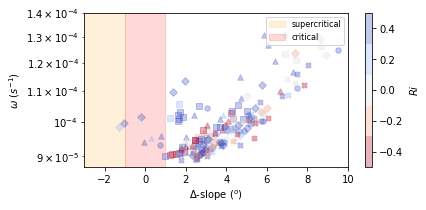

In [101]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12

xstr = 'deltaslope'
ystr = 'w'
cstr = 'r'


xstr = 'Δ-slope $(^o)$'
ystr = r'$\omega \ (s^{-1})$'
cstr = r'$Ri$'

#
cmap=plt.cm.get_cmap('coolwarm_r',5)

fig , axs =  plt.subplots(1, 1, figsize=(6,3))
ax = axs
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=1)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B1b[b,I[i]]-SLAPM_gebco[I[i]], (W1b[b,I[i]]), c=np.log10(Rib[b,I[i]]), 
            cmap=cmap, s=30, alpha=0.3,vmin=-.5,vmax=.5, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-3,10)
ax.set_ylim(8.7e-5,1.4e-4)
#ax.set_ylim(0,45)
ax.set_yscale('log')

#ax.set_title('bins '+str(b1)+'-'+str(b2)+' '+str(Bz[b1:b2,1]),fontsize=9)

fig.tight_layout(pad=1)
fig_filename = 'fig_scatter_xyz=_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)


In [198]:
10**(-0.2)

0.6309573444801932

scatter_w_deltaslope_Rshear


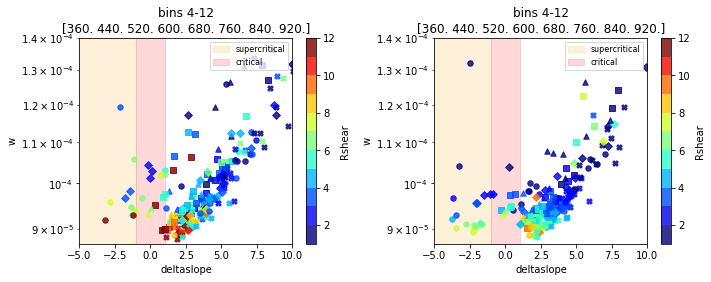

In [195]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12

xstr = 'deltaslope'
ystr = 'w'
cstr = 'Rshear'
#
cmap=plt.cm.get_cmap('jet',11)

fig , axs =  plt.subplots(1, 2, figsize=(10,4))
ax = axs[0]
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=1)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B1b[b,I[i]]-SLAPM_gebco[I[i]], (W1b[b,I[i]]), c=(RSH1b[b,I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=1,vmax=12, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-5,10)
ax.set_ylim(8.7e-5,1.4e-4)
ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))

ax = axs[1]
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=1)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B2b[b,I[i]]-SLAPM_gebco[I[i]], (W2b[b,I[i]]), c=(RSH2b[b,I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=1,vmax=12, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-5,10)
ax.set_ylim(8.7e-5,1.4e-4)
ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))

fig.tight_layout(pad=1)

fig_filename = 'scatter_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)


fig_scatter_xyz=_$\omega \ (s^{-1})$_Δ-slope $(^o)$_$R_{shear}$


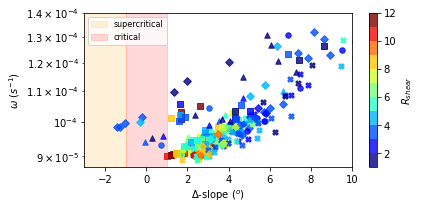

In [102]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12

xstr = 'deltaslope'
ystr = 'w'
cstr = 'Rshear'

xstr = 'Δ-slope $(^o)$'
ystr = r'$\omega \ (s^{-1})$'
cstr = r'$R_{shear}$'

#
cmap=plt.cm.get_cmap('jet',11)

fig , axs =  plt.subplots(1, 1, figsize=(6,3))
ax = axs
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=2)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B1b[b,I[i]]-SLAPM_gebco[I[i]], (W1b[b,I[i]]), c=(RSH1b[b,I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=1,vmax=12, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-3,10)
ax.set_ylim(8.7e-5,1.4e-4)
ax.set_yscale('log')

#ax.set_title('bins '+str(b1)+'-'+str(b2)+' '+str(Bz[b1:b2,1]),fontsize=9)

fig.tight_layout(pad=1)
fig_filename = 'fig_scatter_xyz=_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)

fig_scatter_xyz=_$R_\omega$_Δ-slope $(^o)$_$R_{shear}$


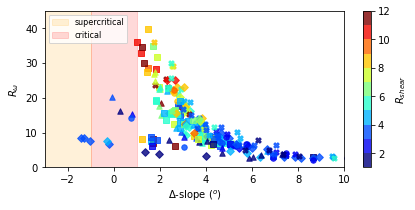

In [103]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12

xstr = 'deltaslope'
ystr = 'Rw'
cstr = 'Rshear'

xstr = 'Δ-slope $(^o)$'
ystr = r'$R_\omega$'
cstr = r'$R_{shear}$'

#
cmap=plt.cm.get_cmap('jet',11)

fig , axs =  plt.subplots(1, 1, figsize=(6,3))
ax = axs
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=2)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B1b[b,I[i]]-SLAPM_gebco[I[i]], (R1b[b,I[i]]), c=(RSH1b[b,I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=1,vmax=12, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-3,10)
ax.set_ylim(0,45)
#ax.set_yscale('log')

#ax.set_title('bins '+str(b1)+'-'+str(b2)+' '+str(Bz[b1:b2,1]),fontsize=9)

fig.tight_layout(pad=1)
fig_filename = 'fig_scatter_xyz=_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)

scatter_$\omega \ (s^{-1})$_Δ-slope $(^o)$_$R_{strain} \ (log_{10})$


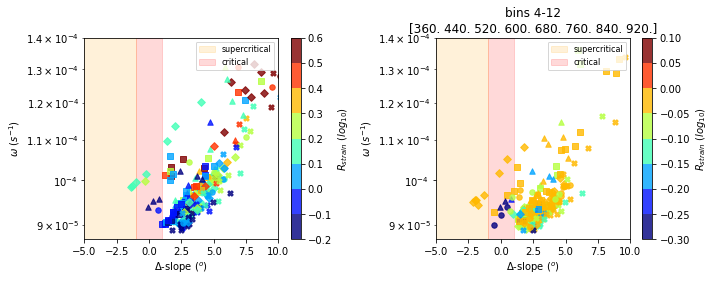

In [104]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12

xstr = 'deltaslope'
ystr = 'w'
cstr = 'Rstrain_log10'

xstr = 'Δ-slope $(^o)$'
ystr = r'$\omega \ (s^{-1})$'
cstr = r'$R_{strain} \ (log_{10})$'

#
cmap=plt.cm.get_cmap('jet',8)

fig , axs =  plt.subplots(1, 2, figsize=(10,4))
ax = axs[0]
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=1)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B1b[b,I[i]]-SLAPM_gebco[I[i]], (W1b[b,I[i]]), c=np.log10(RST1b[b,I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=-.2,vmax=.6, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-5,10)
ax.set_ylim(8.7e-5,1.4e-4)
ax.set_yscale('log')
#ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))

ax = axs[1]
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=1)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B2b[b,I[i]]-SLAPM_gebco[I[i]], (W2b[b,I[i]]), c=np.log10(RST2b[b,I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=-.3,vmax=.1, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-5,10)
ax.set_ylim(8.7e-5,1.4e-4)
ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))

fig.tight_layout(pad=1)

fig_filename = 'scatter_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)


fig_scatter_xyz=_$\omega \ (s^{-1})$_Δ-slope $(^o)$_$R_{strain} \ (log_{10})$


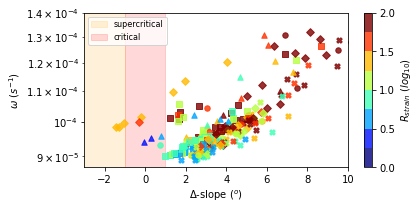

In [105]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12

xstr = 'deltaslope'
ystr = 'w'
cstr = 'Rstrain'

xstr = 'Δ-slope $(^o)$'
ystr = r'$\omega \ (s^{-1})$'
cstr = r'$R_{strain} \ (log_{10})$'

#
cmap=plt.cm.get_cmap('jet',8)

fig , axs =  plt.subplots(1, 1, figsize=(6,3))
ax = axs
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=2)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B1b[b,I[i]]-SLAPM_gebco[I[i]], (W1b[b,I[i]]), c=(RST1b[b,I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=0,vmax=2, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-3,10)
ax.set_ylim(8.7e-5,1.4e-4)
ax.set_yscale('log')
#ax.set_title('bins '+str(b1)+'-'+str(b2)+' '+str(Bz[b1:b2,1]),fontsize=9)

fig.tight_layout(pad=1)
fig_filename = 'fig_scatter_xyz=_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)

fig_scatter_xyz=_$R_\omega$_Δ-slope $(^o)$_$R_{strain} \ (log_{10})$


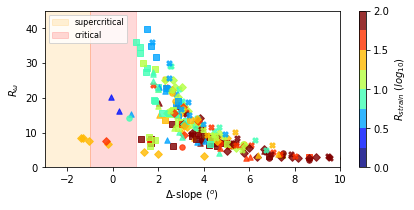

In [106]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12

xstr = 'deltaslope'
ystr = 'Rw'
cstr = 'Rstrain'

xstr = 'Δ-slope $(^o)$'
ystr = r'$R_\omega$'
cstr = r'$R_{strain} \ (log_{10})$'

#
cmap=plt.cm.get_cmap('jet',8)

fig , axs =  plt.subplots(1, 1, figsize=(6,3))
ax = axs
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=2)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B1b[b,I[i]]-SLAPM_gebco[I[i]], (R1b[b,I[i]]), c=(RST1b[b,I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=0,vmax=2, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-3,10)
ax.set_ylim(0,45)
#ax.set_yscale('log')
#ax.set_title('bins '+str(b1)+'-'+str(b2)+' '+str(Bz[b1:b2,1]),fontsize=9)

fig.tight_layout(pad=1)
fig_filename = 'fig_scatter_xyz=_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)

In [1374]:
OUT_EPSI_COLS

['eps_imm_shst',
 'eps_imc_shst',
 'eps_imm_st',
 'eps_imc_st',
 'eps_imm_rw3_st',
 'eps_imc_rw3_st',
 'eps_imm_rw7_st',
 'eps_imc_rw7_st']

scatter_w_deltaslope_epsi_shst_log10


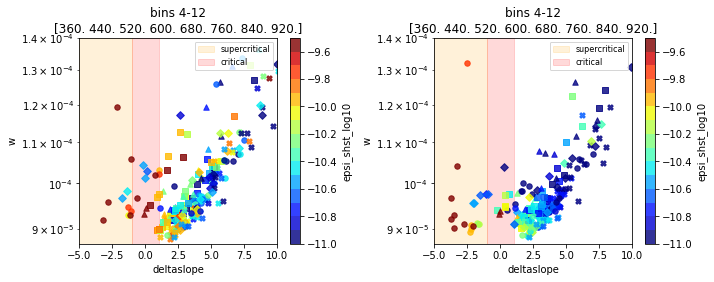

In [197]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12

xstr = 'deltaslope'
ystr = 'w'
cstr = 'epsi_shst_log10'
#
cmap=plt.cm.get_cmap('jet',15)

fig , axs =  plt.subplots(1, 2, figsize=(10,4))
ax = axs[0]
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=1)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B1b[b,I[i]]-SLAPM_gebco[I[i]], (W1b[b,I[i]]), c=np.log10(E1b[b,I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=-11,vmax=-9.5, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-5,10)
ax.set_ylim(8.7e-5,1.4e-4)
ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))

ax = axs[1]
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=1)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B2b[b,I[i]]-SLAPM_gebco[I[i]], (W2b[b,I[i]]), c=np.log10(E2b[b,I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=-11,vmax=-9.5, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-5,10)
ax.set_ylim(8.7e-5,1.4e-4)
ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))

fig.tight_layout(pad=1)

fig_filename = 'scatter_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)


fig_scatter_xyz=_$\omega \ (s^{-1})$_Δ-slope $(^o)$_$\epsilon \ \ \ log_{10}(W \ kg^{-1})$


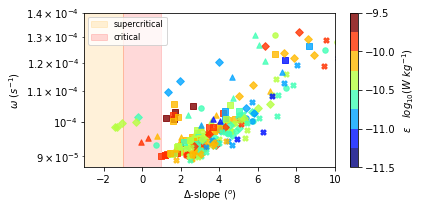

In [108]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12

xstr = 'deltaslope'
ystr = 'w'
cstr = 'epsilon'


xstr = 'Δ-slope $(^o)$'
ystr = r'$\omega \ (s^{-1})$'
cstr = r'$\epsilon \ \ \ log_{10}(W \ kg^{-1})$'

#
cmap=plt.cm.get_cmap('jet',8)

fig , axs =  plt.subplots(1, 1, figsize=(6,3))
ax = axs
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=2)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B1b[b,I[i]]-SLAPM_gebco[I[i]], (W1b[b,I[i]]), c=np.log10(E1b[b,I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=-11.5,vmax=-9.5, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-3,10)
ax.set_ylim(8.7e-5,1.4e-4)
ax.set_yscale('log')

#ax.set_title('bins '+str(b1)+'-'+str(b2)+' '+str(Bz[b1:b2,1]),fontsize=9)

fig.tight_layout(pad=1)
fig_filename = 'fig_scatter_xyz=_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)


fig_scatter_xyz=_$R_\omega$_Δ-slope $(^o)$_$\epsilon \ \ \ log_{10}(W \ kg^{-1})$


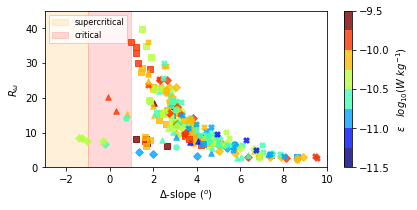

In [109]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12

xstr = 'deltaslope'
ystr = 'Rw'
cstr = 'epsilon'


xstr = 'Δ-slope $(^o)$'
ystr = r'$R_\omega$'
cstr = r'$\epsilon \ \ \ log_{10}(W \ kg^{-1})$'

#
cmap=plt.cm.get_cmap('jet',8)

fig , axs =  plt.subplots(1, 1, figsize=(6,3))
ax = axs
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=2)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B1b[b,I[i]]-SLAPM_gebco[I[i]], (R1b[b,I[i]]), c=np.log10(E1b[b,I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=-11.5,vmax=-9.5, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-3,10)
ax.set_ylim(0,45)

#ax.set_title('bins '+str(b1)+'-'+str(b2)+' '+str(Bz[b1:b2,1]),fontsize=9)

fig.tight_layout(pad=1)
fig_filename = 'fig_scatter_xyz=_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)


fig_scatter_xyz=_$\omega \ (s^{-1})$_Δ-slope $(^o)$_$K \ \ \ log_{10}(m^2 \ s^{-1})$


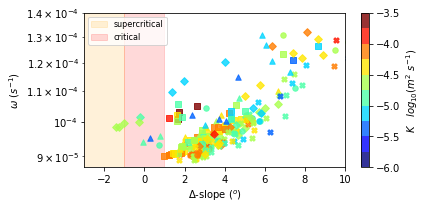

In [110]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12

xstr = 'deltaslope'
ystr = 'w'
cstr = 'diffusivity'


xstr = 'Δ-slope $(^o)$'
ystr = r'$\omega \ (s^{-1})$'
cstr = r'$K \ \ \ log_{10}(m^2 \ s^{-1})$'

#
cmap=plt.cm.get_cmap('jet',10)

fig , axs =  plt.subplots(1, 1, figsize=(6,3))
ax = axs
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=2)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B1b[b,I[i]]-SLAPM_gebco[I[i]], (W1b[b,I[i]]), c=np.log10(K1b[b,I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=-6,vmax=-3.5, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-3,10)
ax.set_ylim(8.7e-5,1.4e-4)
ax.set_yscale('log')

#ax.set_title('bins '+str(b1)+'-'+str(b2)+' '+str(Bz[b1:b2,1]),fontsize=9)

fig.tight_layout(pad=1)
fig_filename = 'fig_scatter_xyz=_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)


fig_scatter_xyz=_$R_\omega$_Δ-slope $(^o)$_$K \ \ \ log_{10}(m^2 \ s^{-1})$


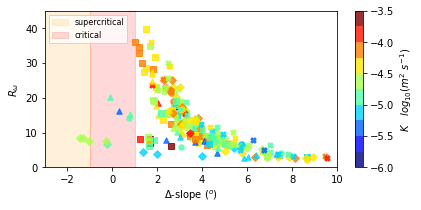

In [111]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12

xstr = 'deltaslope'
ystr = 'Rw'
cstr = 'diffusivity'

xstr = 'Δ-slope $(^o)$'
ystr = r'$R_\omega$'
cstr = r'$K \ \ \ log_{10}(m^2 \ s^{-1})$'

#
cmap=plt.cm.get_cmap('jet',10)

fig , axs =  plt.subplots(1, 1, figsize=(6,3))
ax = axs
ax.axvspan(-5,-1, ymin=0, ymax=1, color='orange',alpha=.15,label='supercritical')
ax.axvspan(-1, 1, ymin=0, ymax=1, color='red',alpha=.15,label='critical')
ax.legend(fontsize=8,loc=2)
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(B1b[b,I[i]]-SLAPM_gebco[I[i]], (R1b[b,I[i]]), c=np.log10(K1b[b,I[i]]), 
            cmap=cmap, s=30, alpha=0.8,vmin=-6,vmax=-3.5, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.set_xlim(-3,10)
ax.set_ylim(0,45)


#ax.set_title('bins '+str(b1)+'-'+str(b2)+' '+str(Bz[b1:b2,1]),fontsize=9)

fig.tight_layout(pad=1)
fig_filename = 'fig_scatter_xyz=_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)


### Figures z.lon.lat for paper

fig_scatter_xyz=_Latitude_Longitude_Bathymetric roughness


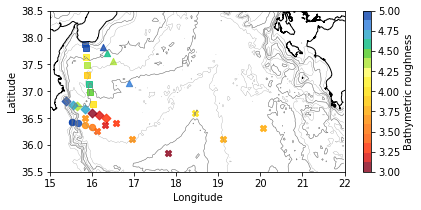

In [97]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 5

xstr = 'Longitude'
ystr = 'Latitude'
cstr = 'Bathymetric roughness'
#

fig , axs =  plt.subplots(1, 1, figsize=(6,3))
cmap= plt.cm.get_cmap('spring_r',7)
cmap= plt.cm.get_cmap('jet',7)
cmap = mycmap22

ax = axs
for b in range(b1,b2):
    for i in range(0,len(I)):
        c = ax.scatter(LONb[b,I[i]], (LATb[b,I[i]]), c=(ROGH10_gebco[I[i]]), 
            cmap=cmap, vmin=3,vmax=5,s=40, alpha=0.8,marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
cs1 = ax.contour(XXG_R,YYG_R,ZZG_R,levels= np.arange(-5000,0,500),colors='gray', linewidths=0.25, linestyles='solid' )
cs2 = ax.contour(XXG_R,YYG_R,ZZG_R,levels= np.arange(-5000,0,1000),colors='gray', linewidths=0.5, linestyles='solid' )
#ax.clabel(cs1, levels=[-500, -1500, -2500,-3500], fmt='%d m',fontsize=6,colors='r')
ax.plot(ITcoast['lonIT'],ITcoast['latIT'],'k-',lw=1)
ax.set_xlim(15,22)
ax.set_ylim(35.5,38.5)

#ax.set_ylim(35.5,40.8)
#ax.set_yscale('log')
#ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))



fig.tight_layout(pad=1)
fig_filename = 'fig_scatter_xyz=_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)


fig_scatter_xyz=_Latitude_Longitude_Rw1


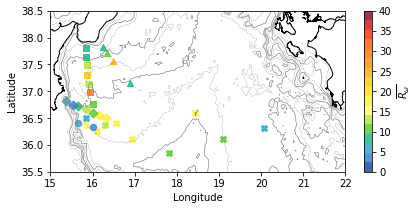

In [99]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12
bb = np.arange(b1,b2+1,1)

xstr = 'Longitude'
ystr = 'Latitude'
cstr = 'Rw1'
#

fig , axs =  plt.subplots(1, 1, figsize=(6,3))
cmap= plt.cm.get_cmap('spring_r',7)
cmap= plt.cm.get_cmap('jet',9)
cmap = mycmap2

ax = axs
#for b in range(b1,b2):
for i in range(0,len(I)):
        c = ax.scatter(LONb[0,I[i]], (LATb[0,I[i]]), c=np.nanmean(R1b[bb,I[i]]), 
            cmap=cmap, vmin=0,vmax=40,s=40, alpha=0.8,marker=mrkr[i])
fig.colorbar(c,label=r'$\overline{R_\omega}$'); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
cs1 = ax.contour(XXG_R,YYG_R,ZZG_R,levels= np.arange(-5000,0,500),colors='gray', linewidths=0.25, linestyles='solid' )
cs2 = ax.contour(XXG_R,YYG_R,ZZG_R,levels= np.arange(-5000,0,1000),colors='gray', linewidths=0.5, linestyles='solid' )
#ax.clabel(cs1, levels=[-500, -1500, -2500,-3500], fmt='%d m',fontsize=6,colors='r')
ax.plot(ITcoast['lonIT'],ITcoast['latIT'],'k-',lw=1)
ax.set_xlim(15,22)
ax.set_ylim(35.5,38.5)

#ax.set_ylim(35.5,40.8)
#ax.set_yscale('log')

#ax.set_title('bins '+str(b1)+'-'+str(b2)+': '+str(Bz[b1:b2,1]),fontsize=12)
#ax.set_title('bins '+str(b1)+'-'+str(b2),fontsize=12)

#ax.set_title('bins: from bott. '+str(Bz[b1:b2,1]),fontsize=12)


fig.tight_layout(pad=1)
fig_filename = 'fig_scatter_xyz=_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)



fig_scatter_xyz=_Latitude_Longitude_epsilon


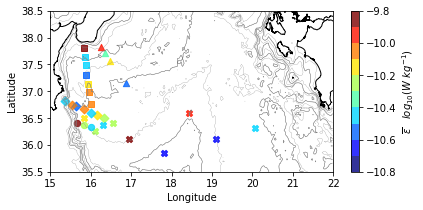

In [113]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12
bb = np.arange(b1,b2+1,1)

xstr = 'Longitude'
ystr = 'Latitude'
cstr = 'epsilon'



#

fig , axs =  plt.subplots(1, 1, figsize=(6,3))
cmap= plt.cm.get_cmap('spring_r',7)
cmap= plt.cm.get_cmap('jet',10)

ax = axs
#for b in range(b1,b2):
for i in range(0,len(I)):
        c = ax.scatter(LONb[0,I[i]], (LATb[0,I[i]]), c=np.log10(np.nanmean((E1b[bb,I[i]]))), 
            cmap=cmap, vmin=-10.8,vmax=-9.8,s=40, alpha=0.8,marker=mrkr[i])
fig.colorbar(c,label=r'$\overline{\epsilon} \ \ \ log_{10}(W \ kg^{-1})$'); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
cs1 = ax.contour(XXG_R,YYG_R,ZZG_R,levels= np.arange(-5000,0,500),colors='gray', linewidths=0.25, linestyles='solid' )
cs2 = ax.contour(XXG_R,YYG_R,ZZG_R,levels= np.arange(-5000,0,1000),colors='gray', linewidths=0.5, linestyles='solid' )
#ax.clabel(cs1, levels=[-500, -1500, -2500,-3500], fmt='%d m',fontsize=6,colors='r')
ax.plot(ITcoast['lonIT'],ITcoast['latIT'],'k-',lw=1)
ax.set_xlim(15,22)
ax.set_ylim(35.5,38.5)

fig.tight_layout(pad=1)
fig_filename = 'fig_scatter_xyz=_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)



fig_scatter_xyz=_Latitude_Longitude_diff


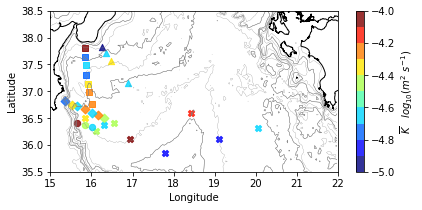

In [114]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12
bb = np.arange(b1,b2+1,1)

xstr = 'Longitude'
ystr = 'Latitude'
cstr = 'diff'
#

fig , axs =  plt.subplots(1, 1, figsize=(6,3))
cmap= plt.cm.get_cmap('spring_r',7)
cmap= plt.cm.get_cmap('jet',10)

ax = axs
#for b in range(b1,b2):
for i in range(0,len(I)):
        c = ax.scatter(LONb[0,I[i]], (LATb[0,I[i]]), c=np.log10(np.nanmean((K1b[bb,I[i]]))), 
            cmap=cmap, vmin=-5,vmax=-4,s=40, alpha=0.8,marker=mrkr[i])
fig.colorbar(c,label='$\overline{K} \ \ \ log_{10}(m^2 \ s^{-1})$'); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
cs1 = ax.contour(XXG_R,YYG_R,ZZG_R,levels= np.arange(-5000,0,500),colors='gray', linewidths=0.25, linestyles='solid' )
cs2 = ax.contour(XXG_R,YYG_R,ZZG_R,levels= np.arange(-5000,0,1000),colors='gray', linewidths=0.5, linestyles='solid' )
#ax.clabel(cs1, levels=[-500, -1500, -2500,-3500], fmt='%d m',fontsize=6,colors='r')
ax.plot(ITcoast['lonIT'],ITcoast['latIT'],'k-',lw=1)
ax.set_xlim(15,22)
ax.set_ylim(35.5,38.5)

fig.tight_layout(pad=1)
fig_filename = 'fig_scatter_xyz=_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)



### df / table

In [376]:

B_w1.shape
#np.nanmean(R1b[bb,I],axis=0)

(5000, 63)

In [172]:
VEL = np.sqrt(U**2+V**2)
VELBOT = np.sqrt(Ubot**2+Vbot**2)


In [173]:
w = 80

Uerrbotb, Uerrbotbb, Zb, Bz  = matrice_maker_bins_from_bottom(Uerrbot,D,w)
VELBOTb, VELBOTbb, Zb, Bz  = matrice_maker_bins_from_bottom(VELBOT,D,w)
UerrbotVELBOTb, UerrbotVELBOTbb, Zb, Bz  = matrice_maker_bins_from_bottom(Uerrbot/VELBOT,D,w)


In [176]:
np.nanmean(VELBOT[:,KM3])
np.nanmean(Uerrbot[:,KM3])


0.009742845

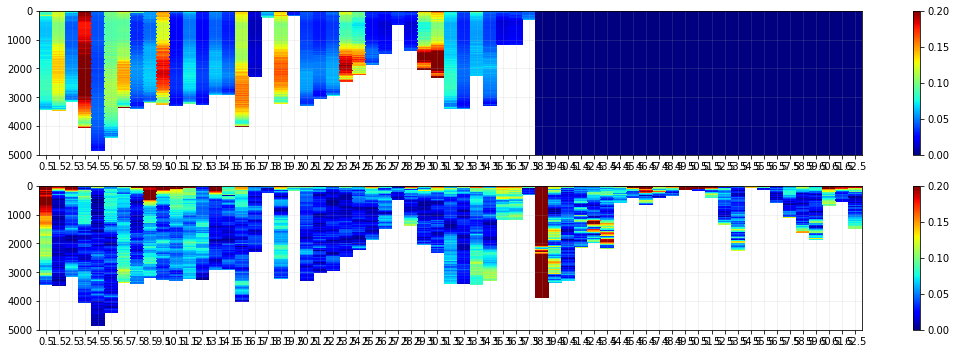

In [171]:
I = I0

fig , axs =  plt.subplots(2, 1, figsize=(15,5))
ax = axs[0]
c = ax.pcolor(np.abs(Uerr[:,I]),cmap='jet',vmin=0,vmax=0.2)
fig.colorbar(c,label='')
#ax.set_ylim(0,8)
ax.set_xticks(np.arange(0,len(I))+.5)
#ax.set_xticklabels(sta[I],rotation=90)
ax.grid(alpha=.2)
ax.invert_yaxis()

ax = axs[1]
c = ax.pcolor(np.abs(VEL[:,I]),cmap='jet',vmin=0,vmax=0.2)
fig.colorbar(c,label='')
#ax.set_ylim(0,8)
ax.set_xticks(np.arange(0,len(I))+.5)
#ax.set_xticklabels(sta[I],rotation=90)
ax.grid(alpha=.2)
ax.invert_yaxis()

fig.tight_layout(pad=1)

In [ ]:
Vbot

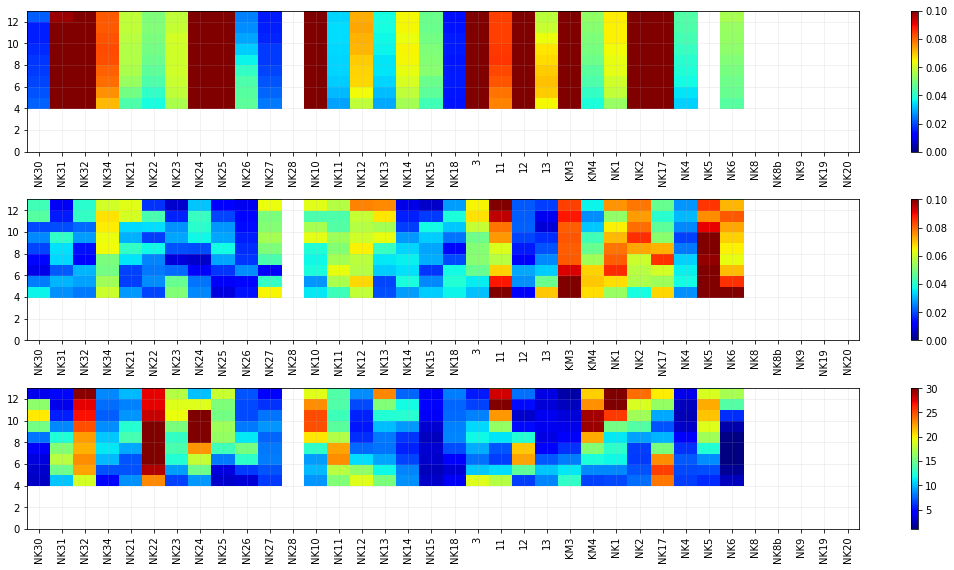

In [145]:
fig , axs =  plt.subplots(3, 1, figsize=(15,8))
ax = axs[0]
c = ax.pcolor((Uerrb[:,KM3]*R1b[:,KM3]/R1b[:,KM3]),cmap='jet',vmin=0,vmax=0.1)
fig.colorbar(c,label='')
ax.set_ylim(0,13)
ax.set_xticks(np.arange(0,len(KM3))+.5)
ax.set_xticklabels(sta[KM3],rotation=90)
ax.grid(alpha=.2)


ax = axs[1]
c = ax.pcolor((VELb[:,KM3]*R1b[:,KM3]/R1b[:,KM3]),cmap='jet',vmin=0,vmax=0.1)
fig.colorbar(c,label='')
ax.set_ylim(0,13)
ax.set_xticks(np.arange(0,len(KM3))+.5)
ax.set_xticklabels(sta[KM3],rotation=90)
ax.grid(alpha=.2)

fig.tight_layout(pad=1)


ax = axs[2]
c = ax.pcolor((R1b[:,KM3]),cmap='jet',vmin=1,vmax=30)
fig.colorbar(c,label='')
ax.set_ylim(0,13)
ax.set_xticks(np.arange(0,len(KM3))+.5)
ax.set_xticklabels(sta[KM3],rotation=90)
ax.grid(alpha=.2)

fig.tight_layout(pad=1)


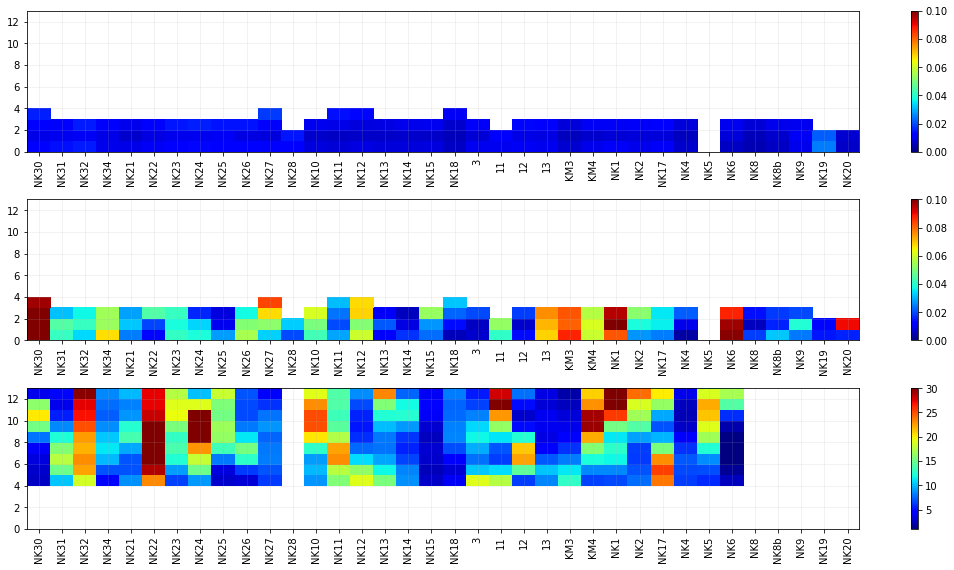

In [214]:
fig , axs =  plt.subplots(3, 1, figsize=(15,8))
ax = axs[0]
c = ax.pcolor((Uerrbotb[:,KM3]),cmap='jet',vmin=0,vmax=0.1)
fig.colorbar(c,label='')
ax.set_ylim(0,13)
ax.set_xticks(np.arange(0,len(KM3))+.5)
ax.set_xticklabels(sta[KM3],rotation=90)
ax.grid(alpha=.2)


ax = axs[1]
c = ax.pcolor((VELBOTb[:,KM3]),cmap='jet',vmin=0,vmax=0.1)
fig.colorbar(c,label='')
ax.set_ylim(0,13)
ax.set_xticks(np.arange(0,len(KM3))+.5)
ax.set_xticklabels(sta[KM3],rotation=90)
ax.grid(alpha=.2)

fig.tight_layout(pad=1)


ax = axs[2]
c = ax.pcolor((R1b[:,KM3]),cmap='jet',vmin=1,vmax=30)
fig.colorbar(c,label='')
ax.set_ylim(0,13)
ax.set_xticks(np.arange(0,len(KM3))+.5)
ax.set_xticklabels(sta[KM3],rotation=90)
ax.grid(alpha=.2)

fig.tight_layout(pad=1)


In [215]:
np.nanmean(Uerrb[:,KM3])

0.07548382022531698

In [216]:
np.nanmean(Uerrbot[:,KM3])

0.009742845

In [78]:
Uerrb.shape
VELb.shape

(60, 63)

In [189]:
I = KM3
b1 = 0
b2 = 12
bb = np.arange(b1,b2+1,1)

y = np.nanmean(R1b[np.ix_(bb, I)],axis=0)
x1 = np.nanmean(Uerrbotb[np.ix_(bb, I)],axis=0) 

x2 = np.nanmean( (Uerrbotb/VELBOTb)[np.ix_(bb, I)],axis=0)

xx = np.nanmean( (UerrbotVELBOTb)[np.ix_(bb, I)],axis=0)


z1 = ROGH10_gebco[I]
z2 = SLAPM_gebco[I]


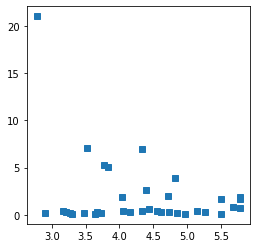

In [195]:
fig , axs =  plt.subplots(1, 1, figsize=(4,4))
ax = axs
ax.plot(z1,xx,'s')

In [226]:
x = x2*1


fig_S1


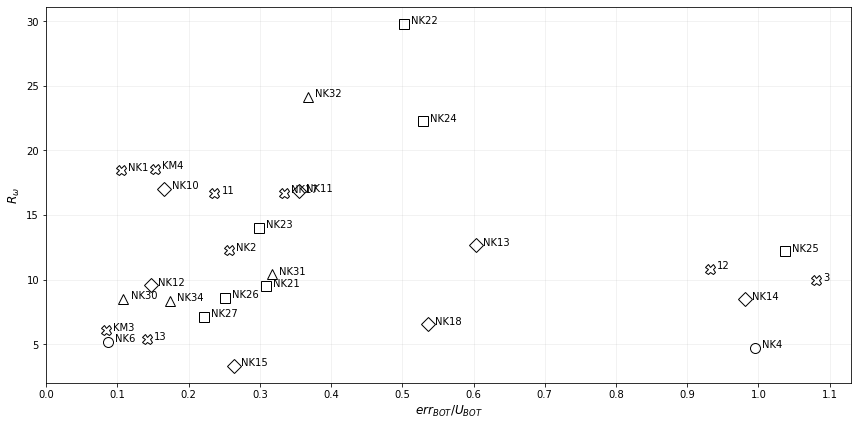

In [227]:
xstr = r'$err_{BOT}/U_{BOT}$'
ystr = r'$R_\omega$'


fig , axs =  plt.subplots(1, 1, figsize=(12,6))
ax = axs
for i in range(0,len(x2)):
    if (np.isfinite(x[i]) & np.isfinite(y[i]) ) == True:
        ax.plot(x[i],y[i],marker=mrkrKM3[i],color='k',markerfacecolor='none',markersize=10)
        ax.text(x[i]+0.01,y[i],sta[I][i])

ax.set_xlabel(xstr,fontsize=12) ; ax.set_ylabel(ystr,fontsize=12)
ax.set_xticks(np.arange(0,1.2,0.1))
ax.grid(alpha=.2)
fig.tight_layout(pad=1)
fig_filename = 'fig_S1'
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/IONOMIX/plots/'+fig_filename + '.png',dpi=600)


In [67]:
Uerrb
VELb
N2b
RSH1b
RST1b


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [68]:
df = pd.DataFrame()
I = KM3
b1 = 4
b2 = 12
bb = np.arange(b1,b2+1,1)

df['Stations'] = sta[I]
df['Marker'] = mrkrKM3
df['Date'] = dt[I]

df['Latitude'] = lat_ctd[I]
df['Latitude'] = df['Latitude'].apply(lambda x: format(x, '.2f'))

df['Longitude'] = lon_ctd[I]
df['Longitude'] = df['Longitude'].apply(lambda x: format(x, '.2f'))

df['Date'] = dt[I]


df['Bottom (m)'] = BTTD_gebco[I].astype(int)

df['mean N2'] = np.nanmean(N2b[np.ix_(bb, I)],axis=0)
df['mean N2'] = df['mean N2'].apply(lambda x: format(x, '.2e'))


df['mean Rw'] = np.nanmean(R1b[np.ix_(bb, I)],axis=0)

df['std  Rw'] = np.nanstd(R1b[np.ix_(bb, I)],axis=0)
df['std  Rw'] = df['std  Rw'] .apply(lambda x: format(x, '.2f'))

df['mean Rshear'] = np.nanmean(RSH1b[np.ix_(bb, I)],axis=0)

#df['std  Rshear'] = np.nanstd(RSH1b[np.ix_(bb, I)],axis=0)
#df['mean Rstrain'] = np.nanmean(RST1b[np.ix_(bb, I)],axis=0)

df['mean Rstrain'] = 3* df['mean Rshear']  / df['mean Rw'] 

df['mean Rw'] = df['mean Rw'].apply(lambda x: format(x, '.2f'))
df['mean Rshear'] = df['mean Rshear'].apply(lambda x: format(x, '.2f'))
df['mean Rstrain'] = df['mean Rstrain'].apply(lambda x: format(x, '.2f'))

#df['std  Rstrain'] = np.nanstd(RST1b[np.ix_(bb, I)],axis=0)
#df['toto'] = 3* np.nanmean(RSH1b[np.ix_(bb, I)],axis=0) / np.nanmean(RST1b[np.ix_(bb, I)],axis=0)
    

df['mean w'] = np.nanmean(W1b[np.ix_(bb, I)],axis=0)
df['mean w']  = df['mean w'].apply(lambda x: format(x, '.2e'))

df['std  w'] = np.nanstd(W1b[np.ix_(bb, I)],axis=0)
df['std  w'] = df['std  w'].apply(lambda x: format(x, '.2e'))

df['mean DeltaSlope'] = np.nanmean(B1b[np.ix_(bb, I)]-SLAPM_gebco[I],axis=0)
df['mean DeltaSlope'] = df['mean DeltaSlope'].apply(lambda x: format(x, '.2f'))

df['Roughness (var<z>)'] = ROGH10_gebco[I]
df['Roughness (var<z>)']  = df['Roughness (var<z>)'].apply(lambda x: format(x, '.2f'))

df['Slope (º)'] = SLAPM_gebco[I]
df['Slope (º)'] = df['Slope (º)'].apply(lambda x: format(x, '.2f'))

df['Dir. Flow (º)'] = dirflows[I]
df['Dir. Flow (º)'] = df['Dir. Flow (º)'].astype(int)

df['mean VELb'] = np.nanmean(VELb[np.ix_(bb, I)],axis=0)
df['mean VELb'] = df['mean VELb'].apply(lambda x: format(x, '.2f'))

df['std  VELb'] = np.nanstd(VELb[np.ix_(bb, I)],axis=0)
df['std  VELb'] = df['std  VELb'].apply(lambda x: format(x, '.2f'))

#df['std  N2'] = np.nanstd(N2b[np.ix_(bb, I)],axis=0)


df['mean epsi'] = np.nanmean(E1b[np.ix_(bb, I)],axis=0)
df['mean epsi']  = df['mean epsi'].apply(lambda x: format(x, '.2e')) 

df['std  epsi'] = np.nanstd(E1b[np.ix_(bb, I)],axis=0)
df['std  epsi'] = df['std  epsi'].apply(lambda x: format(x, '.2e'))


df['mean K'] = np.nanmean(K1b[np.ix_(bb, I)],axis=0)
df['mean K'] = df['mean K'].apply(lambda x: format(x, '.2e'))

df['std  K'] = np.nanstd(K1b[np.ix_(bb, I)],axis=0)
df['std  K']  = df['std  K'].apply(lambda x: format(x, '.2e')) 
print(df.columns)
df

Index(['Stations', 'Marker', 'Date', 'Latitude', 'Longitude', 'Bottom (m)',
       'mean N2', 'mean Rw', 'std  Rw', 'mean Rshear', 'mean Rstrain',
       'mean w', 'std  w', 'mean DeltaSlope', 'Roughness (var<z>)',
       'Slope (º)', 'Dir. Flow (º)', 'mean VELb', 'std  VELb', 'mean epsi',
       'std  epsi', 'mean K', 'std  K'],
      dtype='object')


Stations Marker                 Date Latitude Longitude  Bottom (m)  \
0      NK30      ^  2007-07-28 03:22:48    37.82     16.25       -1390   
1      NK31      ^  2007-07-28 05:37:26    37.71     16.34       -2069   
2      NK32      ^  2007-07-28 09:15:41    37.56     16.49       -2358   
3      NK34      ^  2007-07-28 17:09:46    37.15     16.88       -3437   
4      NK21      s  2007-07-26 12:56:32    36.77     16.01       -3321   
5      NK22      s  2007-07-26 17:05:54    36.98     15.95       -3068   
6      NK23      s  2007-07-26 20:00:08    37.14     15.92       -2980   
7      NK24      s  2007-07-26 23:43:42    37.30     15.87       -2482   
8      NK25      s  2007-07-27 16:48:05    37.49     15.88       -2232   
9      NK26      s  2007-07-27 19:15:51    37.64     15.85       -1886   
10     NK27      s  2007-07-27 21:46:41    37.81     15.84       -1501   
11     NK28      s  2007-07-27 23:12:53    37.89     15.83        -536   
12     NK10      D  2007-07-24 16:29:54    36.50     16.32       -3297   
13     NK11      D  2007-07-24 19:58:09    36.55     16.15       -3311   
14     NK12      D  2007-07-24 23:09:03    36.60     16.00       -3232   
15     NK13      D  2007-07-25 03:02:22    36.67     15.83       -3278   
16     NK14      D  2007-07-25 06:16:56    36.72     15.64       -2926   
17     NK15      D  2007-07-25 08:50:15    36.75     15.53       -2984   
18     NK18      D  2007-07-25 14:26:17    36.82     15.37       -2324   
19        3      X  2007-07-21 02:31:35    35.86     17.80       -4083   
20       11      X  2007-07-20 19:03:51    36.12     16.94       -3534   
21       12      X  2007-07-21 12:29:39    36.12     19.10       -3535   
22       13      X  2007-07-21 20:27:45    36.32     20.06       -3207   
23      KM3      X  2007-07-26 00:04:29    36.50     15.83       -3388   
24      KM4      X  2007-07-19 22:13:31    36.27     16.10       -3434   
25      NK1      X  2007-07-20 13:51:46    36.42     16.55       -3236   
26      NK2      X  2007-07-20 08:18:06    36.37     16.30       -3267   
27     NK17      X  2007-07-24 02:54:59    36.59     18.44       -4032   
28      NK4      o  2007-07-19 14:57:31    36.33     16.00       -3462   
29      NK5      o  2007-07-19 10:50:23    36.37     15.83       -3467   
30      NK6      o  2007-07-19 07:21:04    36.40     15.66       -3278   
31      NK8      o  2007-07-19 01:33:26    36.43     15.52       -1186   
32     NK8b      o  2007-07-19 02:45:58    36.43     15.52       -1186   
33      NK9      o  2007-07-19 00:15:28    36.43     15.47        -311   
34     NK19      o  2007-07-18 21:49:34    36.32     15.37        -239   
35     NK20      o  2007-07-18 23:08:33    36.38     15.42        -198   

     mean N2 mean Rw std  Rw mean Rshear  ... mean DeltaSlope  \
0   3.99e-06    8.50    6.42        1.81  ...            3.27   
1   3.91e-07   10.40    4.80        4.25  ...            3.85   
2   3.32e-07   24.16    3.23        7.33  ...            1.94   
3   3.10e-07    8.37    1.89        3.42  ...            3.80   
4   3.10e-07    9.48    2.13        6.29  ...            3.89   
5   3.21e-07   29.79    3.83        9.64  ...            1.46   
6   3.17e-07   14.00    4.12        5.98  ...            2.62   
7   3.17e-07   22.25   10.35        4.92  ...            2.67   
8   3.39e-07   12.20    5.49        4.28  ...            4.03   
9   4.07e-07    8.59    3.54        3.43  ...            4.22   
10  9.84e-07    7.12    1.34        7.90  ...            1.70   
11       nan     nan     nan         nan  ...             nan   
12  3.07e-07   17.00    6.50        6.50  ...            3.51   
13  3.03e-07   16.84    3.44        7.62  ...            3.26   
14  3.07e-07    9.54    4.66        4.24  ...            4.76   
15  3.16e-07   12.65    4.63        7.22  ...            3.16   
16  3.02e-07    8.48    2.24        3.72  ...            4.47   
17  3.58e-07    3.34    0.69        3.89  ...            7.14   
18  3.65e-07    6.52    1.92 

In [69]:
df

Stations Marker                 Date Latitude Longitude  Bottom (m)  \
0      NK30      ^  2007-07-28 03:22:48    37.82     16.25       -1390   
1      NK31      ^  2007-07-28 05:37:26    37.71     16.34       -2069   
2      NK32      ^  2007-07-28 09:15:41    37.56     16.49       -2358   
3      NK34      ^  2007-07-28 17:09:46    37.15     16.88       -3437   
4      NK21      s  2007-07-26 12:56:32    36.77     16.01       -3321   
5      NK22      s  2007-07-26 17:05:54    36.98     15.95       -3068   
6      NK23      s  2007-07-26 20:00:08    37.14     15.92       -2980   
7      NK24      s  2007-07-26 23:43:42    37.30     15.87       -2482   
8      NK25      s  2007-07-27 16:48:05    37.49     15.88       -2232   
9      NK26      s  2007-07-27 19:15:51    37.64     15.85       -1886   
10     NK27      s  2007-07-27 21:46:41    37.81     15.84       -1501   
11     NK28      s  2007-07-27 23:12:53    37.89     15.83        -536   
12     NK10      D  2007-07-24 16:29:54    36.50     16.32       -3297   
13     NK11      D  2007-07-24 19:58:09    36.55     16.15       -3311   
14     NK12      D  2007-07-24 23:09:03    36.60     16.00       -3232   
15     NK13      D  2007-07-25 03:02:22    36.67     15.83       -3278   
16     NK14      D  2007-07-25 06:16:56    36.72     15.64       -2926   
17     NK15      D  2007-07-25 08:50:15    36.75     15.53       -2984   
18     NK18      D  2007-07-25 14:26:17    36.82     15.37       -2324   
19        3      X  2007-07-21 02:31:35    35.86     17.80       -4083   
20       11      X  2007-07-20 19:03:51    36.12     16.94       -3534   
21       12      X  2007-07-21 12:29:39    36.12     19.10       -3535   
22       13      X  2007-07-21 20:27:45    36.32     20.06       -3207   
23      KM3      X  2007-07-26 00:04:29    36.50     15.83       -3388   
24      KM4      X  2007-07-19 22:13:31    36.27     16.10       -3434   
25      NK1      X  2007-07-20 13:51:46    36.42     16.55       -3236   
26      NK2      X  2007-07-20 08:18:06    36.37     16.30       -3267   
27     NK17      X  2007-07-24 02:54:59    36.59     18.44       -4032   
28      NK4      o  2007-07-19 14:57:31    36.33     16.00       -3462   
29      NK5      o  2007-07-19 10:50:23    36.37     15.83       -3467   
30      NK6      o  2007-07-19 07:21:04    36.40     15.66       -3278   
31      NK8      o  2007-07-19 01:33:26    36.43     15.52       -1186   
32     NK8b      o  2007-07-19 02:45:58    36.43     15.52       -1186   
33      NK9      o  2007-07-19 00:15:28    36.43     15.47        -311   
34     NK19      o  2007-07-18 21:49:34    36.32     15.37        -239   
35     NK20      o  2007-07-18 23:08:33    36.38     15.42        -198   

     mean N2 mean Rw std  Rw mean Rshear  ... mean DeltaSlope  \
0   3.99e-06    8.50    6.42        1.81  ...            3.27   
1   3.91e-07   10.40    4.80        4.25  ...            3.85   
2   3.32e-07   24.16    3.23        7.33  ...            1.94   
3   3.10e-07    8.37    1.89        3.42  ...            3.80   
4   3.10e-07    9.48    2.13        6.29  ...            3.89   
5   3.21e-07   29.79    3.83        9.64  ...            1.46   
6   3.17e-07   14.00    4.12        5.98  ...            2.62   
7   3.17e-07   22.25   10.35        4.92  ...            2.67   
8   3.39e-07   12.20    5.49        4.28  ...            4.03   
9   4.07e-07    8.59    3.54        3.43  ...            4.22   
10  9.84e-07    7.12    1.34        7.90  ...            1.70   
11       nan     nan     nan         nan  ...             nan   
12  3.07e-07   17.00    6.50        6.50  ...            3.51   
13  3.03e-07   16.84    3.44        7.62  ...            3.26   
14  3.07e-07    9.54    4.66        4.24  ...            4.76   
15  3.16e-07   12.65    4.63        7.22  ...            3.16   
16  3.02e-07    8.48    2.24        3.72  ...            4.47   
17  3.58e-07    3.34    0.69        3.89  ...            7.14   
18  3.65e-07    6.52    1.92 

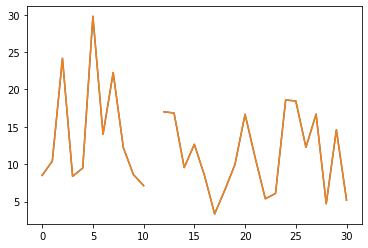

In [115]:
plt.plot(df['mean Rw'])
plt.plot(3*df['mean Rshear']/df['mean Rstrain'])


In [128]:
df.to_csv('/Users/floriankokoszka/Desktop/IONOMIX/plots/table_bottom_bins_'+str(b1)+'_'+str(b2)+'.csv', index = False)

### other geo (vel bottom, Fr .... )

scatter_Lat_Lon_Vel


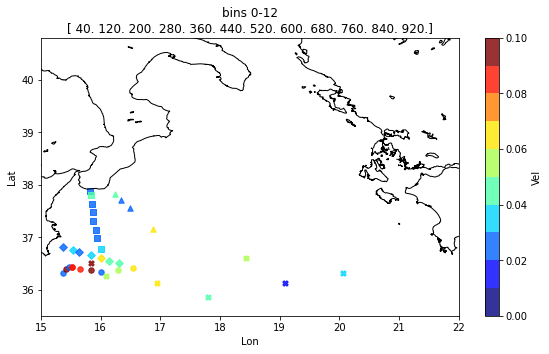

In [201]:
I = KM3
mrkr = mrkrKM3
b1 = 0
b2 = 12
bb = np.arange(b1,b2,1)

xstr = 'Lon'
ystr = 'Lat'
cstr = 'Vel'
#

fig , axs =  plt.subplots(1, 1, figsize=(8,5))
cmap= plt.cm.get_cmap('spring_r',7)
cmap= plt.cm.get_cmap('jet',10)

ax = axs
#for b in range(b1,b2):
for i in range(0,len(I)):
        c = ax.scatter(LONb[0,I[i]], (LATb[0,I[i]]), c=np.nanmean(VELb[bb,I[i]]), 
            cmap=cmap, vmin=0,vmax=.1,s=30, alpha=0.8,marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.plot(ITcoast['lonIT'],ITcoast['latIT'],'k-',lw=1)
ax.set_xlim(15,22)
ax.set_ylim(35.5,38.5)

ax.set_ylim(35.5,40.8)
#ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))



fig.tight_layout(pad=1)

fig_filename = 'scatter_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)


In [1594]:
Fr = []
b1 = 4
b2 = 12
bb = np.arange(b1,b2,1)
for i in range(0,len(sta)):
    Fr.append( np.abs(VELb[b1,i]-VELb[b2,i])/((b2-b1)*80) / np.nanmean(N1b[bb,i]) )
Fr = np.array(Fr)

scatter_Lat_Lon_Fr


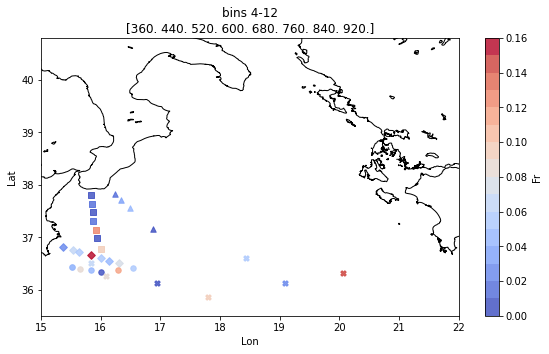

In [1869]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 12
bb = np.arange(b1,b2,1)

xstr = 'Lon'
ystr = 'Lat'
cstr = 'Fr'
#

fig , axs =  plt.subplots(1, 1, figsize=(8,5))
cmap= plt.cm.get_cmap('spring_r',7)
cmap= plt.cm.get_cmap('coolwarm',16)

ax = axs
#for b in range(b1,b2):
for i in range(0,len(I)):
        c = ax.scatter(LONb[0,I[i]], (LATb[0,I[i]]), 
            #c=np.nanmean(shUV1b[bb,I[i]])/np.nanmean(N1b[bb,I[i]]), 
            c=Fr[I[i]], 
            cmap=cmap, vmin=0.,vmax=.16,s=30, alpha=0.8,marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
ax.plot(ITcoast['lonIT'],ITcoast['latIT'],'k-',lw=1)
ax.set_xlim(15,22)
ax.set_ylim(35.5,38.5)

ax.set_ylim(35.5,40.8)
#ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))



fig.tight_layout(pad=1)

fig_filename = 'scatter_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)


scatter_velo_rough_Fr


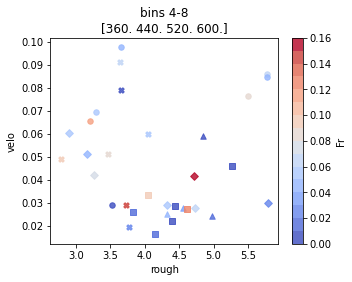

In [1596]:
I = KM3
mrkr = mrkrKM3
b1 = 4
b2 = 8


xstr = 'rough'
ystr = 'velo'
cstr = 'Fr'

#
cmap= plt.cm.get_cmap('coolwarm',16)
fig , axs =  plt.subplots(1, 1, figsize=(5,4))
ax = axs

for i in range(0,len(I)):
        c = ax.scatter(ROGH10_gebco[I[i]],np.nanmean(VELb[bb,I[i]]), c=(Fr[I[i]]), 
            cmap=cmap, s=30, alpha=.8,vmin=0,vmax=0.16, marker=mrkr[i])
fig.colorbar(c,label=cstr); ax.set_xlabel(xstr) ; ax.set_ylabel(ystr)
#ax.set_xlim(2,6)
#ax.set_ylim(0,.15)
#ax.set_yscale('log')
ax.set_title('bins '+str(b1)+'-'+str(b2)+'\n'+str(Bz[b1:b2,1]))


fig.tight_layout(pad=1)

fig_filename = 'scatter_'+ystr+'_'+xstr+'_'+cstr
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)


In [2749]:
from sklearn.ensemble import RandomForestRegressor

In [2750]:
def dataframe_remove_nan(df):
    for c in range(0,df.shape[1]):
        
        x = np.array(df.iloc[:,c])
        if isinstance(x[0],float)==True:
            f = np.where(np.isfinite(x)==True)[0]
            if len(f)>0:
            #    print(len(f))
                df = df.iloc[f,:]
                df = df.set_index(np.arange(0,df.shape[0]))          
    return df

In [1599]:
def normalize_01(x):
    x01 = (x - np.nanmin(x)) / np.abs( np.nanmax(x) - np.nanmin(x))
    return x01

In [1600]:
def get_metrucs(A,P,ROUNDORNOT,NR,PRINTORNOT):
    # A actual
    # P prediction
    f = np.where(np.isfinite(A*P)==1)[0]
    A = A[f]
    P = P[f]
    
    from scipy.stats import pearsonr
    MAE = np.nanmean(np.abs(A-P))
    MEDAE = np.nanmedian(np.abs(A-P))
    MAXE = np.nanmax(np.abs(A-P))
    MSE = np.nanmean((A-P)**2)
    RMSE = np.sqrt(np.nanmean((A-P)**2))
    MAPE = np.nanmean( np.abs(A-P)/np.abs(A))*100
    RSQU = r2_score(A, P)
    EXVA = 1 - np.var(A - P)/np.var(A )
    PEAR, PEAV = pearsonr(A, P)
    res = stats.linregress(A,P) 
    c = np.corrcoef(A,P)
    R2 = res.rvalue**2
    PV = res.pvalue
    CF = c[0,1]
    SL = res.slope
    SE = res.stderr
    
    ROUND_R2 = round(R2,NR)
    ROUND_PV = round(PV, NR)
    ROUND_CF = round(CF, NR)
    ROUND_SL = round(SL, NR)
    ROUND_SE = round(SE, NR)
    
    ROUND_MAE = round(MAE,NR)
    ROUND_MEDAE = round(MEDAE,NR)
    ROUND_MAXE = round(MAXE,NR)
    ROUND_MSE = round(MSE,NR)
    ROUND_RMSE = round(RMSE,NR)
    ROUND_MAPE = round(MAPE,NR)
    ROUND_RSQU = round(RSQU,NR)
    ROUND_EXVA = round(EXVA,NR)
    ROUND_PEAR = round(PEAR,NR)
    ROUND_PEAV = round(PEAV,NR)
    if PRINTORNOT == True:
        print('R²: ', ROUND_R2)
        print('p-value: ', ROUND_PV)
        print('corrcoef: ', ROUND_CF)
        print('slope: ', ROUND_SL)
        print('slope error: ', ROUND_SE)
        print('MAE: ', ROUND_MAE)
        print('MEDAE: ', ROUND_MEDAE)
        print('MAXE: ', ROUND_MAXE)
        print('MSE: ', ROUND_MSE)
        print('RMSE: ', ROUND_RMSE)
        print('MAPE: ', ROUND_MAPE,'%')
        print('RSQU: ', ROUND_RSQU)
        print('EXVA: ', ROUND_EXVA)
        print('PEAR: ', ROUND_PEAR)
        print('PEAR PV: ', ROUND_PEAV)

    if ROUNDORNOT == False:
        return MAE, MEDAE, MAXE,  MSE, RMSE,  MAPE,  RSQU,  EXVA,  PEAR,  PEAV,  R2,  PV,  CF,  SL,  SE, 
    if ROUNDORNOT == True:
        return ROUND_MAE, ROUND_MEDAE, ROUND_MAXE,  ROUND_MSE, ROUND_RMSE,  ROUND_MAPE,  ROUND_RSQU,  ROUND_EXVA,  ROUND_PEAR,  ROUND_PEAV,  ROUND_R2,  ROUND_PV,  ROUND_CF,  ROUND_SL,  ROUND_SE 


    

In [2731]:
for var in list(globals()):
    if var.startswith('rf_for_'):
        del globals()[var]

In [2751]:
feats = dfML.copy()
index = np.arange(0,feats.shape[0]).astype(int)
feats.insert(feats.shape[1], 'index', index, True)
print(feats.shape)
feats = dataframe_remove_nan(feats)
print(feats.shape)

feats_norm = feats.copy()
for f in range(0,len(feats.columns)):
    col = feats.columns[f]
    str_2_exec = "feats_norm['"+col+"'] = normalize_01(feats['"+col+"'])"
    exec(str_2_exec)
    #print(str_2_exec)

feats.columns

(384, 47)
(207, 47)


Index(['Ib', 'LONb', 'LATb', 'Db', 'FCb', 'shUVbb', 'Ribb', 'N1b', 'N2b',
       'shUV10bb', 'Ri10bb', 'N110b', 'N210b', 'INFSb', 'INFRb', 'DTTBb',
       'BTTDb', 'SLAMb', 'RO10b', 'RSHCb', 'RSH1b', 'RST1b', 'K1b', 'E1b',
       'K10b', 'E10b', 'R1b', 'W1b', 'B1b', 'B1bSLAMb', 'B1bINFSb', 'RSH2b',
       'RST2b', 'K2b', 'E2b', 'K20b', 'E20b', 'R2b', 'W2b', 'B2b', 'B2bSLAMb',
       'B2bINFSb', 'Bb', 'Ab', 'BbSLAMb', 'BbINFSb', 'index'],
      dtype='object')

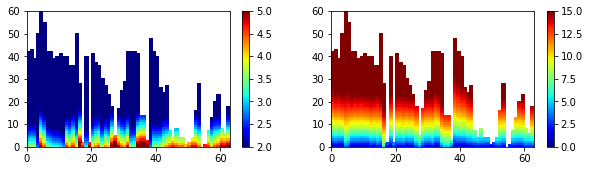

In [2752]:
fig , axs =  plt.subplots(1, 2, figsize=(10,2.5))
ax = axs[0]
#c = ax.scatter(x, y, c=(proj), cmap=mycmap2, norm=norm,s=10, alpha=0.8)
c = ax.pcolor(INFRb,cmap='jet',vmin=2,vmax=5)
fig.colorbar(c,label='')

ax = axs[1]
#c = ax.scatter(x, y, c=(proj), cmap=mycmap2, norm=norm,s=10, alpha=0.8)
c = ax.pcolor(INFSb,cmap='jet',vmin=0,vmax=15)
fig.colorbar(c,label='')


In [2996]:
RUN_LIST = []
RUN_LIST.append([['R1b'],
['DTTBb',
    'INFRb',
    'INFSb',
 #'FCb',
 #   'LONb',
 #   'LATb'
]                                           
,0,1/3,'MINIMAL','MINIMAL'] )

pd.DataFrame(RUN_LIST)

0                      1  2         3        4        5
0  [R1b]  [DTTBb, INFRb, INFSb]  0  0.333333  MINIMAL  MINIMAL

In [2998]:
RUN_LIST = []
RUN_LIST.append([['R1b'],
['DTTBb',
    'RO10b',
    'SLAMb',
 #'FCb',
 #   'LONb',
 #   'LATb'
]                                           
,0,1/3,'MINIMAL','MINIMAL'] )

pd.DataFrame(RUN_LIST)

0                      1  2         3        4        5
0  [R1b]  [DTTBb, RO10b, SLAMb]  0  0.333333  MINIMAL  MINIMAL

In [2999]:
RUN_OUT = []

In [3000]:
n_estimators = 100
#rs = np.random.randint(1, 10000, 100)
rs = np.array([142, 524, 402,  74,  30,  40,  98, 767, 262, 116,  77, 410, 671, 446, 653, 45, 439, 561, 731, 768])
#rs = np.array([444])


<ipython-input-3001-23613760127c>:67: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(feats_sub_train, label_train);
<ipython-input-3001-23613760127c>:67: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(feats_sub_train, label_train);
<ipython-input-3001-23613760127c>:67: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(feats_sub_train, label_train);
<ipython-input-3001-23613760127c>:67: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(feats_sub_train, label_train);
<ipython-input-3001-23613760127c>:67: DataConversionWarning: A colum

0 R1b MINIMAL Pearson:  0.695     ['DTTBb', 'RO10b', 'SLAMb']


<ipython-input-3001-23613760127c>:210: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


RUNS ARE FINISHED


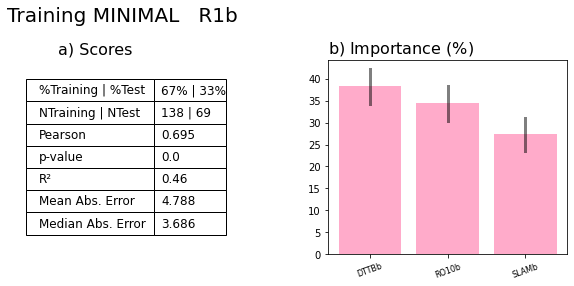

In [3001]:
for r in range(0,len(RUN_LIST)):
    note = RUN_LIST[r][-2]
    trnm = RUN_LIST[r][-1]
    learning_variable = RUN_LIST[r][0]
    training_sub_list = RUN_LIST[r][1]
    TAKENORM = RUN_LIST[r][2]
    test_size = RUN_LIST[r][3]
    label_stri = learning_variable[0]

    if label_stri == 'chl':
        clr_var = clr_chl
        label_var = '$Chl_{a}$ $(mg.m^{-3})$'
    elif label_stri == 'chl10':
        clr_var = clr_chl
        label_var = '$Chl_{a}$ $log_{10}(mg.m^{-3})$'
    elif label_stri == 'Ssurface':   
        clr_var = clr_sal
        label_var = '$S_{A}$ $(g.kg^{-1})$'
    else: clr_var = '#ff5996'; label_var = label_stri

    label_list = [label_stri]
    label = feats[label_list]
    label_norm = feats_norm[label_list]

    TN = []
    SCORE = []
    IMPOR = []
    METRIC_PEAR = []
    METRIC_PEAV= []
    METRIC_RSQU= []
    METRIC_EXVA= []
    METRIC_MAE= []
    METRIC_MEDAE= []
    METRIC_MSE= []
    METRIC_RMSE= []
    METRIC_MAPE= []
    for tn in range(0,len(rs)):
        TN.append(tn)
        random_state = rs[tn]

        #
        if TAKENORM == 1:
            feats_INPUT = feats_norm.copy()
            label_INPUT = label_norm.copy()
        elif TAKENORM == 2:
            feats_INPUT = feats_norm.copy()
            label_INPUT = label.copy()
        else: feats_INPUT = feats.copy(); label_INPUT = label.copy(); 

        # https://datascientest.com/en/train_test_split-tutorial-on-how-to-use-this-function
        feats_train, feats_valid, label_train, label_valid = train_test_split(
            feats_INPUT, label_INPUT, test_size = test_size,  random_state = random_state)
        index_train = np.array(feats_train['index'])
        index_valid = np.array(feats_valid['index'])
        index_all   = np.array(feats_INPUT['index'])
        label_all   = np.array(label_INPUT[label_stri])
        feats_sub_all = feats_INPUT[training_sub_list]
        feats_sub_train = feats_train[training_sub_list]
        feats_sub_valid = feats_valid[training_sub_list]

        Nall = feats_sub_all.shape[0]
        Ntra = feats_sub_train.shape[0]
        Nval = feats_sub_valid.shape[0]

        # RF FIT
        rf = RandomForestRegressor(n_estimators = n_estimators, random_state=random_state, oob_score=True) 
        rf.fit(feats_sub_train, label_train);
        SCORE.append(rf.score(feats_sub_valid,label_valid)*100)
        IMPOR.append(100*np.round(rf.feature_importances_, 5))

        if label_stri == 'chl' or label_stri == 'chl10':
            rf_for_C = rf; exec('rf_for_C_'+str(tn)+' = rf'); str_rf = 'rf_for_C_' 
        elif label_stri == 'Ssurface':   
            rf_for_S = rf; exec('rf_for_S_'+str(tn)+' = rf'); str_rf = 'rf_for_S_' 
        else: rf_for_X = rf ; exec('rf_for_X_'+str(tn)+' = rf') ; str_rf = 'rf_for_X_' 
        WYLOGIC = 'wy' in training_sub_list

        # RF PREDICT
        pred = rf.predict(feats_sub_valid)
        pred_all = rf.predict(feats_sub_all)    

        i_all = index_all*1
        y_all = label_all*1

        i_allpred = i_all*1
        y_allpred = pred_all*1

        isort = np.argsort(index_train)
        i_train = index_train[isort]*1
        y_train = np.array(label_train)[isort].flatten()

        isort = np.argsort(index_valid)
        i_valid = index_valid[isort]*1
        y_valid = np.array(label_valid)[isort].flatten()

        i_pred = i_valid*1
        y_pred = np.array(pred)[isort].flatten()

        A = y_valid; P = y_pred; NR = 3
        MAE, MEDAE, MAXE,  MSE, RMSE,  MAPE,  RSQU,  EXVA,  PEAR,  PEAV,  RSQ,  PV,  CF,  SL,  SE,= get_metrucs(A,P,True,NR,False)
        METRIC_PEAR.append(PEAR)
        METRIC_PEAV.append(PEAV)
        METRIC_RSQU.append(RSQU)
        METRIC_EXVA.append(EXVA)
        METRIC_MAE.append(MAE)
        METRIC_MEDAE.append(MEDAE)
        METRIC_MSE.append(MSE)
        METRIC_RMSE.append(RMSE)
        METRIC_MAPE.append(MAPE)

    METRIC_PEAR = np.array(METRIC_PEAR)
    METRIC_PEAV = np.array(METRIC_PEAV)
    METRIC_RSQU = np.array(METRIC_RSQU)
    METRIC_EXVA = np.array(METRIC_EXVA)
    METRIC_MAE = np.array(METRIC_MAE)
    METRIC_MEDAE = np.array(METRIC_MEDAE)
    METRIC_MSE = np.array(METRIC_MSE)
    METRIC_RMSE = np.array(METRIC_RMSE)
    METRIC_MAPE = np.array(METRIC_MAPE)
    m0 = np.nanmean(SCORE)
    m1 = np.nanmean(METRIC_PEAR)
    m2 = np.nanmean(METRIC_PEAV)
    m3 = np.nanmean(METRIC_RSQU)
    m4 = np.nanmean(METRIC_EXVA)
    m5 = np.nanmean(METRIC_MAE)
    m6 = np.nanmean(METRIC_MEDAE)
    m7 = np.nanmean(METRIC_MSE)
    m8 = np.nanmean(METRIC_RMSE)
    m9 = np.nanmean(METRIC_MAPE)
    IMPOR = np.array(IMPOR)
    TN = np.array(TN)

    print(r,label_stri,note,'Pearson: ',np.round(m1,3),'   ',training_sub_list)

    PROJ = np.empty((len(TN),feats_sub_all.shape[0]))*np.nan
    for tn in range(0,len(TN)):
        str_to_exec = 'toto = '+str_rf+str(tn)+'.predict(feats_sub_all)'
        exec(str_to_exec)
        PROJ[tn,:] = toto
    proj = np.nanmean(PROJ, axis=0)

    impor = []
    impor_std = []
    for fea in range(0,IMPOR.shape[1]):
        impor.append(np.nanmean(IMPOR[:,fea]))
        impor_std.append(np.nanstd(IMPOR[:,fea]))
    impor = np.array(impor)
    impor_std = np.array(impor_std)
    io = np.argsort(impor)
    impor = impor[io][::-1]
    impor_std = impor_std[io][::-1]
    names = np.array(training_sub_list)[io][::-1]

    out = [trnm,label_valid.columns[0],note,training_sub_list,
           TAKENORM,test_size,n_estimators,Nall,Ntra,Nval,
           proj,
          impor,names,
           m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,
          rs]
    col_heads = ['Training','Target','Note','Predictors','Norm PredTarg No|Yes|YesNo','%ForTest',
                'Ntrees','Nall','Ntraining','Ntest','Projection','Importances','ImporNames',
                'ScoreRF','Pearson','p-v','R2','ExplainedVar','MAE','MEDAE','MSE','RMSE','MAPE','Seeds']
    RUN_OUT.append(out)


    MAKEFIG = True
    if MAKEFIG == True:
        out_name = 'run_'+str(r)+'_'+trnm+'_'+label_valid.columns[0]+'_'+str(len(training_sub_list))+'FEATS'+'_PEAR'+str(int(1000*np.round(m1,3)))+'_MAE'+str(int(1000*np.round(m5,3)))
        fig_ttle = 'Training '+trnm+'   '+label_var
        #----------------------------------------
        fig_filename_0 =  out_name

        fig = plt.figure(figsize=(8, 4))
        gs = gridspec.GridSpec(1, 2, width_ratios=[1,1])  

        ax1 = fig.add_subplot(gs[0])
        ax1.set_axis_off()
        str_sfx  = ['%Training | %Test','NTraining | NTest','Pearson','p-value','R²','Mean Abs. Error','Median Abs. Error',]
        extrvals = [
            [str(round(100*(1-test_size)))+'%'+' | '+str(round(100*test_size))+'%'],
            [str(Ntra)+''+' | '+str(Nval)+''],
        [str(np.round(m1,3))],
        [str(np.round(m2,3))],
        [str(np.round(m3,3))],
        [str(np.round(m5,3))],
        [str(np.round(m6,3))],     
        ]
        table = ax1.table( cellText = extrvals, rowLabels = str_sfx,
                          #colLabels = [''], 
                          cellLoc ='left', fontsize=20,
                         loc="center", bbox=[0.4, 0.1, 0.3, 0.8])
        table.auto_set_font_size(False)
        table.set_fontsize(12)
        #table.scale(.5, 1)
        for i, key in enumerate(table._cells):
            cell = table._cells[key]
            cell.set_height(0.2) 
        ax1.set_title('a) Scores',fontsize=16,loc='left')

        ax2 = fig.add_subplot(gs[1])
        ax2.bar(np.arange(0,len(impor)),impor,color=clr_var,alpha=.5)
        for b in range(0,len(impor)):
            ax2.plot([b,b],[impor[b]-impor_std[b],impor[b]+impor_std[b]],color='k',lw=3,alpha=.5)
        ax2.set_xticks(np.arange(0,len(impor)))
        ax2.set_xticklabels(names,fontsize=8,rotation=20)
        ax2.set_title('b) Importance $(\%)$',loc='left',fontsize=16)

        fig.suptitle(fig_ttle,x=0.01, ha='left',fontsize=20)
        fig.tight_layout(pad=1)
        fig.show()
        #plt.close(fig)
        fig_filename = fig_filename_0 
        fig_export_dir = '/Users/floriankokoszka/Desktop/PIONEERMIX/runs/'
        fig.savefig(fig_export_dir + fig_filename + '.png',dpi=600)
        #fig.savefig(fig_export_dir+fig_filename + '.pdf')
RUN_OUT = pd.DataFrame(RUN_OUT)
RUN_OUT.columns = col_heads
print('RUNS ARE FINISHED')

In [2968]:
label_stri

'R1b'

In [3002]:
RUN_OUT
SCORES_OUT = RUN_OUT[['Training', 'Target', 'Note', 'Predictors',
       'Norm PredTarg No|Yes|YesNo', '%ForTest', 'Ntrees', 'Nall', 'Ntraining',
       'Ntest', 'Importances', 'ImporNames', 'ScoreRF', 'Pearson', 'p-v', 'R2', 'ExplainedVar', 'MAE', 'MEDAE', 'MSE', 'RMSE','MAPE']]
RUN_OUT.to_csv(fig_export_dir + 'RUN_OUT.csv', index = False)
SCORES_OUT.to_csv(fig_export_dir + 'SCORES_OUT.csv', index = False)
feats.to_csv(fig_export_dir + 'feats.csv', index = False)

In [3003]:
proj = np.array(list(RUN_OUT['Projection'])).ravel()

ML_R1b
ML_R1b_hist


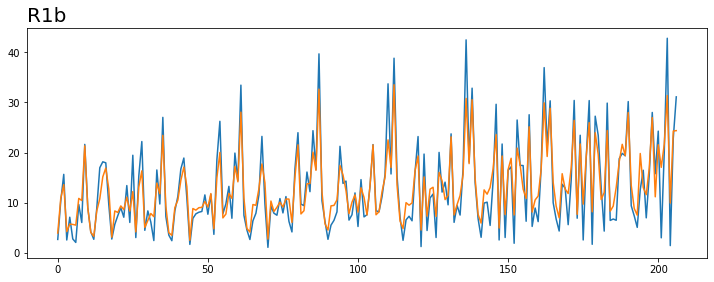

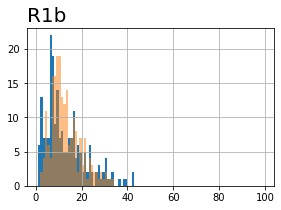

In [3004]:
fttl = 'ML_'+label_stri

fig , axs =  plt.subplots(1, 1, figsize=(10,4))
ax = axs
ax.plot(feats[label_stri])
ax.plot(proj)
#ax.set_xlim(0,400)
ax.set_title(label_stri,loc='left',fontsize=20)
fig.tight_layout(pad=1)
#ax.set_yscale('log')
fig_filename = fttl
print(fig_filename)
#fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/runs/'+fig_filename + '.png',dpi=600)

fig , axs =  plt.subplots(1, 1, figsize=(4,3))
ax = axs
ax.hist(feats[label_stri],bins=np.arange(1,100,1))
ax.hist(proj,bins=np.arange(1,100,1),alpha=.5)
#ax.set_xlim(0,400)
ax.grid()
ax.set_title(label_stri,loc='left',fontsize=20)
fig.tight_layout(pad=1)
fig_filename = fttl+'_hist'
print(fig_filename)
#fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/runs/'+fig_filename + '.png',dpi=600)


In [2323]:
## LOCAL ROUGHNESS
LOCAL_ROUGH = ZZG*np.nan
LOCAL_SLOPE = ZZG*np.nan
di = 23*1 # 10 km
#
for i in range(di,len(latG)-di):
    for j in range(di,len(lonG)-di):
        fla = i
        flo = j
 
        flonm = j-di
        flonp = j+di

        flatm = i-di
        flatp = i+di

        ZZ_zone = ZZG[np.ix_(np.arange(flatm,flatp+1),np.arange(flonm,flonp+1))]
        LOCAL_ROUGH[i,j] = np.log10(np.nanvar(ZZ_zone))
        

        loc0 = np.array([lonG[flo],latG[fla]]).flatten()
        loc1 = np.array([lonG[flo+di],latG[fla+0]]).flatten()
        loc2 = np.array([lonG[flo+di],latG[fla+di]]).flatten()
        loc3 = np.array([lonG[flo+0],latG[fla+di]]).flatten()
        loc4 = np.array([lonG[flo-di],latG[fla+di]]).flatten()
        loc5 = np.array([lonG[flo-di],latG[fla+0]]).flatten()
        loc6 = np.array([lonG[flo-di],latG[fla-di]]).flatten()
        loc7 = np.array([lonG[flo+0],latG[fla-di]]).flatten()
        loc8 = np.array([lonG[flo+di],latG[fla-di]]).flatten()

        zzG0 = ZZG[fla,flo]
        zzG1 = ZZG[fla+0,flo+di]
        zzG2 = ZZG[fla+di,flo+di]
        zzG3 = ZZG[fla+di,flo+0]
        zzG4 = ZZG[fla+di,flo-di]
        zzG5 = ZZG[fla+0,flo-di]
        zzG6 = ZZG[fla-di,flo-di]
        zzG7 = ZZG[fla-di,flo+0]
        zzG8 = ZZG[fla-di,flo+di]
        zG = [zzG1,zzG2,zzG3,zzG4,zzG5,zzG6,zzG7,zzG8]

        dh1 = hs.haversine(loc0,loc1)
        dh2 = hs.haversine(loc0,loc2)
        dh3 = hs.haversine(loc0,loc3)
        dh4 = hs.haversine(loc0,loc4)
        dh5 = hs.haversine(loc0,loc5)
        dh6 = hs.haversine(loc0,loc6)
        dh7 = hs.haversine(loc0,loc7)
        dh8 = hs.haversine(loc0,loc8)
        dh = [dh1,dh2,dh3,dh4,dh5,dh6,dh7,dh8]

        dz1 = np.abs(zzG0-zzG1)
        dz2 = np.abs(zzG0-zzG2)
        dz3 = np.abs(zzG0-zzG3)
        dz4 = np.abs(zzG0-zzG4)
        dz5 = np.abs(zzG0-zzG5)
        dz6 = np.abs(zzG0-zzG6)
        dz7 = np.abs(zzG0-zzG7)
        dz8 = np.abs(zzG0-zzG8)
        dz = [dz1,dz2,dz3,dz4,dz5,dz6,dz7,dz8]

        dzdh = [dz1/dh1,dz2/dh2,dz3/dh3,dz4/dh4,dz5/dh5,dz6/dh6,dz7/dh7,dz8/dh8]
        
        LOCAL_SLOPE[i,j] = np.nanmean(dzdh) 
LOCAL_SLAPE  = np.degrees(np.arctan(LOCAL_SLOPE  / 1e3))   
        #VAR10_Z.append(np.log10(np.nanvar(ZZ_zone)))
print(LOCAL_ROUGH.shape)

(1440, 1680)


In [2933]:
np.nanmean(R1[:,KM3])

11.114301856229408

In [3012]:
Nreduce = 10
ilonR = np.arange(0,len(lonG),Nreduce)
ilatR = np.arange(0,len(latG),Nreduce)
ZZR = ZZG[np.ix_(ilatR,ilonR)]
ROR = LOCAL_ROUGH[np.ix_(ilatR,ilonR)]
SLA = LOCAL_SLAPE[np.ix_(ilatR,ilonR)]

lonR = lonG[ilonR]
latR = latG[ilatR]
LOR, LAR = np.meshgrid(lonR + np.nanmean(np.diff(lonR))/2,latR + np.nanmean(np.diff(latR))/2)

FCO = gsw.geostrophy.f(LAR)

dttb = 480
ZZD = np.ones((ZZR.shape[0],ZZR.shape[1]))*dttb 

ZZM = ZZR.astype(float)
ZZM[ZZM +dttb >= 0 ] = np.nan

ZZ1 = ZZM.astype(float)
ZZ1[ZZ1 < 0 ] = 1


original_shape = ROR.shape
print(original_shape)

print(RUN_LIST[0][1])

(144, 168)
['DTTBb', 'RO10b', 'SLAMb']


In [ ]:
ROR = constrained_exponential_transition(ROR, dttb, 0,  640*2 )
SLA = constrained_exponential_transition(SLA, dttb, 20, 640*2 )


In [3013]:
PRED1, PRED2, PRED3, PRED4, PRED5, PRED6 = ZZD*ZZ1, ROR*ZZ1 , SLA*ZZ1, FCO*ZZ1, LOR*ZZ1, LAR*ZZ1
pred1, pred2, pred3, pred4, pred5, pred6 = PRED1.ravel(), PRED2.ravel(), PRED3.ravel(), PRED4.ravel(), PRED5.ravel(), PRED6.ravel()

df2proj = pd.DataFrame()
df2proj['DTTBb'] = pred1
df2proj['RO10b'] = pred2
df2proj['SLAMb'] = pred3
df2proj['FCb']   = pred4
df2proj['LONb'] = pred5
df2proj['LATb'] = pred6
df2proj = dataframe_remove_nan(df2proj)
print(df2proj.shape)

df2proj_norm = df2proj.copy()
for f in range(0,len(df2proj.columns)):
    col = df2proj_norm.columns[f]
    str_2_exec = "df2proj_norm['"+col+"'] = normalize_01(df2proj['"+col+"'])"
    exec(str_2_exec)
df2proj_norm = dataframe_remove_nan(df2proj_norm)
print(df2proj_norm.shape)
df2proj_norm
df2proj_norm['DTTBb'] = [1]*df2proj_norm.shape[0]

valid_mask = ~np.isnan(pred1*pred2*pred3*pred4*pred5*pred6)
valid_values = pred1[valid_mask]
OUT_RAVELED = np.full_like(pred1, np.nan, dtype=float)


PROJ = np.empty((len(TN),df2proj.shape[0]))*np.nan
for tn in range(0,len(TN)):
    str_to_exec = 'toto = rf_for_X_'+str(tn)+'.predict(df2proj[RUN_LIST[0][1]])'
    exec(str_to_exec)
    PROJ[tn,:] = toto 
proj = np.nanmean(PROJ, axis=0)
#w_proj = rw_to_omega(fcorio,proj)
print('done')

OUT_RAVELED[valid_mask] = proj

PROJ = OUT_RAVELED.reshape(original_shape)
print(PROJ.shape)

PROW = rw_to_omega(FCO,PROJ)

(14813, 6)
(14813, 6)
done
(144, 168)


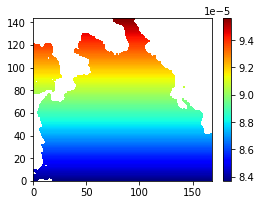

In [2984]:
fig , axs =  plt.subplots(1, 1, figsize=(4,3))
ax = axs
c = ax.pcolor(PRED4,cmap='jet')
fig.colorbar(c,label='')




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


RW_ML_480m_to_bottom


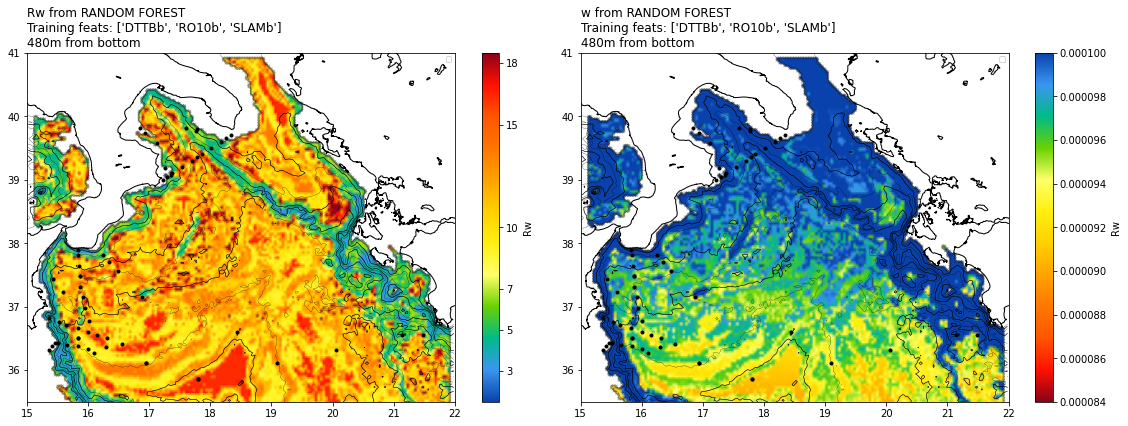

In [3014]:
norm = Normalize(vmin=1.5, vmax=18.5)

fig , axs =  plt.subplots(1, 2, figsize=(16,6))
ax = axs[0]
#c = ax.scatter(x, y, c=(proj), cmap=mycmap2, norm=norm,s=10, alpha=0.8)
c = ax.pcolormesh(LOR,LAR,PROJ*ZZ1,cmap=mycmap2,norm=norm,shading='gouraud')
cb = fig.colorbar(c,label='Proj',ticks=[1,3,5,7,10,15,18])
cb.set_label('Rw')
ax.legend(loc=1,fontsize=7)
cs = ax.contour(XXG_R,YYG_R,ZZG_R,levels= np.arange(-5000,0,500),colors='k', linewidths=0.25, linestyles='solid' )
cs = ax.contour(XXG_R,YYG_R,ZZG_R,levels= np.arange(-5000,0,1000),colors='k', linewidths=0.5, linestyles='solid' )
ax.plot(ITcoast['lonIT'],ITcoast['latIT'],'k-',lw=1)
ax.plot(lon_ctd,lat_ctd,'ko',markersize=3,lw=.5,label='CTD')
ax.set_xlim([15,22])
ax.set_ylim([35.5,41])
ax.set_title('Rw from RANDOM FOREST\nTraining feats: '+str(list(RUN_LIST[0][1]))+'\n'+str(dttb)+'m from bottom',loc='left')


norm = Normalize(vmin=8.4e-5, vmax=1e-4)
ax = axs[1]
#c = ax.scatter(x, y, c=(proj), cmap=mycmap2, norm=norm,s=10, alpha=0.8)
c = ax.pcolormesh(LOR,LAR,PROW*ZZ1,cmap=mycmap22,norm=norm,shading='gouraud')
cb = fig.colorbar(c,label='Proj')
cb.set_label('Rw')
ax.legend(loc=1,fontsize=7)
cs = ax.contour(XXG_R,YYG_R,ZZG_R,levels= np.arange(-5000,0,500),colors='k', linewidths=0.25, linestyles='solid' )
cs = ax.contour(XXG_R,YYG_R,ZZG_R,levels= np.arange(-5000,0,1000),colors='k', linewidths=0.5, linestyles='solid' )
ax.plot(ITcoast['lonIT'],ITcoast['latIT'],'k-',lw=1)
ax.plot(lon_ctd,lat_ctd,'ko',markersize=3,lw=.5,label='CTD')
ax.set_xlim([15,22])
ax.set_ylim([35.5,41])
ax.set_title('w from RANDOM FOREST\nTraining feats: '+str(list(RUN_LIST[0][1]))+'\n'+str(dttb)+'m from bottom',loc='left')

fig.tight_layout(pad=1)

fig_filename = 'RW_ML_'+str(dttb)+'m_to_bottom'
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)



In [2091]:
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm, Normalize

In [ ]:


colors = ['purple', 'blue', 'lightblue', 'green', 'yellow', 'orange', 'red']
boundaries = [1, 2, 5, 9, 18, 22, 28, 40]  # Les limites des plages de couleurs
mycmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=len(boundaries) - 1)
norm = BoundaryNorm(boundaries, mycmap.N)
norm = Normalize(vmin=1, vmax=40)
mycmap = LinearSegmentedColormap.from_list("custom_cmap", colors)


In [2811]:
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm, Normalize

colors_list = [(9, 66, 173),
    (58, 149, 240),
               #(52, 250, 174),  # GREENS
               (0, 186, 137),
               #(8, 163, 78),
               (105, 209, 0),

              (255, 255, 105),
              (255, 239, 15),  # YELLOWS
               #(122, 217, 50),
              (255, 208, 0),

              (255, 162, 0),
              (255, 119, 0), # ORANGES
              (255, 85, 0),

              (255, 17, 0),
              (138, 1, 26),  # REDS
              # (162, 62, 250),
               ]
mycmap2 = colors.LinearSegmentedColormap.from_list('my_colormap', (np.array(colors_list)/255),N=17*10*4)
mycmap22 = colors.LinearSegmentedColormap.from_list('my_colormap', (np.array(colors_list)[::-1]/255),N=17*10*4)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


K10b_ML_320m_to_bottom


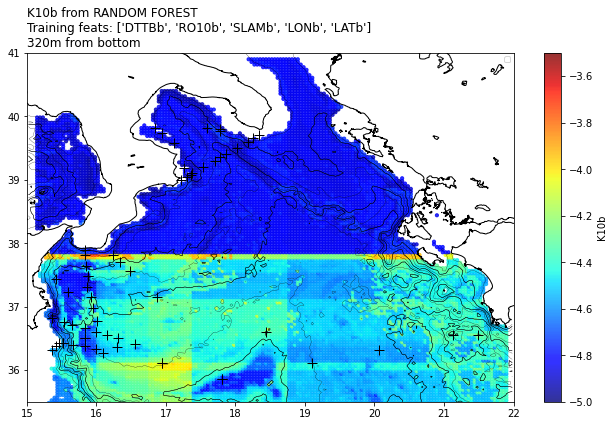

In [2092]:
x = np.array(df2proj['PRED5'])
y = np.array(df2proj['PRED6'])
norm = Normalize(vmin=-5, vmax=-3.5)

fig , axs =  plt.subplots(1, 1, figsize=(9,6))
ax = axs
c = ax.scatter(x, y, c=(proj), cmap='jet', norm=norm,
               s=10, alpha=0.8)
cb = fig.colorbar(c,label='Proj')
cb.set_label(label_stri)
ax.legend(loc=1,fontsize=7)
cs = ax.contour(XXG_R,YYG_R,ZZG_R,levels= np.arange(-5000,0,500),colors='k', linewidths=0.25, linestyles='solid' )
cs = ax.contour(XXG_R,YYG_R,ZZG_R,levels= np.arange(-5000,0,1000),colors='k', linewidths=0.5, linestyles='solid' )
ax.plot(ITcoast['lonIT'],ITcoast['latIT'],'k-',lw=1)
ax.plot(lon_ctd,lat_ctd,'k+',markersize=10,lw=.5,label='CTD')
ax.set_xlim([15,22])
ax.set_ylim([35.5,41])
ax.set_title(label_stri+' from RANDOM FOREST\nTraining feats: '+str(list(RUN_LIST[0][1]))+'\n'+str(dttb)+'m from bottom',loc='left')

fig.tight_layout(pad=1)
fig_filename = label_stri+'_ML_'+str(dttb)+'m_to_bottom'
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


RW_ML_320m_to_bottom


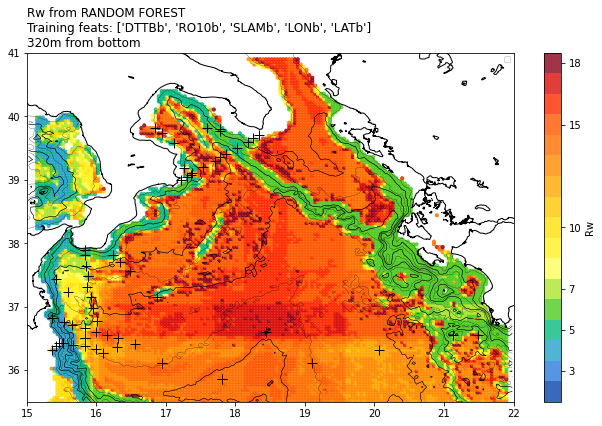

In [2104]:
x = np.array(df2proj['PRED5'])
y = np.array(df2proj['PRED6'])
norm = Normalize(vmin=1.5, vmax=18.5)

fig , axs =  plt.subplots(1, 1, figsize=(9,6))
ax = axs
c = ax.scatter(x, y, c=(proj), cmap=mycmap2, norm=norm,
               s=10, alpha=0.8)
cb = fig.colorbar(c,label='Proj',ticks=[1,3,5,7,10,15,18])
cb.set_label('Rw')
ax.legend(loc=1,fontsize=7)
cs = ax.contour(XXG_R,YYG_R,ZZG_R,levels= np.arange(-5000,0,500),colors='k', linewidths=0.25, linestyles='solid' )
cs = ax.contour(XXG_R,YYG_R,ZZG_R,levels= np.arange(-5000,0,1000),colors='k', linewidths=0.5, linestyles='solid' )
ax.plot(ITcoast['lonIT'],ITcoast['latIT'],'k-',lw=1)
ax.plot(lon_ctd,lat_ctd,'k+',markersize=10,lw=.5,label='CTD')
ax.set_xlim([15,22])
ax.set_ylim([35.5,41])
ax.set_title('Rw from RANDOM FOREST\nTraining feats: '+str(list(RUN_LIST[0][1]))+'\n'+str(dttb)+'m from bottom',loc='left')

fig.tight_layout(pad=1)
fig_filename = 'RW_ML_'+str(dttb)+'m_to_bottom'
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)


In [3008]:
H1RW = f_rw_shst(proj)
H2RW = f_rw_st(proj)

h1h2(Rw)_ML


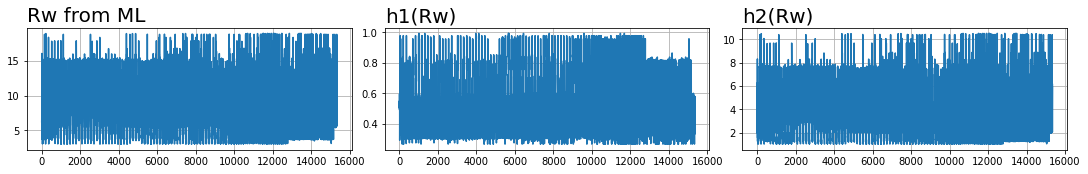

In [3009]:
fig , axs =  plt.subplots(1, 3, figsize=(15,2.5))
ax = axs[0]
ax.plot(proj)
ax.grid()
ax.set_title('Rw from ML',loc='left',fontsize=20)

ax = axs[1]
ax.plot(H1RW)
ax.grid()
ax.set_title('h1(Rw)',loc='left',fontsize=20)

ax = axs[2]
ax.plot(H2RW)
ax.grid()
ax.set_title('h2(Rw)',loc='left',fontsize=20)
fig.tight_layout(pad=1)

fig_filename = 'h1h2(Rw)_ML'
print(fig_filename)
#fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


H1RW_ML_320m_to_bottom


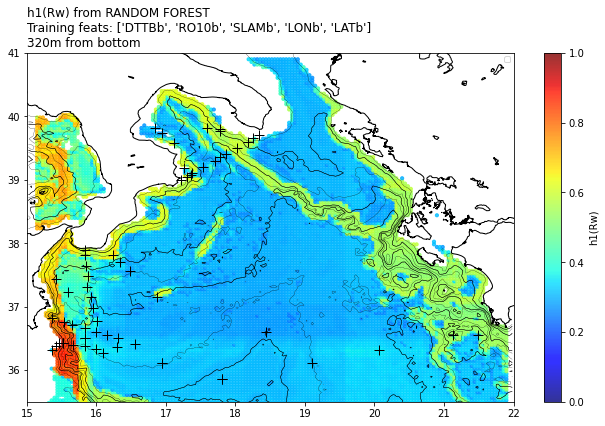

In [2107]:
x = np.array(df2proj['PRED5'])
y = np.array(df2proj['PRED6'])
norm = Normalize(vmin=0, vmax=1)

fig , axs =  plt.subplots(1, 1, figsize=(9,6))
ax = axs
c = ax.scatter(x, y, c=(F1RW), cmap='jet', norm=norm,
               s=10, alpha=0.8)
cb = fig.colorbar(c,label='Proj')
cb.set_label('h1(Rw)')
ax.legend(loc=1,fontsize=7)
cs = ax.contour(XXG_R,YYG_R,ZZG_R,levels= np.arange(-5000,0,500),colors='k', linewidths=0.25, linestyles='solid' )
cs = ax.contour(XXG_R,YYG_R,ZZG_R,levels= np.arange(-5000,0,1000),colors='k', linewidths=0.5, linestyles='solid' )
ax.plot(ITcoast['lonIT'],ITcoast['latIT'],'k-',lw=1)
ax.plot(lon_ctd,lat_ctd,'k+',markersize=10,lw=.5,label='CTD')
ax.set_xlim([15,22])
ax.set_ylim([35.5,41])
ax.set_title('h1(Rw) from RANDOM FOREST\nTraining feats: '+str(list(RUN_LIST[0][1]))+'\n'+str(dttb)+'m from bottom',loc='left')

fig.tight_layout(pad=1)
fig_filename = 'H1RW_ML_'+str(dttb)+'m_to_bottom'
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


H2RW_ML_320m_to_bottom


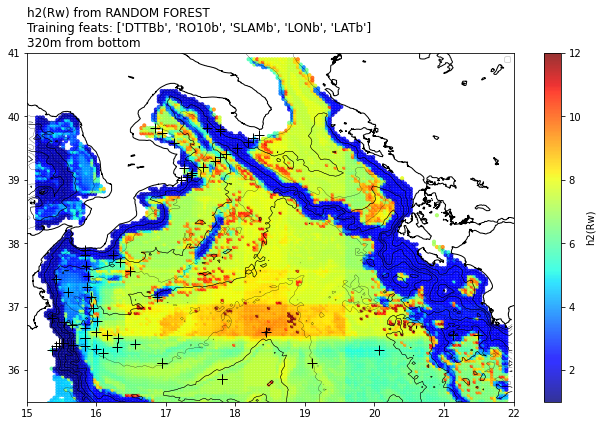

In [2108]:
x = np.array(df2proj['PRED5'])
y = np.array(df2proj['PRED6'])
norm = Normalize(vmin=1, vmax=12)

fig , axs =  plt.subplots(1, 1, figsize=(9,6))
ax = axs
c = ax.scatter(x, y, c=(F2RW), cmap='jet', norm=norm,
               s=10, alpha=0.8)
cb = fig.colorbar(c,label='Proj')
cb.set_label('h2(Rw)')
ax.legend(loc=1,fontsize=7)
cs = ax.contour(XXG_R,YYG_R,ZZG_R,levels= np.arange(-5000,0,500),colors='k', linewidths=0.25, linestyles='solid' )
cs = ax.contour(XXG_R,YYG_R,ZZG_R,levels= np.arange(-5000,0,1000),colors='k', linewidths=0.5, linestyles='solid' )
ax.plot(ITcoast['lonIT'],ITcoast['latIT'],'k-',lw=1)
ax.plot(lon_ctd,lat_ctd,'k+',markersize=10,lw=.5,label='CTD')
ax.set_xlim([15,22])
ax.set_ylim([35.5,41])
ax.set_title('h2(Rw) from RANDOM FOREST\nTraining feats: '+str(list(RUN_LIST[0][1]))+'\n'+str(dttb)+'m from bottom',loc='left')

fig.tight_layout(pad=1)
fig_filename = 'H2RW_ML_'+str(dttb)+'m_to_bottom'
print(fig_filename)
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.pdf')
fig.savefig('/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'+fig_filename + '.png',dpi=600)


In [1513]:
export_path = '/Users/floriankokoszka/Desktop/PIONEERMIX/plots/'

def plot_transect_plus(fig_filename,ttl,ZZ,I,vmin,vmax,dv,cmapstr,Ncmap,bath,sta,fs1,fs2,export_path,CC,dcc,saveornot,showctrs,clrctrs,ylims):
    
    if isinstance(cmapstr,str)==True:
        cmap=plt.cm.get_cmap(cmapstr, Ncmap)
    else: cmap = cmapstr
    
    fig , axs =  plt.subplots(1, 1, figsize=(fs1,fs2))
    ax = axs
    #
    ZZ = ZZ[:,I]
    #
    XX, YY = np.meshgrid(np.arange(0,len(sta[I]),1),
                         np.arange(0,ZZ.shape[0],1))

    c = ax.pcolor(XX,YY,ZZ, cmap=cmap, vmin=vmin, vmax=vmax, shading='auto',label='')
    ax.invert_yaxis()
    fig.colorbar(c, ax=ax, ticks = np.arange(vmin,vmax+1,dv))
    ax.fill_between(np.arange(0,len(sta[I]),1),5000,-bath[I],color='k',alpha=.15)
    ax.set_xticks(np.arange(0,len(sta[I]),1))
    ax.set_xticklabels(np.arange(0,len(sta[I])),fontsize=9,rotation=0)
    
    CC = CC[:,I]
    cc1 = np.nanmin(CC)
    cc2 = np.nanmax(CC)
    
    levels = np.arange(cc1,cc2,dcc)
    cs = ax.contour(XX,YY,CC,levels= levels,colors=clrctrs, linewidths=0.5, linestyles='solid' )
    #print(cs)
    if showctrs == True:
        ax.clabel(cs, inline=1, fontsize=8) 
    
    xlabs = sta[I]
    for i in range(0,len(xlabs)):
        if xlabs[i][0:2] == 'PI':
            xlabs[i] = 'PI'+xlabs[i].split('_')[-1]
            
    ax.set_xticklabels(xlabs,fontsize=9,rotation=45)
    ax.set_ylabel('Depth $(m)$')
    ax.grid(alpha=.25)
    ax.set_title(ttl,fontsize=14)
    if len(ylims)>0:
        ax.set_ylim(ylims[1],ylims[0])
    else:    ax.set_ylim(np.nanmax(-bath[I])+200,0)
    ax.grid()
    
    
    fig.tight_layout(pad=1)
    
    if saveornot == True:
        fig.savefig(export_path+fig_filename + '.pdf')
        fig.savefig(export_path+fig_filename + '.png',dpi=600)

    return fig


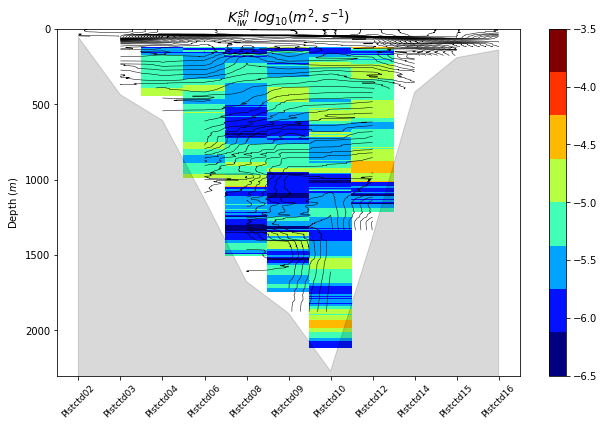

In [1519]:

fs1 = 9; fs2 = 6
ZZ = np.log10(K2); ttle = '$K_{iw}^{sh}$ $log_{10}(m^2.s^{-1})$'; figname='Kshst'
dv = .5; vmin = -6.5; vmax = -3.5; 
scmap = 'jet' ; Ncmap = 8
CC = SA
fig8 = plot_transect_plus(figname+'_plus_sec8',ttle,ZZ,I8,vmin,vmax,dv,
                          scmap,Ncmap,BTTD_gebco,sta,fs1,fs2,export_path,CC,0.01,True,False,'k', [0,2300])